# Exploratory Data Analyses

## Sandy Chen, Thodsawit Tiyarattanachai

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [53]:
train_path = '../Data/widsdatathon2024-university/train.csv'
test_path = '../Data/widsdatathon2024-university/test.csv'

output_path = '../Data/train_test_tt.csv'

In [54]:
train_df = pd.read_csv(train_path)
train_df['allocated_set'] = 'train'
test_df = pd.read_csv(test_path)
test_df['allocated_set'] = 'test'

df = pd.concat([train_df,test_df],
              axis=0).reset_index(drop=True)

In [55]:
df.describe()

patient_id  patient_zip3   patient_age           bmi  \
count   39519.000000  39519.000000  39519.000000  12482.000000   
mean   550399.374174    520.365116     54.424049     29.229523   
std    260773.401143    292.656985     11.217219      5.662184   
min    100051.000000      6.000000     18.000000     14.000000   
25%    323049.000000    292.000000     47.000000     24.960000   
50%    552167.000000    488.000000     55.000000     28.660000   
75%    776035.000000    782.000000     62.000000     33.000000   
max    999996.000000    999.000000     91.000000     97.000000   

       breast_cancer_diagnosis_year    population       density    age_median  \
count                  39519.000000  39519.000000  39519.000000  39519.000000   
mean                    2016.486424  19887.925833   1656.668336     40.689346   
std                        1.057922  13489.353665   3642.158636      4.012954   
min                     2015.000000     11.000000      0.821739     20.600000   
25%                     2016.000000   8917.000000    167.167647     37.734426   
50%                     2016.000000  18259.000000    627.904167     40.768605   
75%                     2017.000000  27537.000000   1555.107692     43.212963   
max                     2018.000000  71374.000000  29851.685710     73.500000   

       age_under_10  age_10_to_19       age_20s       age_30s       age_40s  \
count  39519.000000  39519.000000  39519.000000  39519.000000  39519.000000   
mean      11.118332     12.886369     13.129270     12.772612     12.077819   
std        1.532715      1.881145      3.219966      2.375304      1.241800   
min        0.000000      0.000000      0.000000      0.000000      0.800000   
25%       10.149254     11.792453     10.996226     11.180649     11.354237   
50%       11.022034     12.923944     12.390123     12.358824     12.137143   
75%       12.194737     13.930435     14.427273     13.813115     12.860000   
max       17.675000     35.300000     62.100000     25.471429     17.820000   

            age_50s       age_60s       age_70s   age_over_80          male  \
count  39519.000000  39519.000000  39519.000000  39519.000000  39519.000000   
mean      13.577046     12.707662      7.709737      4.020581     50.035544   
std        1.670701      2.554132      2.144807      1.244422      1.657125   
min        0.000000      0.200000      0.000000      0.000000     39.725000   
25%       12.386047     10.687500      6.088889      3.289130     49.066667   
50%       13.650000     12.620513      7.388000      3.824615     49.927907   
75%       14.747727     14.100000      8.910769      4.580972     50.906818   
max       22.906250     29.854545     31.400000     35.800000     95.500000   

             female       married      divorced  never_married       widowed  \
count  39519.000000  39519.000000  39519.000000   39519.000000  39519.000000   
mean      49.964529     48.030179     12.634745      33.439357      5.894997   
std        1.657087      7.417559      2.094547       7.845527      1.545882   
min        4.500000      0.900000      0.200000      13.440000      0.000000   
25%       49.093182     43.271111     11.066129      27.406818      4.767568   
50%       50.072093     49.925000     12.653125      31.879592      5.600000   
75%       50.933333     53.313043     14.188000      38.354545      6.689130   
max       60.275000     66.903333     31.300000      98.900000     23.054545   

        family_size  family_dual_income  income_household_median  \
count  39514.000000        39514.000000             39514.000000   
mean       3.193371           51.857785             75165.665815   
std        0.218398            7.088185             22154.566696   
min        2.550370           19.312121             18465.409090   
25%        3.036364           47.718519             60923.483330   
50%        3.160000           52.656140             70760.740740   
75%        3.311290           57.023529             86319.882350

In [56]:
# Rename feature columns for better readability
train_df.rename(columns={'bmi': 'patient_bmi',
                   'region': 'patient_region',
                   'division': 'patient_division',
                   'side': 'patient_tumor_side',
                   'quadrant': 'patient_tumor_quadrant',
                   'metastatic_organ': 'patient_metastatic_organ',
                   'cleaned_metastatic_first_treatment': 'patient_metastatic_first_treatment',
                   'cleaned_metastatic_first_treatment_type': 'patient_metastatic_first_treatment_type',
                   'population': 'population_size',
                   'density': 'population_density',
                   'age_median': 'population_age_median',
                   'female': 'population_female_perc',
                   'married': 'population_married_perc',
                   'divorced': 'population_divorced_perc',
                   'never_married': 'population_never_married_perc',
                   'widowed': 'population_widowed_perc',
                   'family_size': 'population_family_size',
                   'family_dual_income': 'population_family_dual_income_perc',
                   'income_individual_median': 'population_income_individual_median',
                   'income_household_median': 'population_income_household_median',
                   'home_ownership': 'population_home_ownership_perc',
                   'home_value': 'population_home_value',
                   'rent_median': 'population_rent_median',
                   'rent_burden': 'population_rent_burden_perc',
                   'education_less_highschool': 'population_education_less_highschool_perc',
                   'education_highschool': 'population_education_highschool_perc',
                   'education_some_college': 'population_education_some_college_perc',
                   'education_bachelors': 'population_education_bachelors_perc',
                   'education_graduate': 'population_education_graduate_perc',
                   'education_college_or_above': 'population_education_college_or_above_perc',
                   'education_stem_degree': 'population_education_stem_degree_perc',
                   'unemployment_rate': 'population_unemployment_rate',
                   'self_employed': 'population_self_employed_perc',
                   'farmer': 'population_farmer_perc',
                   'race_white': 'population_race_white_perc',
                   'race_black': 'population_race_black_perc',
                   'race_asian': 'population_race_asian_perc',
                   'race_native': 'population_race_native_american_perc',
                   'race_pacific': 'population_race_pacific_islander_perc',
                   'race_other': 'population_race_other_perc',
                   'race_multiple': 'population_race_multiple_perc',
                   'hispanic': 'population_hispanic_perc',
                   'disabled': 'population_disabled_perc',
                   'poverty': 'population_poverty_perc',
                   'limited_english': 'population_limited_english_perc',
                   'commute_time': 'population_commute_time',
                   'health_uninsured': 'population_health_uninsured_perc',
                   'veteran': 'population_veteran_perc'
                   }, inplace=True)

In [57]:
patient_zip_count = train_df['patient_zip3'].value_counts().sort_values(ascending=False).to_frame().reset_index()
patient_zip_count

patient_zip3  count
0             606    385
1             112    335
2             300    313
3             917    276
4             604    269
..            ...    ...
844           580      1
845           825      1
846           831      1
847           845      1
848           653      1

[849 rows x 2 columns]

# Given that we know the zipcode of close three digits are geographiically closer, we can identify multiple peaks

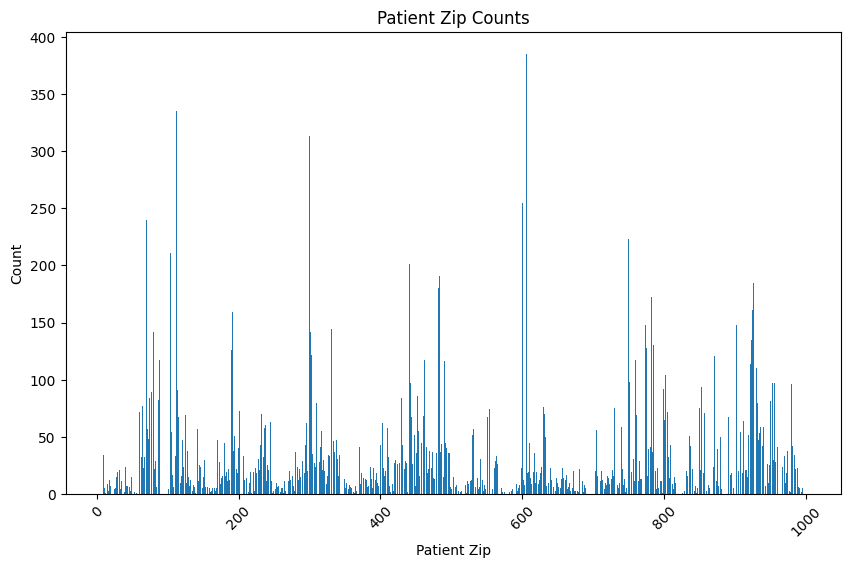

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(patient_zip_count['patient_zip3'], patient_zip_count['count'])
plt.xlabel('Patient Zip')
plt.ylabel('Count')
plt.title('Patient Zip Counts')
plt.xticks(rotation=45)
plt.show()

# split breast cancer diagnosis into sides and quadrants

In [59]:
map_cancer_desc = {
    'Malignant neoplasm of ovrlp sites of right female breast': {'side':'R', 'quadrant':'overlap'},
    'Malig neoplasm of upper-outer quadrant of left female breast': {'side':'L', 'quadrant':'UO'},
    'Malig neoplasm of upper-inner quadrant of left female breast': {'side':'L', 'quadrant':'UI'},
    'Malignant neoplasm of breast (female), unspecified': {'side':'unspecified', 'quadrant':'unspecified'},
    'Malig neoplm of lower-inner quadrant of right female breast': {'side':'R', 'quadrant':'LI'},
    'Malignant neoplasm of upper-inner quadrant of female breast': {'side':'unspecified', 'quadrant':'UI'},
    'Malignant neoplasm of central portion of left female breast': {'side':'L', 'quadrant':'central'},
    'Malignant neoplasm of unspecified site of left female breast': {'side':'L', 'quadrant':'unspecified'},
    'Malig neoplm of upper-inner quadrant of right female breast': {'side':'R', 'quadrant':'UI'},
    'Malignant neoplasm of unsp site of unspecified female breast': {'side':'unspecified', 'quadrant':'unspecified'},
    'Malignant neoplasm of unsp site of right female breast': {'side':'R', 'quadrant':'unspecified'},
    'Malig neoplm of upper-outer quadrant of right female breast': {'side':'R', 'quadrant':'UO'},
    'Malig neoplasm of lower-inner quadrant of left female breast': {'side':'L', 'quadrant':'LI'},
    'Malignant neoplasm of nipple and areola, left female breast': {'side':'L', 'quadrant':'nipple'},
    'Malignant neoplasm of lower-outer quadrant of female breast': {'side':'unspecified', 'quadrant':'LO'},
    'Malignant neoplasm of other specified sites of female breast': {'side':'unspecified', 'quadrant':'unspecified'},
    'Malig neoplm of lower-outer quadrant of right female breast': {'side':'R', 'quadrant':'LO'},
    'Malignant neoplasm of central portion of breast, female': {'side':'unspecified', 'quadrant':'central'},
    'Malignant neoplasm of lower-inner quadrant of female breast': {'side':'unspecified', 'quadrant':'LI'},
    'Malignant neoplasm of ovrlp sites of left female breast': {'side':'L', 'quadrant':'overlap'},
    'Malignant neoplasm of central portion of right female breast': {'side':'R', 'quadrant':'central'},
    'Malignant neoplasm of nipple and areola, right female breast': {'side':'R', 'quadrant':'nipple'},
    'Malignant neoplasm of axillary tail of left female breast': {'side':'L', 'quadrant':'axillary tail'},
    'Malignant neoplasm of upper-outer quadrant of female breast': {'side':'unspecified', 'quadrant':'UO'},
    'Malig neoplasm of upper-outer quadrant of unsp female breast': {'side':'unspecified', 'quadrant':'UO'},
    'Malig neoplasm of lower-outer quadrant of left female breast': {'side':'L', 'quadrant':'LO'},
    'Malignant neoplasm of central portion of unsp female breast': {'side':'unspecified', 'quadrant':'central'},
    'Malig neoplasm of lower-outer quadrant of unsp female breast': {'side':'unspecified', 'quadrant':'LO'},
    'Malignant neoplasm of axillary tail of right female breast': {'side':'R', 'quadrant':'axillary tail'},
    'Malignant neoplasm of ovrlp sites of unsp female breast': {'side':'unspecified', 'quadrant':'overlap'},
    'Malignant neoplasm of upper-outer quadrant of breast, female': {'side':'unspecified', 'quadrant':'UO'},
    'Malignant neoplasm of overlapping sites of breast, female': {'side':'unspecified', 'quadrant':'overlap'},
    'Malignant neoplasm of central portion of female breast': {'side':'unspecified', 'quadrant':'central'},
    'Malignant neoplasm of axillary tail of breast, female': {'side':'unspecified', 'quadrant':'axillary tail'},
    'Malignant neoplasm of breast of unspecified site, female': {'side':'unspecified', 'quadrant':'unspecified'},
    'Malig neoplasm of upper-inner quadrant of unsp female breast': {'side':'unspecified', 'quadrant':'UI'},
    'Secondary malignant neoplasm of breast': {'side':'unspecified', 'quadrant':'unspecified'},
    'Malignant neoplasm of lower-outer quadrant of breast, female': {'side':'unspecified', 'quadrant':'LO'},
    'Malignant neoplasm of axillary tail of unsp female breast': {'side':'unspecified', 'quadrant':'axillary tail'},
    'Malignant neoplasm of nipple and areola, unsp female breast': {'side':'unspecified', 'quadrant':'nipple'},
    'Malig neoplasm of lower-inner quadrant of unsp female breast': {'side':'unspecified', 'quadrant':'LI'},
    'Malignant neoplasm of axillary tail of female breast': {'side':'unspecified', 'quadrant':'axillary tail'},
    'Malignant neoplasm of unsp site of unspecified male breast': {'side':'unspecified', 'quadrant':'unspecified'},
    'Malig neoplasm of lower-outer quadrant of right male breast': {'side':'R', 'quadrant':'LO'},
    'Malig neoplasm of upper-inner quadrant of left male breast': {'side':'L', 'quadrant':'UI'},
    'Malignant neoplasm of upper-inner quadrant of breast, female': {'side':'unspecified', 'quadrant':'UI'},
    'Malignant neoplasm of nipple and areola of female breast': {'side':'unspecified', 'quadrant':'nipple'},
    'Malignant neoplasm of nipple and areola, female': {'side':'unspecified', 'quadrant':'nipple'},
    'Malignant neoplasm of nipple and areola, right male breast': {'side':'R', 'quadrant':'nipple'},
    'Malignant neoplasm of central portion of right male breast': {'side':'R', 'quadrant':'central'},
    'Malignant neoplasm of lower-inner quadrant of breast, female': {'side':'unspecified', 'quadrant':'LI'},
    'Malig neoplasm of lower-outer quadrant of left male breast': {'side':'L', 'quadrant':'LO'},
    'Malig neoplasm of upper-outer quadrant of right male breast': {'side':'R', 'quadrant':'UO'},
    'Malig neoplasm of upper-inner quadrant of right male breast': {'side':'R', 'quadrant':'UI'},
    'Malignant neoplasm of other and unspecified sites of male breast': {'side':'unspecified', 'quadrant':'unspecified'},
    'Malignant neoplasm of unspecified site of right male breast': {'side':'R', 'quadrant':'unspecified'},
    'Malig neoplasm of lower-inner quadrant of left male breast': {'side':'L', 'quadrant':'LI'},
    'Malig neoplasm of upper-outer quadrant of left male breast': {'side':'L', 'quadrant':'UO'},
    'Malignant neoplasm of breast': {'side':'unspecified', 'quadrant':'unspecified'},
    'Malignant neoplasm of nipple and areola, left male breast': {'side':'L', 'quadrant':'nipple'},
    'Malignant neoplasm of axillary tail of right male breast': {'side':'R', 'quadrant':'axillary tail'},
}

In [60]:
df['side'] = df['breast_cancer_diagnosis_desc'].apply(lambda x: map_cancer_desc[x]['side'])
df['quadrant'] = df['breast_cancer_diagnosis_desc'].apply(lambda x: map_cancer_desc[x]['quadrant'])

In [61]:
df['side'].value_counts(dropna=False)

side
L              15031
R              14783
unspecified     9705
Name: count, dtype: int64

In [62]:
df['quadrant'].value_counts(dropna=False)

quadrant
unspecified      19146
UO                8419
overlap           3787
UI                2499
central           1741
LO                1700
LI                1125
nipple             781
axillary tail      321
Name: count, dtype: int64

# group metastasis codes into organs

In [63]:
ICD10_code_description_dict = {
    'C770':"Secondary and unspecified malignant neoplasm of lymph nodes of head, face and neck", 
 'C771': "Secondary and unspecified malignant neoplasm of intrathoracic lymph nodes",
 'C772': "Secondary and unspecified malignant neoplasm of intra-abdominal lymph nodes", 
 'C773': "Secondary and unspecified malignant neoplasm of axilla and upper limb lymph nodes",
 'C774': "Secondary and unspecified malignant neoplasm of inguinal and lower limb lymph nodes",
 'C775': "Secondary and unspecified malignant neoplasm of intrapelvic lymph nodes",
 'C778': "Secondary and unspecified malignant neoplasm of lymph nodes of multiple regions",
 'C779': "Secondary and unspecified malignant neoplasm of lymph node, unspecified",
 'C7800': "Secondary malignant neoplasm of unspecified lung",
 'C7801': "Secondary malignant neoplasm of right lung",
 'C7802': "Secondary malignant neoplasm of left lung",
 'C781': "Secondary malignant neoplasm of mediastinum",
 'C782': "Secondary malignant neoplasm of pleura",
 'C7830': "Secondary malignant neoplasm of unspecified respiratory organ",
 'C7839': "Secondary malignant neoplasm of other respiratory organs",
 'C784': "Secondary malignant neoplasm of small intestine" ,
 'C785':"Secondary malignant neoplasm of large intestine and rectum",
'C786':"Secondary malignant neoplasm of retroperitoneum and peritoneum",
'C787': "Secondary malignant neoplasm of liver and intrahepatic bile duct",
 'C7880': "Secondary malignant neoplasm of unspecified digestive organ",
'C7889': "Secondary malignant neoplasm of other digestive organs",
 'C7900': "Secondary malignant neoplasm of unspecified kidney and renal pelvis", 
 'C7901': "Secondary malignant neoplasm of right kidney and renal pelvis", 
 'C7902': "Secondary malignant neoplasm of left kidney and renal pelvis",
'C7910': "Secondary malignant neoplasm of unspecified urinary organs",
'C792': "Secondary malignant neoplasm of skin",
 'C7931': "Secondary malignant neoplasm of brain", 
 'C7932': "Secondary malignant neoplasm of cerebral meninges",
 'C7940': "Secondary malignant neoplasm of unspecified part of nervous system", 
 'C7949': "Secondary malignant neoplasm of other parts of nervous system",
'C7951': "Secondary malignant neoplasm of bone",
'C7952': "Secondary malignant neoplasm of bone marrow" ,
 'C7960': "Secondary malignant neoplasm of unspecified ovary",
'C7961': "Secondary malignant neoplasm of right ovary",
'C7962': "Secondary malignant neoplasm of left ovary",
 'C7970':"Secondary malignant neoplasm of unspecified adrenal gland",
 'C7971': "Secondary malignant neoplasm of right adrenal gland",
'C7972': "Secondary malignant neoplasm of left adrenal gland",
'C7981':"Secondary malignant neoplasm of breast",
'C7982': "Secondary malignant neoplasm of genital organs",
'C7989': "Secondary malignant neoplasm of other specified sites",
 'C799': "Secondary malignant neoplasm of unspecified site"}

In [64]:
map_metas_code_to_organ = {
    'C770':"lymph nodes of head, face and neck", 
 'C771': "intrathoracic lymph nodes",
 'C772': "intra-abdominal lymph nodes", 
 'C773': "axilla and upper limb lymph nodes",
 'C774': "inguinal and lower limb lymph nodes",
 'C775': "intrapelvic lymph nodes",
 'C778': "lymph nodes of multiple regions",
 'C779': "lymph node, unspecified",
 'C7800': "lung",
 'C7801': "lung",
 'C7802': "lung",
 'C781': "mediastinum",
 'C782': "lung",
 'C7830': "lung",
 'C7839': "lung",
 'C784': "intestine" ,
 'C785':"intestine",
'C786':"retroperitoneum and peritoneum",
'C787': "liver",
 'C7880': "unspecified digestive organ",
'C7889': "unspecified digestive organ",
 'C7900': "kidney and other urinary organs", 
 'C7901': "kidney and other urinary organs", 
 'C7902': "kidney and other urinary organs",
'C7910': "kidney and other urinary organs",
    'C7911': 'kidney and other urinary organs',
'C792': "skin",
 'C7931': "brain", 
 'C7932': "brain",
 'C7940': "brain", 
 'C7949': "brain",
'C7951': "bone",
'C7952': "bone" ,
 'C7960': "ovary",
'C7961': "ovary",
'C7962': "ovary",
 'C7970':"adrenal gland",
 'C7971': "adrenal gland",
'C7972': "adrenal gland",
'C7981':"unspecified",
'C7982': "ovary",
'C7989': "unspecified",
 'C799': "unspecified"}

In [65]:
df['metastatic_organ'] = df['metastatic_cancer_diagnosis_code'].apply(lambda x: map_metas_code_to_organ[x])

In [66]:
df['metastatic_organ'].value_counts(dropna=False)

metastatic_organ
axilla and upper limb lymph nodes      26298
bone                                    3967
unspecified                             2411
lymph node, unspecified                 1736
lung                                    1467
liver                                   1382
brain                                    458
intrathoracic lymph nodes                455
lymph nodes of head, face and neck       409
skin                                     317
lymph nodes of multiple regions          249
intra-abdominal lymph nodes               99
retroperitoneum and peritoneum            84
mediastinum                               62
unspecified digestive organ               26
adrenal gland                             25
ovary                                     23
intestine                                 23
kidney and other urinary organs           12
inguinal and lower limb lymph nodes       10
intrapelvic lymph nodes                    6
Name: count, dtype: int64

In [67]:
map_treatment_to_generic = {
     'ATEZOLIZUMAB':'ATEZOLIZUMAB',
     'BEVACIZUMAB':'BEVACIZUMAB',
     'BLEOMYCIN SULFATE':'BLEOMYCIN',
     'CAPECITABINE':'CAPECITABINE',
     'CARBOPLATIN':'CARBOPLATIN',
     'CISPLATIN':'CISPLATIN',
     'CYCLOPHOSPHAMIDE':'CYCLOPHOSPHAMIDE',
     'DOCETAXEL':'DOCETAXEL',
     'DOCETAXEL ANHYDROUS':'DOCETAXEL',
     'DOXORUBICIN HCL':'DOXORUBICIN',
     'DOXORUBICIN HCL LIPOSOMAL':'DOXORUBICIN',
     'DOXORUBICIN HYDROCHLORIDE':'DOXORUBICIN',
     'DRUG ASSAY EVEROLIMUS':'EVEROLIMUS',
     'EPIRUBICIN HCL':'EPIRUBICIN',
     'EPIRUBICIN HYDROCHLORIDE':'EPIRUBICIN',
     'ERIBULIN MESYLATE':'ERIBULIN',
     'ERLOTINIB HYDROCHLORIDE':'ERLOTINIB',
     'ETOPOSIDE':'ETOPOSIDE',
     'EVEROLIMUS':'EVEROLIMUS',
     'GEMCITABINE HCL':'GEMCITABINE',
     'GEMCITABINE HYDROCHLORIDE':'GEMCITABINE',
     'IPILIMUMAB':'IPILIMUMAB',
     'IRINOTECAN HCL':'IRINOTECAN',
     'IXABEPILONE':'IXABEPILONE',
     'Inj gemcitabine hcl (accord)':'GEMCITABINE',
     'METHOTREXATE':'METHOTREXATE',
     'METHOTREXATE SODIUM':'METHOTREXATE',
     'NIRAPARIB':'NIRAPARIB',
     'NIVOLUMAB':'NIVOLUMAB',
     'PACLITAXEL':'PACLITAXEL',
     'PACLITAXEL PROTEIN BOUND PARTICLES':'PACLITAXEL',
     'PAZOPANIB HYDROCHLORIDE':'PAZOPANIB',
     'PEMETREXED DISODIUM':'PEMETREXED',
     'PEMETREXED DISODIUM HEPTAHYDRATE':'PEMETREXED',
     'RUCAPARIB CAMSYLATE':'RUCAPARIB',
     'TALAZOPARIB TOSYLATE':'TALAZOPARIB',
     'TEMOZOLOMIDE':'TEMOZOLOMIDE',
     'THALIDOMIDE':'THALIDOMIDE',
     'TOPOTECAN HCL':'TOPOTECAN',
     'VINORELBINE TARTRATE':'VINORELBINE'
}

In [68]:
df['cleaned_metastatic_first_treatment'] = df['metastatic_first_treatment'].apply(lambda x:map_treatment_to_generic[x])

In [69]:
df['cleaned_metastatic_first_treatment'].value_counts(dropna=False)

cleaned_metastatic_first_treatment
DOXORUBICIN         14703
CARBOPLATIN          6490
CYCLOPHOSPHAMIDE     5952
PACLITAXEL           4982
CAPECITABINE         2368
DOCETAXEL            1849
EVEROLIMUS            769
ERIBULIN              555
GEMCITABINE           544
METHOTREXATE          348
BEVACIZUMAB           316
VINORELBINE           310
CISPLATIN             150
IXABEPILONE            70
NIVOLUMAB              24
IRINOTECAN             19
TEMOZOLOMIDE           15
IPILIMUMAB              9
PEMETREXED              9
ERLOTINIB               8
EPIRUBICIN              5
ATEZOLIZUMAB            5
ETOPOSIDE               4
TOPOTECAN               4
PAZOPANIB               3
BLEOMYCIN               3
TALAZOPARIB             2
THALIDOMIDE             1
RUCAPARIB               1
NIRAPARIB               1
Name: count, dtype: int64

In [70]:
map_generic_to_type = {
 'ATEZOLIZUMAB':'monoclonal antibody',
 'BEVACIZUMAB':'monoclonal antibody',
 'BLEOMYCIN':'chemotherapy',
 'CAPECITABINE':'chemotherapy',
 'CARBOPLATIN':'chemotherapy',
 'CISPLATIN':'chemotherapy',
 'CYCLOPHOSPHAMIDE':'chemotherapy',
 'DOCETAXEL':'chemotherapy',
 'DOXORUBICIN':'chemotherapy',
 'EPIRUBICIN':'chemotherapy',
 'ERIBULIN':'chemotherapy',
 'ERLOTINIB':'small molecule inhibitor',
 'ETOPOSIDE':'chemotherapy',
 'EVEROLIMUS':'small molecule inhibitor',
 'GEMCITABINE':'chemotherapy',
 'IPILIMUMAB':'monoclonal antibody',
 'IRINOTECAN':'chemotherapy',
 'IXABEPILONE':'chemotherapy',
 'METHOTREXATE':'chemotherapy',
 'NIRAPARIB':'small molecule inhibitor',
 'NIVOLUMAB':'monoclonal antibody',
 'PACLITAXEL':'chemotherapy',
 'PAZOPANIB':'small molecule inhibitor',
 'PEMETREXED':'chemotherapy',
 'RUCAPARIB':'small molecule inhibitor',
 'TALAZOPARIB':'small molecule inhibitor',
 'TEMOZOLOMIDE':'chemotherapy',
 'THALIDOMIDE':'chemotherapy',
 'TOPOTECAN':'chemotherapy',
 'VINORELBINE':'chemotherapy'
}

In [71]:
df['cleaned_metastatic_first_treatment_type'] = df['cleaned_metastatic_first_treatment'].apply(lambda x:map_generic_to_type[x])


In [72]:
df['cleaned_metastatic_first_treatment_type'].value_counts(dropna=False)

cleaned_metastatic_first_treatment_type
chemotherapy                38381
small molecule inhibitor      784
monoclonal antibody           354
Name: count, dtype: int64

In [73]:
df['metastatic_first_novel_treatment'].value_counts(dropna=False)

metastatic_first_novel_treatment
NaN              39190
PEMBROLIZUMAB      174
OLAPARIB           155
Name: count, dtype: int64

In [74]:
new_df = pd.read_csv(output_path)

In [75]:
new_df = new_df[new_df['allocated_set'] == 'train']
new_df

patient_id patient_race          payer_type patient_state  \
0          994155        Asian          COMMERCIAL            CA   
1          154389          NaN  MEDICARE ADVANTAGE            OH   
2          387343          NaN          COMMERCIAL            TX   
3          921275     Hispanic            MEDICAID            CA   
4          803454          NaN          COMMERCIAL            NY   
...           ...          ...                 ...           ...   
27669      728161          NaN          COMMERCIAL            MO   
27670      203896          NaN          COMMERCIAL            IN   
27671      740115     Hispanic            MEDICAID            TX   
27672      122759          NaN          COMMERCIAL            AZ   
27673      849565        Black                 NaN            CA   

       patient_zip3  patient_age patient_gender    bmi  \
0               917           46              F  27.00   
1               451           63              F    NaN   
2               773           53              F    NaN   
3               928           50              F    NaN   
4               112           39              F  18.00   
...             ...          ...            ...    ...   
27669           653           52              F    NaN   
27670           462           39              F    NaN   
27671           769           41              F    NaN   
27672           853           53              F    NaN   
27673           923           53              F  28.84   

      breast_cancer_diagnosis_code  \
0                           C50811   
1                           C50412   
2                           C50212   
3                             1749   
4                             1749   
...                            ...   
27669                       C50911   
27670                       C50812   
27671                       C50812   
27672                         1749   
27673                         1744   

                            breast_cancer_diagnosis_desc  \
0      Malignant neoplasm of ovrlp sites of right fem...   
1      Malig neoplasm of upper-outer quadrant of left...   
2      Malig neoplasm of upper-inner quadrant of left...   
3      Malignant neoplasm of breast (female), unspeci...   
4      Malignant neoplasm of breast (female), unspeci...   
...                                                  ...   
27669  Malignant neoplasm of unsp site of right femal...   
27670  Malignant neoplasm of ovrlp sites of left fema...   
27671  Malignant neoplasm of ovrlp sites of left fema...   
27672  Malignant neoplasm of breast (female), unspeci...   
27673  Malignant neoplasm of upper-outer quadrant of ...   

       breast_cancer_diagnosis_year metastatic_cancer_diagnosis_code  \
0                              2018                             C779   
1                              2018                            C7951   
2                              2018                             C773   
3                              2015                             C787   
4                              2015                            C7989   
...                             ...                              ...   
27669                          2017                             C773   
27670                          2015                             C773   
27671                          2017                             C773   
27672                          2015                             C773   
27673                          2015                             C773   

      metastatic_first_treatment metastatic_first_treatment_type  \
0                DOXORUBICIN HCL                             NaN   
1                DOXORUBICIN HCL                             NaN   
2                     PACLITAXEL                 Antineoplastics   
3                GEMCITABINE HCL                             NaN   
4                DOXORUBICIN HCL                             NaN   
...                          ...          

In [76]:
import numpy as np
np.unique(new_df['cleaned_metastatic_first_treatment_type'])

array(['chemotherapy', 'monoclonal antibody', 'small molecule inhibitor'],
      dtype=object)

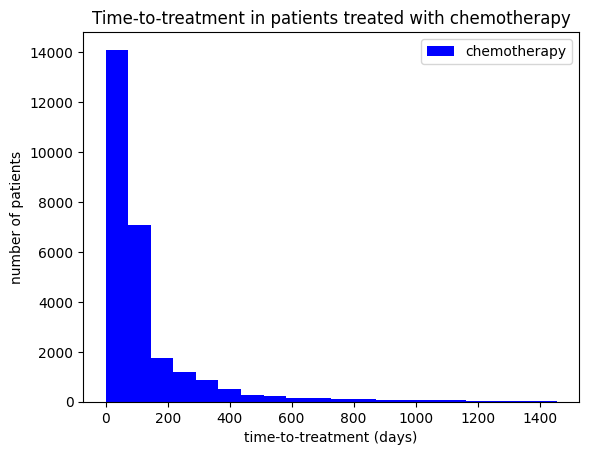

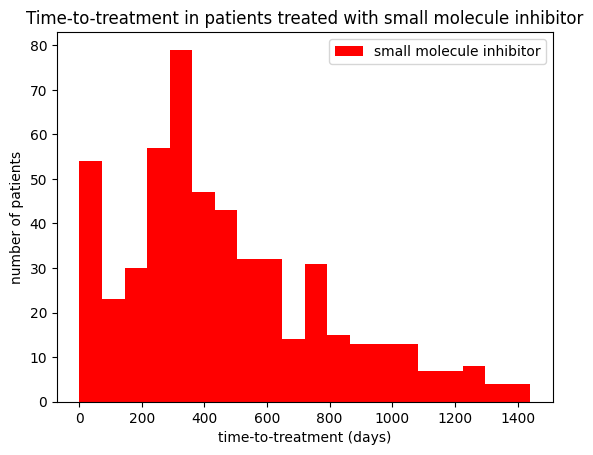

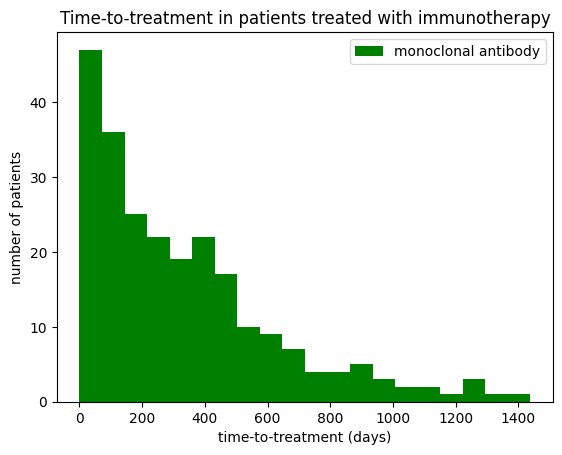

In [77]:
import matplotlib.pyplot as plt
plt.hist(new_df[new_df['cleaned_metastatic_first_treatment_type'] == 'chemotherapy']['treatment_pd'], bins=20, label = 'chemotherapy', color='blue')
plt.legend()
plt.title('Time-to-treatment in patients treated with chemotherapy')
plt.xlabel('time-to-treatment (days)')
plt.ylabel('number of patients')
plt.show()
plt.hist(new_df[new_df['cleaned_metastatic_first_treatment_type'] == 'small molecule inhibitor']['treatment_pd'], bins=20, label = 'small molecule inhibitor', color='red')
plt.legend()
plt.title('Time-to-treatment in patients treated with small molecule inhibitor')
plt.xlabel('time-to-treatment (days)')
plt.ylabel('number of patients')
plt.show()
plt.hist(new_df[new_df['cleaned_metastatic_first_treatment_type'] == 'monoclonal antibody']['treatment_pd'], bins=20, label = 'monoclonal antibody', color='green')
plt.legend()
plt.title('Time-to-treatment in patients treated with immunotherapy')
plt.xlabel('time-to-treatment (days)')
plt.ylabel('number of patients')
plt.show()

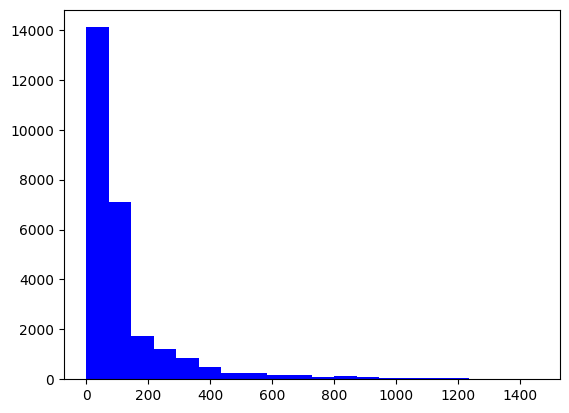

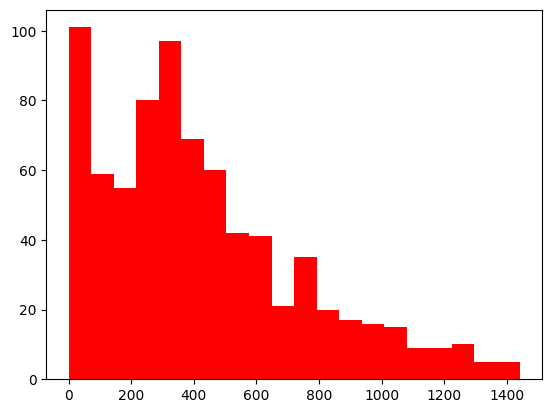

In [78]:
import matplotlib.pyplot as plt
plt.hist(new_df[new_df['cleaned_metastatic_first_treatment_type'] == 'chemotherapy']['treatment_pd'], bins=20, label = 'chemotherapy', color='blue')
plt.show()
plt.hist(new_df[new_df['cleaned_metastatic_first_treatment_type'] != 'chemotherapy']['treatment_pd'], bins=20, label = 'chemotherapy', color='red')
plt.show()

In [79]:
condition_OLAPARIB= new_df['metastatic_first_novel_treatment'] == 'OLAPARIB'
condition_PEMBROLIZUMAB = new_df['metastatic_first_novel_treatment'] == 'PEMBROLIZUMAB'


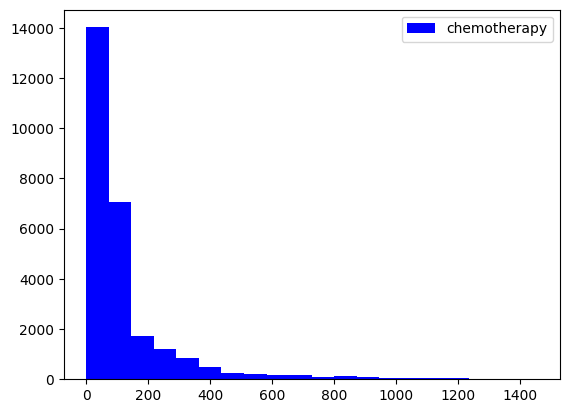

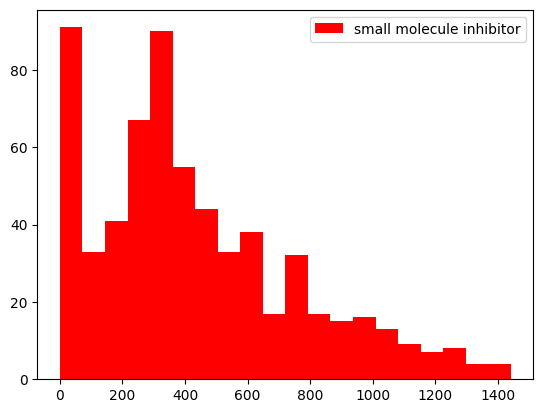

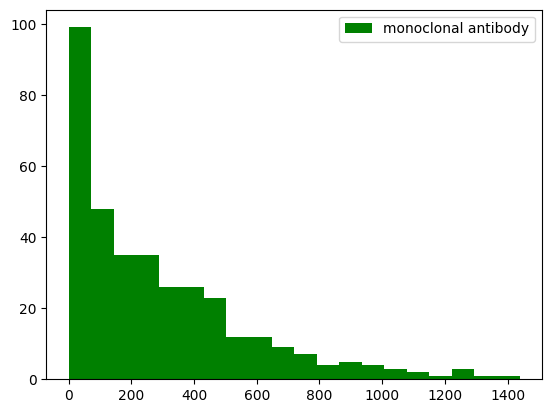

In [80]:
import matplotlib.pyplot as plt

# Assuming new_df is your DataFrame and condition_OLAPARIB and condition_PEMBROLIZUMAB are some conditions defined in your code.

# For chemotherapy
condition_chemo = (new_df['cleaned_metastatic_first_treatment_type'] == 'chemotherapy') & (~condition_OLAPARIB) & (~condition_PEMBROLIZUMAB)
plt.hist(new_df[condition_chemo]['treatment_pd'], bins=20, label='chemotherapy', color='blue')
plt.legend()
plt.show()

# For small molecule inhibitor
condition_smi = (new_df['cleaned_metastatic_first_treatment_type'] == 'small molecule inhibitor') | (condition_OLAPARIB)
plt.hist(new_df[condition_smi]['treatment_pd'], bins=20, label='small molecule inhibitor', color='red')
plt.legend()
plt.show()

# For monoclonal antibody
condition_mab = (new_df['cleaned_metastatic_first_treatment_type'] == 'monoclonal antibody') | (condition_PEMBROLIZUMAB)
plt.hist(new_df[condition_mab]['treatment_pd'], bins=20, label='monoclonal antibody', color='green')
plt.legend()
plt.show()


# Perform analysis on patient and population level data

In [81]:
new_train_df = df[df['allocated_set'] == 'train']
new_train_df.drop(columns=['allocated_set'], inplace=True)

/var/folders/tw/qnhgm1b124b8sr3mg6t5r2g00000gn/T/ipykernel_31573/3118137996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train_df.drop(columns=['allocated_set'], inplace=True)


# Check that datapoint of same zipcode share same population features

In [82]:
import pandas as pd

# Set the display options to show all columns
pd.set_option('display.max_columns', None)

# Display the DataFrame
new_train_df[new_train_df['patient_zip3'] == 917].head()

patient_id patient_race  payer_type patient_state  patient_zip3  \
0        994155        Asian  COMMERCIAL            CA           917   
79       435012        Black    MEDICAID            CA           917   
114      818224        White    MEDICAID            CA           917   
119      764010        White         NaN            CA           917   
186      120556        White  COMMERCIAL            CA           917   

     patient_age patient_gender    bmi breast_cancer_diagnosis_code  \
0             46              F  27.00                       C50811   
79            46              F    NaN                       C50212   
114           57              F  31.82                       C50911   
119           49              F  20.94                       C50412   
186           58              F  26.78                       C50811   

                          breast_cancer_diagnosis_desc  \
0    Malignant neoplasm of ovrlp sites of right fem...   
79   Malig neoplasm of upper-inner quadrant of left...   
114  Malignant neoplasm of unsp site of right femal...   
119  Malig neoplasm of upper-outer quadrant of left...   
186  Malignant neoplasm of ovrlp sites of right fem...   

     breast_cancer_diagnosis_year metastatic_cancer_diagnosis_code  \
0                            2018                             C779   
79                           2015                             C773   
114                          2015                             C773   
119                          2016                             C773   
186                          2017                             C773   

    metastatic_first_treatment metastatic_first_treatment_type  \
0              DOXORUBICIN HCL                             NaN   
79                  PACLITAXEL                 Antineoplastics   
114            DOXORUBICIN HCL                             NaN   
119           CYCLOPHOSPHAMIDE                 Antineoplastics   
186            DOXORUBICIN HCL                             NaN   

    metastatic_first_novel_treatment metastatic_first_novel_treatment_type  \
0                                NaN                                   NaN   
79                               NaN                                   NaN   
114                              NaN                                   NaN   
119                              NaN                                   NaN   
186                              NaN                                   NaN   

    region division  population      density  age_median  age_under_10  \
0     West  Pacific       43031  2048.578261   38.852174     11.306522   
79    West  Pacific       43031  2048.578261   38.852174     11.306522   
114   West  Pacific       43031  2048.578261   38.852174     11.306522   
119   West  Pacific       43031  2048.578261   38.852174     11.306522   
186   West  Pacific       43031  2048.578261   38.852174     11.306522   

     age_10_to_19    age_20s    age_30s   age_40s    age_50s    age_60s  \
0       12.897826  14.121739  13.532609  13.16087  13.378261  11.473913   
79      12.897826  14.121739  13.532609  13.16087  13.378261  11.473913   
114     12.897826  14.121739  13.532609  13.16087  13.378261  11.473913   
119     12.897826  14.121739  13.532609  13.16087  13.378261  11.473913   
186     12.897826  14.121739  13.532609  13.16087  13.378261  11.473913   

      age_70s  age_over_80       male     female    married   divorced  \
0    6.380435     3.736957  49.052174  50.947826  48.504348  10.117391   
79   6.380435     3.736957  49.052174  50.947826  48.504348  10.117391   
114  6.380435     3.736957  49.052174  50.947826  48.504348  10.117391   
119  6.380435     3.736957  49.052174  50.947826  48.504348  10.117391   
186  6.380435     3.736957  49.052174  50.947826  48.504348  10.117391   

     never_married   widowed  family_size  family_dual_income  \
0        36.408696  4.969565     3.674783           59.219565   
79       36.408696  4.969565     3.674

In [83]:
patient_level_features = ['patient_id', 'patient_race', 'payer_type', 'patient_state',
       'patient_zip3', 'patient_age', 'patient_gender', 'bmi',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'breast_cancer_diagnosis_year', 'metastatic_cancer_diagnosis_code',
       'metastatic_first_treatment', 'metastatic_first_treatment_type',
       'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'side', 'quadrant',
       'metastatic_organ', 'cleaned_metastatic_first_treatment',
       'cleaned_metastatic_first_treatment_type', 'treatment_pd']

# Extract the patient level features

In [84]:
patient_level_features_df = new_train_df[patient_level_features]
patient_level_features_df_float = patient_level_features_df.select_dtypes(include=['float64'])
patient_level_features_df_float['patient_zip3'] = patient_level_features_df['patient_zip3']

In [85]:
def scatter_plot_variable_vs_target(df, variable, target, title):
    plt.scatter(df[variable], df[target])
    plt.title(title)
    plt.xlabel(variable)
    plt.ylabel(target)
    plt.show()

## patient level feature scatterplots

In [86]:
# there is an outlier in the bmi column
patient_level_features_df_float[patient_level_features_df_float['bmi'] <90]

bmi  treatment_pd  patient_zip3
0      27.00          35.0           917
4      18.00         162.0           112
21     38.37          27.0           283
22     23.22         125.0           297
24     34.85          70.0           913
...      ...           ...           ...
27661  24.27         113.0           917
27663  28.00         235.0            73
27664  24.42         701.0           486
27665  32.52          86.0            58
27673  28.84          91.0           923

[8748 rows x 3 columns]

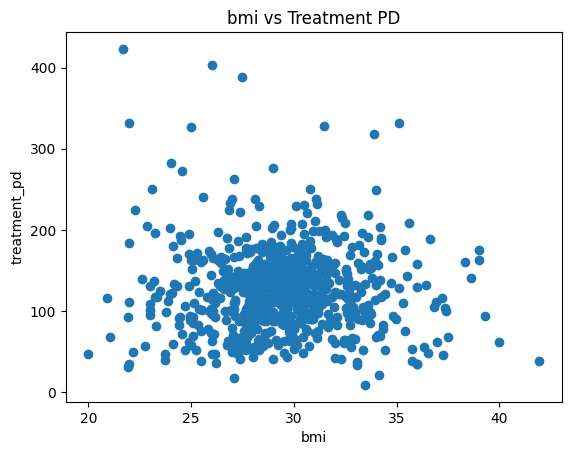

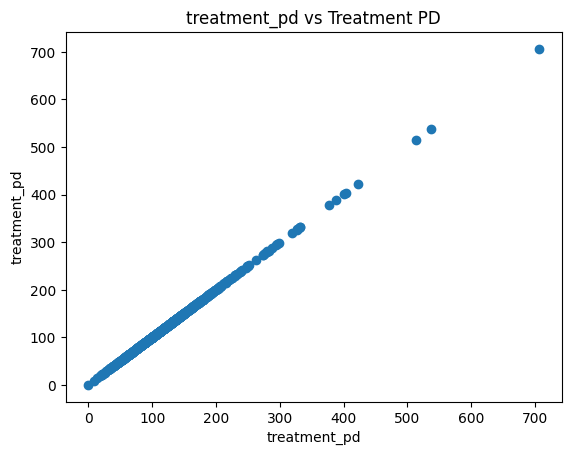

In [87]:

for variable in patient_level_features_df_float.columns[:-1]:
    # scatter_plot_variable_vs_target(patient_level_features_df_float[patient_level_features_df_float['bmi'] <90], variable, 'treatment_pd', variable + ' vs Treatment PD')
    scatter_plot_variable_vs_target(patient_level_features_df_float.groupby('patient_zip3').mean(), variable, 'treatment_pd', variable + ' vs Treatment PD')

In [88]:
patient_level_features_object = [i for i in patient_level_features if new_train_df[i].dtype == 'object']
patient_level_features_df_object = new_train_df[patient_level_features_object]
patient_level_features_df_object['patient_zip3'] = train_df['patient_zip3']
patient_level_features_df_object['treatment_pd'] = train_df['treatment_pd']

/var/folders/tw/qnhgm1b124b8sr3mg6t5r2g00000gn/T/ipykernel_31573/2746835467.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_level_features_df_object['patient_zip3'] = train_df['patient_zip3']
/var/folders/tw/qnhgm1b124b8sr3mg6t5r2g00000gn/T/ipykernel_31573/2746835467.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_level_features_df_object['treatment_pd'] = train_df['treatment_pd']


In [89]:
patient_level_features_df_object

patient_race          payer_type patient_state patient_gender  \
0            Asian          COMMERCIAL            CA              F   
1              NaN  MEDICARE ADVANTAGE            OH              F   
2              NaN          COMMERCIAL            TX              F   
3         Hispanic            MEDICAID            CA              F   
4              NaN          COMMERCIAL            NY              F   
...            ...                 ...           ...            ...   
27669          NaN          COMMERCIAL            MO              F   
27670          NaN          COMMERCIAL            IN              F   
27671     Hispanic            MEDICAID            TX              F   
27672          NaN          COMMERCIAL            AZ              F   
27673        Black                 NaN            CA              F   

      breast_cancer_diagnosis_code  \
0                           C50811   
1                           C50412   
2                           C50212   
3                             1749   
4                             1749   
...                            ...   
27669                       C50911   
27670                       C50812   
27671                       C50812   
27672                         1749   
27673                         1744   

                            breast_cancer_diagnosis_desc  \
0      Malignant neoplasm of ovrlp sites of right fem...   
1      Malig neoplasm of upper-outer quadrant of left...   
2      Malig neoplasm of upper-inner quadrant of left...   
3      Malignant neoplasm of breast (female), unspeci...   
4      Malignant neoplasm of breast (female), unspeci...   
...                                                  ...   
27669  Malignant neoplasm of unsp site of right femal...   
27670  Malignant neoplasm of ovrlp sites of left fema...   
27671  Malignant neoplasm of ovrlp sites of left fema...   
27672  Malignant neoplasm of breast (female), unspeci...   
27673  Malignant neoplasm of upper-outer quadrant of ...   

      metastatic_cancer_diagnosis_code metastatic_first_treatment  \
0                                 C779            DOXORUBICIN HCL   
1                                C7951            DOXORUBICIN HCL   
2                                 C773                 PACLITAXEL   
3                                 C787            GEMCITABINE HCL   
4                                C7989            DOXORUBICIN HCL   
...                                ...                        ...   
27669                             C773                CARBOPLATIN   
27670                             C773                CARBOPLATIN   
27671                             C773                 PACLITAXEL   
27672                             C773                CARBOPLATIN   
27673                             C773                CARBOPLATIN   

      metastatic_first_treatment_type metastatic_first_novel_treatment  \
0                                 NaN                              NaN   
1                                 NaN                              NaN   
2                     Antineoplastics                              NaN   
3                                 NaN                              NaN   
4                                 NaN                              NaN   
...                               ...                              ...   
27669                 Antineoplastics                              NaN   
27670                 Antineoplastics                              NaN   
27671                 Antineoplastics                              NaN   
27672                 Antineoplastics                              NaN   
27673                 Antineoplastics                              NaN   

      metastatic_first_novel_treatment_type         side     quadrant  \
0                                       NaN            R      overlap   
1                                       NaN            L           UO   
2                                     

## drop low variance columns or columns with high missingness

In [90]:
patient_level_features_df_object.drop(columns=['patient_gender', "metastatic_first_treatment_type", "metastatic_first_novel_treatment_type"], inplace=True)

/var/folders/tw/qnhgm1b124b8sr3mg6t5r2g00000gn/T/ipykernel_31573/2762866165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_level_features_df_object.drop(columns=['patient_gender', "metastatic_first_treatment_type", "metastatic_first_novel_treatment_type"], inplace=True)


In [91]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
for i in patient_level_features_df_object.columns:
    print(i)
    model = ols('treatment_pd ~ C(' + i + ')', data=patient_level_features_df_object).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(anova_table)

patient_race
                       sum_sq       df         F    PR(>F)
C(patient_race)  2.736714e+05      4.0  2.159567  0.070871
Residual         3.965545e+08  12517.0       NaN       NaN
payer_type
                     sum_sq       df          F        PR(>F)
C(payer_type)  4.209154e+06      2.0  60.433441  6.572797e-27
Residual       8.648717e+08  24835.0        NaN           NaN
patient_state
                        sum_sq       df         F        PR(>F)
C(patient_state)  5.215328e+06     51.0  2.913317  1.966588e-11
Residual          9.667962e+08  27543.0       NaN           NaN
breast_cancer_diagnosis_code
                                       sum_sq       df           F  PR(>F)
C(breast_cancer_diagnosis_code)  2.716555e+08     58.0  183.743634     0.0
Residual                         7.039198e+08  27615.0         NaN     NaN
breast_cancer_diagnosis_desc
                                       sum_sq       df           F  PR(>F)
C(breast_cancer_diagnosis_desc)  2.716555e+08    

In [92]:
patient_level_features_df_object[patient_level_features_df_object["patient_zip3"] ==  877]

patient_race  payer_type patient_state breast_cancer_diagnosis_code  \
6            White    MEDICAID            NM                         1742   
8423           NaN  COMMERCIAL            NM                       C50911   
10690          NaN  COMMERCIAL            NM                       C50412   
16868          NaN  COMMERCIAL            NM                       C50812   
19272          NaN  COMMERCIAL            NM                       C50411   
24402          NaN  COMMERCIAL            NM                       C50411   
25740        White    MEDICAID            NM                       C50212   

                            breast_cancer_diagnosis_desc  \
6      Malignant neoplasm of upper-inner quadrant of ...   
8423   Malignant neoplasm of unsp site of right femal...   
10690  Malig neoplasm of upper-outer quadrant of left...   
16868  Malignant neoplasm of ovrlp sites of left fema...   
19272  Malig neoplm of upper-outer quadrant of right ...   
24402  Malig neoplm of upper-outer quadrant of right ...   
25740  Malig neoplasm of upper-inner quadrant of left...   

      metastatic_cancer_diagnosis_code metastatic_first_treatment  \
6                                C7951               CAPECITABINE   
8423                              C773            DOXORUBICIN HCL   
10690                             C773           CYCLOPHOSPHAMIDE   
16868                            C7951                  DOCETAXEL   
19272                             C773            DOXORUBICIN HCL   
24402                            C7981            DOXORUBICIN HCL   
25740                             C773            DOXORUBICIN HCL   

      metastatic_first_novel_treatment         side     quadrant  \
6                                  NaN  unspecified           UI   
8423                               NaN            R  unspecified   
10690                              NaN            L           UO   
16868                              NaN            L      overlap   
19272                              NaN            R           UO   
24402                              NaN            R           UO   
25740                              NaN            L           UI   

                        metastatic_organ cleaned_metastatic_first_treatment  \
6                                   bone                       CAPECITABINE   
8423   axilla and upper limb lymph nodes                        DOXORUBICIN   
10690  axilla and upper limb lymph nodes                   CYCLOPHOSPHAMIDE   
16868                               bone                          DOCETAXEL   
19272  axilla and upper limb lymph nodes                        DOXORUBICIN   
24402                        unspecified                        DOXORUBICIN   
25740  axilla and upper limb lymph nodes                        DOXORUBICIN   

      cleaned_metastatic_first_treatment_type  patient_zip3  treatment_pd  
6                                chemotherapy           877           393  
8423                             chemotherapy           877            69  
10690                            chemotherapy           877           225  
16868                            chemotherapy           877            10  
19272                            chemotherapy           877            23  
24402                            chemotherapy           877           115  
25740                            chemotherapy           877            35

In [93]:
patient_level_features_df_object

patient_race          payer_type patient_state  \
0            Asian          COMMERCIAL            CA   
1              NaN  MEDICARE ADVANTAGE            OH   
2              NaN          COMMERCIAL            TX   
3         Hispanic            MEDICAID            CA   
4              NaN          COMMERCIAL            NY   
...            ...                 ...           ...   
27669          NaN          COMMERCIAL            MO   
27670          NaN          COMMERCIAL            IN   
27671     Hispanic            MEDICAID            TX   
27672          NaN          COMMERCIAL            AZ   
27673        Black                 NaN            CA   

      breast_cancer_diagnosis_code  \
0                           C50811   
1                           C50412   
2                           C50212   
3                             1749   
4                             1749   
...                            ...   
27669                       C50911   
27670                       C50812   
27671                       C50812   
27672                         1749   
27673                         1744   

                            breast_cancer_diagnosis_desc  \
0      Malignant neoplasm of ovrlp sites of right fem...   
1      Malig neoplasm of upper-outer quadrant of left...   
2      Malig neoplasm of upper-inner quadrant of left...   
3      Malignant neoplasm of breast (female), unspeci...   
4      Malignant neoplasm of breast (female), unspeci...   
...                                                  ...   
27669  Malignant neoplasm of unsp site of right femal...   
27670  Malignant neoplasm of ovrlp sites of left fema...   
27671  Malignant neoplasm of ovrlp sites of left fema...   
27672  Malignant neoplasm of breast (female), unspeci...   
27673  Malignant neoplasm of upper-outer quadrant of ...   

      metastatic_cancer_diagnosis_code metastatic_first_treatment  \
0                                 C779            DOXORUBICIN HCL   
1                                C7951            DOXORUBICIN HCL   
2                                 C773                 PACLITAXEL   
3                                 C787            GEMCITABINE HCL   
4                                C7989            DOXORUBICIN HCL   
...                                ...                        ...   
27669                             C773                CARBOPLATIN   
27670                             C773                CARBOPLATIN   
27671                             C773                 PACLITAXEL   
27672                             C773                CARBOPLATIN   
27673                             C773                CARBOPLATIN   

      metastatic_first_novel_treatment         side     quadrant  \
0                                  NaN            R      overlap   
1                                  NaN            L           UO   
2                                  NaN            L           UI   
3                                  NaN  unspecified  unspecified   
4                                  NaN  unspecified  unspecified   
...                                ...          ...          ...   
27669                              NaN            R  unspecified   
27670                              NaN            L      overlap   
27671                              NaN            L      overlap   
27672                              NaN  unspecified  unspecified   
27673                              NaN  unspecified           UO   

                        metastatic_organ cleaned_metastatic_first_treatment  \
0                lymph node, unspecified                        DOXORUBICIN   
1                                   bone                        DOXORUBICIN   
2      axilla and upper limb lymph nodes                         PACLITAXEL   
3                                  liver                        GEMCITABINE   
4                            unspecified                        DOXORUBICIN   
...                                

In [94]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
for i in patient_level_features_df_object.columns:
    for j in patient_level_features_df_object['patient_zip3'].unique():
        print(i, j)
        try:
            model = ols('treatment_pd ~ C(' + i + ')', data=patient_level_features_df_object[patient_level_features_df_object['patient_zip3'] == j]).fit()
            anova_table = sm.stats.anova_lm(model, typ=2)
        except:
            continue
        
        print(anova_table)



patient_race 917
                       sum_sq     df         F    PR(>F)
C(patient_race)  7.392852e+05    4.0  6.384629  0.000078
Residual         5.413248e+06  187.0       NaN       NaN
patient_race 451
                   sum_sq   df         F    PR(>F)
C(patient_race)  1128.125  1.0  1.103243  0.328459
Residual         7157.875  7.0       NaN       NaN
patient_race 773
                        sum_sq    df         F    PR(>F)
C(patient_race)   64828.757331   2.0  1.881349  0.171147
Residual         482421.113636  28.0       NaN       NaN
patient_race 928
                       sum_sq     df        F    PR(>F)
C(patient_race)  2.262098e+05    4.0  1.12657  0.346679
Residual         6.776840e+06  135.0      NaN       NaN
patient_race 112
                       sum_sq     df         F    PR(>F)
C(patient_race)  5.889061e+04    4.0  0.418468  0.795142
Residual         5.382885e+06  153.0       NaN       NaN
patient_race 462
                        sum_sq    df         F    PR(>F)
C(patie

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                        sum_sq    df         F    PR(>F)
C(patient_race)   17169.416667   2.0  0.332703  0.722912
Residual         335438.333333  13.0       NaN       NaN
patient_race 446
patient_race 617
                        sum_sq    df         F    PR(>F)
C(patient_race)   15067.587302   2.0  0.185254  0.832765
Residual         610009.357143  15.0       NaN       NaN
patient_race 770
                       sum_sq     df         F    PR(>F)
C(patient_race)  3.064115e+04    4.0  0.219391  0.927082
Residual         3.561441e+06  102.0       NaN       NaN
patient_race 953
                       sum_sq    df         F    PR(>F)
C(patient_race)  7.273235e+04   4.0  0.416475  0.795655
Residual         1.615402e+06  37.0       NaN       NaN
patient_race 562
patient_race 850
                       sum_sq    df         F    PR(>F)
C(patient_race)  6.268220e+04   3.0  0.581137  0.630832
Residual         1.438150e+06  40.0       NaN       NaN
patient_race 768
                  sum_sq   df   

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/lin

patient_race 114
                        sum_sq    df         F   PR(>F)
C(patient_race)   34909.008891   4.0  0.962785  0.44086
Residual         299131.543741  33.0       NaN      NaN
patient_race 761
                        sum_sq    df         F    PR(>F)
C(patient_race)   15276.050928   3.0  0.150509  0.928384
Residual         845798.707692  25.0       NaN       NaN
patient_race 924
                        sum_sq    df         F    PR(>F)
C(patient_race)   23089.835417   3.0  1.303275  0.292904
Residual         165356.633333  28.0       NaN       NaN
patient_race 106
                   sum_sq   df         F    PR(>F)
C(patient_race)   69696.0  1.0  0.896152  0.443737
Residual         155545.0  2.0       NaN       NaN
patient_race 88
                        sum_sq    df         F   PR(>F)
C(patient_race)  170003.102381   4.0  1.590507  0.20246
Residual         801645.583333  30.0       NaN      NaN
patient_race 443
                        sum_sq    df         F    PR(>F)
C(patient_r

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                       sum_sq   df         F    PR(>F)
C(patient_race)  19885.078788  3.0  4.693609  0.042272
Residual          9885.466667  7.0       NaN       NaN
patient_race 61
                        sum_sq    df         F    PR(>F)
C(patient_race)   47261.683333   4.0  0.608432  0.665838
Residual         194194.716667  10.0       NaN       NaN
patient_race 490
                       sum_sq    df         F    PR(>F)
C(patient_race)  2.181430e+05   2.0  4.344473  0.018325
Residual         1.230185e+06  49.0       NaN       NaN
patient_race 502
patient_race 613
patient_race 431
                        sum_sq    df         F    PR(>F)
C(patient_race)   46000.933333   2.0  0.681862  0.520677
Residual         505977.566667  15.0       NaN       NaN
patient_race 936
                        sum_sq    df         F    PR(>F)
C(patient_race)   34023.527397   3.0  0.430417  0.733014
Residual         658731.920879  25.0       NaN       NaN
patient_race 445
                        sum_sq    df

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/l

patient_race 111
                        sum_sq   df         F    PR(>F)
C(patient_race)   33448.935897  4.0  0.388923  0.811173
Residual         172007.833333  8.0       NaN       NaN
patient_race 390
                        sum_sq    df         F    PR(>F)
C(patient_race)   18091.022727   1.0  2.002664  0.178881
Residual         126468.727273  14.0       NaN       NaN
patient_race 528
                        sum_sq   df          F    PR(>F)
C(patient_race)  116890.678571  3.0  11.349987  0.038151
Residual          10298.750000  3.0        NaN       NaN
patient_race 630
                        sum_sq    df         F    PR(>F)
C(patient_race)   20141.166667   2.0  0.940494  0.415456
Residual         139200.833333  13.0       NaN       NaN
patient_race 423
                       sum_sq   df         F    PR(>F)
C(patient_race)   4032.327273  1.0  0.838314  0.383756
Residual         43290.400000  9.0       NaN       NaN
patient_race 670
patient_race 278
                       sum_sq   df 

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/lin

                        sum_sq    df         F    PR(>F)
C(patient_race)    3864.694444   1.0  0.051191  0.825562
Residual         754960.222222  10.0       NaN       NaN
patient_race 66
                        sum_sq   df         F    PR(>F)
C(patient_race)   53982.166667  4.0  0.610336  0.668539
Residual         154781.500000  7.0       NaN       NaN
patient_race 580
patient_race 162
patient_race 424
                        sum_sq    df         F   PR(>F)
C(patient_race)     336.111111   1.0  0.012016  0.91488
Residual         279711.555556  10.0       NaN      NaN
patient_race 132
                       sum_sq   df         F    PR(>F)
C(patient_race)   6483.138889  2.0  1.756036  0.250974
Residual         11075.750000  6.0       NaN       NaN
patient_race 546
patient_race 109
                       sum_sq   df         F    PR(>F)
C(patient_race)   6281.888889  3.0  0.127027  0.940038
Residual         82421.666667  5.0       NaN       NaN
patient_race 743
patient_race 279
patient_rac

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/li

patient_race 713
                        sum_sq   df         F    PR(>F)
C(patient_race)   37458.333333  2.0  0.717803  0.532049
Residual         130461.666667  5.0       NaN       NaN
patient_race 547
patient_race 814
                       sum_sq   df         F    PR(>F)
C(patient_race)   4440.833333  1.0  1.307473  0.316636
Residual         13586.000000  4.0       NaN       NaN
patient_race 372
patient_race 973
                       sum_sq    df         F    PR(>F)
C(patient_race)  8.728124e+04   2.0  0.388871  0.686061
Residual         1.346686e+06  12.0       NaN       NaN
patient_race 763
                       sum_sq   df         F    PR(>F)
C(patient_race)  62220.166667  1.0  0.766216  0.542257
Residual         81204.500000  1.0       NaN       NaN
patient_race 365
patient_race 81
                      sum_sq    df         F    PR(>F)
C(patient_race)   37281.1875   3.0  0.544935  0.660823
Residual         273656.2500  12.0       NaN       NaN
patient_race 985
                 

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/line

                  sum_sq   df         F    PR(>F)
C(patient_race)   9841.5  1.0  0.302699  0.679792
Residual         32512.5  1.0       NaN       NaN
patient_race 251
patient_race 689
patient_race 645
patient_race 788
                       sum_sq   df         F    PR(>F)
C(patient_race)   2400.793651  1.0  1.155384  0.318073
Residual         14545.428571  7.0       NaN       NaN
patient_race 49
                      sum_sq   df        F    PR(>F)
C(patient_race)   574.083333  1.0  0.16958  0.720425
Residual         6770.666667  2.0      NaN       NaN
patient_race 352
patient_race 239
                 sum_sq   df         F    PR(>F)
C(patient_race)  4873.5  2.0  11.05102  0.208053
Residual          220.5  1.0       NaN       NaN
patient_race 284
patient_race 999
patient_race 625
                   sum_sq   df         F    PR(>F)
C(patient_race)   2976.75  1.0  0.380415  0.600237
Residual         15650.00  2.0       NaN       NaN
patient_race 525
patient_race 995
patient_race 680
patien

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/line

                      sum_sq    df         F    PR(>F)
C(payer_type)    3337.856410   2.0  0.039729  0.961122
Residual       882173.476923  21.0       NaN       NaN
payer_type 297
                 sum_sq    df         F    PR(>F)
C(payer_type)   76729.0   1.0  2.857205  0.110351
Residual       429673.0  16.0       NaN       NaN
payer_type 913
                     sum_sq     df         F    PR(>F)
C(payer_type)  3.036135e+04    2.0  0.485929  0.616084
Residual       4.717318e+06  151.0       NaN       NaN
payer_type 925
                     sum_sq     df         F    PR(>F)
C(payer_type)  3.216510e+04    2.0  0.913278  0.403486
Residual       2.571015e+06  146.0       NaN       NaN
payer_type 234
                     sum_sq    df         F    PR(>F)
C(payer_type)  1.997293e+05   2.0  1.528844  0.222302
Residual       5.944151e+06  91.0       NaN       NaN
payer_type 314
                      sum_sq    df         F    PR(>F)
C(payer_type)    3056.974074   2.0  0.070794  0.931848
Residual

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                     sum_sq    df         F    PR(>F)
C(payer_type)  4.345163e+04   2.0  0.693534  0.503581
Residual       1.973552e+06  63.0       NaN       NaN
payer_type 924
                      sum_sq    df         F    PR(>F)
C(payer_type)   15466.632508   2.0  1.180723  0.320487
Residual       203038.926316  31.0       NaN       NaN
payer_type 106
                      sum_sq   df        F    PR(>F)
C(payer_type)    3315.503030  1.0  0.04882  0.830061
Residual       611218.133333  9.0      NaN       NaN
payer_type 88
                     sum_sq     df        F    PR(>F)
C(payer_type)  5.894587e+04    2.0  0.97228  0.381598
Residual       3.182887e+06  105.0      NaN       NaN
payer_type 443
                     sum_sq    df         F    PR(>F)
C(payer_type)  1.438702e+04   2.0  0.128183  0.880082
Residual       2.076409e+06  37.0       NaN       NaN
payer_type 467
                      sum_sq    df         F    PR(>F)
C(payer_type)   39585.294009   2.0  1.176331  0.321391
Residu

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                     sum_sq   df         F    PR(>F)
C(payer_type)  5.655273e+04  1.0  0.393799  0.545899
Residual       1.292474e+06  9.0       NaN       NaN
payer_type 195
                      sum_sq    df        F    PR(>F)
C(payer_type)    6369.039394   2.0  0.40947  0.669723
Residual       147766.233333  19.0      NaN       NaN
payer_type 935
                     sum_sq    df         F    PR(>F)
C(payer_type)   12492.69881   2.0  0.293688  0.747027
Residual       893282.10119  42.0       NaN       NaN
payer_type 602
                      sum_sq    df         F    PR(>F)
C(payer_type)   20450.371212   1.0  1.095556  0.319883
Residual       186666.545455  10.0       NaN       NaN
payer_type 111
                      sum_sq    df         F    PR(>F)
C(payer_type)   35763.837879   2.0  0.624347  0.543166
Residual       773306.962121  27.0       NaN       NaN
payer_type 390
                      sum_sq    df         F    PR(>F)
C(payer_type)    1596.011111   1.0  0.156924  0.697237
Re

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                     sum_sq    df         F    PR(>F)
C(payer_type)  4.498271e+04   2.0  0.260299  0.775063
Residual       1.036871e+06  12.0       NaN       NaN
payer_type 530
                      sum_sq    df         F    PR(>F)
C(payer_type)   37473.858696   2.0  0.816048  0.448906
Residual       987304.750000  43.0       NaN       NaN
payer_type 39
payer_type 319
                      sum_sq    df         F    PR(>F)
C(payer_type)   20777.392166   2.0  0.503319  0.608829
Residual       722412.949939  35.0       NaN       NaN
payer_type 187
                 sum_sq   df         F    PR(>F)
C(payer_type)  58381.25  2.0  2.903687  0.145588
Residual       50264.75  5.0       NaN       NaN
payer_type 717
                     sum_sq   df         F    PR(>F)
C(payer_type)  27191.174603  2.0  4.649199  0.060328
Residual       17545.714286  6.0       NaN       NaN
payer_type 563
                      sum_sq    df         F    PR(>F)
C(payer_type)   30374.423912   2.0  1.076768  0.350862
Res

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


               sum_sq   df         F    PR(>F)
C(payer_type)     3.2  1.0  0.003653  0.955606
Residual       2628.0  3.0       NaN       NaN
payer_type 986
                      sum_sq    df        F    PR(>F)
C(payer_type)   10058.401923   1.0  0.41145  0.534372
Residual       268908.675000  11.0      NaN       NaN
payer_type 241
payer_type 344
                      sum_sq    df         F    PR(>F)
C(payer_type)   96236.600000   2.0  1.960517  0.165714
Residual       515417.233333  21.0       NaN       NaN
payer_type 767
payer_type 152
                      sum_sq    df         F    PR(>F)
C(payer_type)   23006.387681   2.0  0.613388  0.551391
Residual       375070.916667  20.0       NaN       NaN
payer_type 764
                      sum_sq   df        F    PR(>F)
C(payer_type)   81212.626263  1.0  0.80641  0.392573
Residual       906379.555556  9.0      NaN       NaN
payer_type 308
                     sum_sq    df         F   PR(>F)
C(payer_type)  2.551282e+05   2.0  1.570042  0.233

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/lin

                     sum_sq   df         F    PR(>F)
C(payer_type)  23666.880952  1.0  2.456149  0.177849
Residual       48178.833333  5.0       NaN       NaN
payer_type 996
payer_type 259
payer_type 521
payer_type 262
                  sum_sq   df           F   PR(>F)
C(payer_type)  221551.25  1.0  326.330551  0.00037
Residual         2036.75  3.0         NaN      NaN
payer_type 397
                    sum_sq   df         F    PR(>F)
C(payer_type)   366.095238  1.0  0.646964  0.457722
Residual       2829.333333  5.0       NaN       NaN
payer_type 739
payer_type 363
payer_type 268
payer_type 264
                   sum_sq   df         F    PR(>F)
C(payer_type)  140.166667  1.0  0.529931  0.599408
Residual       264.500000  1.0       NaN       NaN
payer_type 218
payer_type 351
payer_type 138
                    sum_sq   df         F    PR(>F)
C(payer_type)  2920.533333  1.0  4.094971  0.113033
Residual       2852.800000  4.0       NaN       NaN
payer_type 45
payer_type 623
payer_type 594

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/lin

patient_state 850
patient_state 768
patient_state 337
                         sum_sq    df         F    PR(>F)
C(patient_state)    7227.741063   1.0  0.348304  0.558094
Residual          913053.911111  44.0       NaN       NaN
patient_state 304
patient_state 774
patient_state 945
patient_state 145
patient_state 79
                        sum_sq    df         F    PR(>F)
C(patient_state)  1.019395e+02   1.0  0.002222  0.962714
Residual          1.376204e+06  30.0       NaN       NaN
patient_state 750
                        sum_sq     df         F    PR(>F)
C(patient_state)  9.835496e+03    1.0  0.263389  0.608316
Residual          8.215261e+06  220.0       NaN       NaN
patient_state 915
patient_state 778
patient_state 30
                        sum_sq    df         F    PR(>F)
C(patient_state)  1.069091e+04   1.0  0.173663  0.679748
Residual          1.908396e+06  31.0       NaN       NaN
patient_state 785
patient_state 280
patient_state 235
patient_state 919
                        

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


patient_state 240
                         sum_sq    df         F    PR(>F)
C(patient_state)    1733.717460   1.0  0.136962  0.713616
Residual          430386.171429  34.0       NaN       NaN
patient_state 307
patient_state 44
patient_state 705
                        sum_sq    df         F    PR(>F)
C(patient_state)  5.109444e+03   1.0  0.146627  0.703283
Residual          1.881718e+06  54.0       NaN       NaN
patient_state 736
patient_state 201
                        sum_sq    df         F    PR(>F)
C(patient_state)  1.386613e+04   1.0  0.276331  0.600754
Residual          3.562738e+06  71.0       NaN       NaN
patient_state 325
                    sum_sq    df         F    PR(>F)
C(patient_state)    5189.4   1.0  0.224848  0.642681
Residual          323113.6  14.0       NaN       NaN
patient_state 871
                        sum_sq     df         F    PR(>F)
C(patient_state)  5.452325e+04    2.0  0.770004  0.465323
Residual          4.177735e+06  118.0       NaN       NaN
patient_

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                        sum_sq    df         F    PR(>F)
C(patient_state)  2.288226e+04   2.0  0.326158  0.724137
Residual          1.087432e+06  31.0       NaN       NaN
patient_state 526
patient_state 949
patient_state 566
patient_state 939
patient_state 310
                        sum_sq    df         F    PR(>F)
C(patient_state)  1.296212e+04   1.0  0.573524  0.451144
Residual          1.762865e+06  78.0       NaN       NaN
patient_state 497
patient_state 82
patient_state 756
patient_state 144
patient_state 31
                        sum_sq    df         F   PR(>F)
C(patient_state)     53.504762   1.0  0.051139  0.82461
Residual          13601.428571  13.0       NaN      NaN
patient_state 293
patient_state 530
patient_state 39
patient_state 319
patient_state 187
patient_state 717
                        sum_sq   df         F    PR(>F)
C(patient_state)   5744.011111  1.0  0.583705  0.466797
Residual          78724.888889  8.0       NaN       NaN
patient_state 563
patient_state 474
p

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


patient_state 185
patient_state 507
patient_state 389
patient_state 156
                        sum_sq   df         F    PR(>F)
C(patient_state)   4889.633333  1.0  0.200581  0.677438
Residual          97509.200000  4.0       NaN       NaN
patient_state 904
patient_state 678
patient_state 439
patient_state 404
patient_state 320
patient_state 175
patient_state 724
                        sum_sq    df         F    PR(>F)
C(patient_state)      6.876190   1.0  0.001051  0.974625
Residual          85014.857143  13.0       NaN       NaN
patient_state 710
patient_state 261
patient_state 534
patient_state 395
patient_state 292
patient_state 545
patient_state 873
patient_state 561
patient_state 411
patient_state 499
patient_state 671
patient_state 803
patient_state 188
patient_state 506
patient_state 477
patient_state 500
patient_state 313
                         sum_sq    df         F    PR(>F)
C(patient_state)    7540.395425   1.0  0.509956  0.485446
Residual          236581.882353  16.0    

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/li

patient_state 577
patient_state 948
patient_state 508
patient_state 359
patient_state 747
patient_state 47
patient_state 216
patient_state 11
patient_state 167
patient_state 728
patient_state 266
patient_state 679
patient_state 975
patient_state 277
patient_state 214
patient_state 153
patient_state 582
patient_state 881
patient_state 248
patient_state 511
patient_state 69
patient_state 996
patient_state 259
patient_state 521
patient_state 262
patient_state 397
patient_state 739
patient_state 363
patient_state 268
patient_state 264
patient_state 218
patient_state 351
patient_state 138
patient_state 45
patient_state 623
patient_state 594
patient_state 358
patient_state 865
patient_state 675
patient_state 438
patient_state 58
patient_state 897
patient_state 738
patient_state 846
patient_state 412
patient_state 673
patient_state 792
patient_state 843
patient_state 25
patient_state 829
patient_state 575
patient_state 160
patient_state 135
patient_state 514
patient_state 250
patient_state 63

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                                       sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_code)  3.217569e+06  19.0  4.453262  0.000559
Residual                         8.366018e+05  22.0       NaN       NaN
breast_cancer_diagnosis_code 617
                                       sum_sq    df         F   PR(>F)
C(breast_cancer_diagnosis_code)  1.177134e+06  14.0  1.623819  0.15311
Residual                         1.087376e+06  21.0       NaN      NaN
breast_cancer_diagnosis_code 770
                                       sum_sq     df         F    PR(>F)
C(breast_cancer_diagnosis_code)  1.930334e+06   27.0  2.553397  0.000093
Residual                         6.355887e+06  227.0       NaN       NaN
breast_cancer_diagnosis_code 953
                                       sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_code)  8.116497e+05  15.0  2.178926  0.013602
Residual                         2.011499e+06  81.0       NaN       NaN
breast_cancer_diagnosis_code 562
    

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/l

                                        sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_code)  105151.463636   7.0  1.641851  0.203418
Residual                         128088.900000  14.0       NaN       NaN
breast_cancer_diagnosis_code 140
                                       sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_code)  1.422533e+06  14.0  2.025138  0.039374
Residual                         2.107313e+06  42.0       NaN       NaN
breast_cancer_diagnosis_code 541
                                       sum_sq    df         F   PR(>F)
C(breast_cancer_diagnosis_code)  63252.709677  11.0  2.106561  0.07416
Residual                         51864.000000  19.0       NaN      NaN
breast_cancer_diagnosis_code 493
                                       sum_sq    df          F        PR(>F)
C(breast_cancer_diagnosis_code)  1.607540e+06  16.0  16.165786  7.166951e-09
Residual                         1.429463e+05  23.0        NaN           NaN
breast_cancer_diagnosi

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/

                                        sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_code)  735691.325192  19.0  1.669085  0.083118
Residual                         974345.061905  42.0       NaN       NaN
breast_cancer_diagnosis_code 784
                                        sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_code)  411304.835176  11.0  2.296571  0.041339
Residual                         407034.462121  25.0       NaN       NaN
breast_cancer_diagnosis_code 844
                                       sum_sq   df         F    PR(>F)
C(breast_cancer_diagnosis_code)  12518.928571  5.0  8.012114  0.261719
Residual                           312.500000  1.0       NaN       NaN
breast_cancer_diagnosis_code 802
                                       sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_code)  3.392954e+05  13.0  0.963193  0.493304
Residual                         2.438731e+06  90.0       NaN       NaN
breast_cancer_diagnosis_code 668
b

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                                       sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_code)  1.608425e+06  18.0  4.058558  0.000018
Residual                         1.387066e+06  63.0       NaN       NaN
breast_cancer_diagnosis_code 197
                                     sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_code)  1000932.95   8.0  3.579142  0.020441
Residual                          454443.05  13.0       NaN       NaN
breast_cancer_diagnosis_code 339
                                        sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_code)   40065.160215  14.0  0.356413  0.970501
Residual                         128471.033333  16.0       NaN       NaN
breast_cancer_diagnosis_code 863
                                   sum_sq   df          F    PR(>F)
C(breast_cancer_diagnosis_code)  222769.0  6.0  22.855135  0.158767
Residual                           1624.5  1.0        NaN       NaN
breast_cancer_diagnosis_code 815
                   

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/l

                                        sum_sq    df        F    PR(>F)
C(breast_cancer_diagnosis_code)  246853.483333  12.0  0.78631  0.658345
Residual                         392423.766667  15.0      NaN       NaN
breast_cancer_diagnosis_code 65
                                        sum_sq    df         F   PR(>F)
C(breast_cancer_diagnosis_code)  172098.828341  12.0  1.710417  0.14712
Residual                         150927.107143  18.0       NaN      NaN
breast_cancer_diagnosis_code 206
                                   sum_sq   df        F    PR(>F)
C(breast_cancer_diagnosis_code)   9689.25  8.0  0.25074  0.947759
Residual                         14491.00  3.0      NaN       NaN
breast_cancer_diagnosis_code 233
                                       sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_code)  1.215826e+06  15.0  3.099098  0.002422
Residual                         9.938678e+05  38.0       NaN       NaN
breast_cancer_diagnosis_code 220
                       

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/l

breast_cancer_diagnosis_code 561
                                        sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_code)  592757.902174   8.0  6.622201  0.001144
Residual                         156643.750000  14.0       NaN       NaN
breast_cancer_diagnosis_code 411
                                       sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_code)  238453.71875  13.0  4.288896  0.002542
Residual                          76981.75000  18.0       NaN       NaN
breast_cancer_diagnosis_code 499
                                        sum_sq   df          F    PR(>F)
C(breast_cancer_diagnosis_code)  498740.833333  3.0  53.628047  0.018361
Residual                           6200.000000  2.0        NaN       NaN
breast_cancer_diagnosis_code 671
                                  sum_sq   df         F    PR(>F)
C(breast_cancer_diagnosis_code)  96674.3  3.0  1.660685  0.505686
Residual                         19404.5  1.0       NaN       NaN
breast_cancer_di

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/

breast_cancer_diagnosis_code 995
breast_cancer_diagnosis_code 680
breast_cancer_diagnosis_code 977
breast_cancer_diagnosis_code 165
breast_cancer_diagnosis_code 503
                                        sum_sq   df         F    PR(>F)
C(breast_cancer_diagnosis_code)  518319.000000  8.0  1.050879  0.489787
Residual                         369918.333333  6.0       NaN       NaN
breast_cancer_diagnosis_code 249
breast_cancer_diagnosis_code 21
                                        sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_code)  238238.821429   9.0  4.357401  0.012552
Residual                          66824.416667  11.0       NaN       NaN
breast_cancer_diagnosis_code 17
                                   sum_sq   df        F    PR(>F)
C(breast_cancer_diagnosis_code)  379075.5  5.0  7.10811  0.127915
Residual                          21332.0  2.0      NaN       NaN
breast_cancer_diagnosis_code 558
                                 sum_sq   df         F   PR(>F)
C(breast

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/

breast_cancer_diagnosis_desc 917
                                       sum_sq     df         F        PR(>F)
C(breast_cancer_diagnosis_desc)  3.626583e+06   28.0  5.511629  2.263529e-14
Residual                         5.804390e+06  247.0       NaN           NaN
breast_cancer_diagnosis_desc 451
                                       sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_desc)  1.083728e+06  20.0  1.078018  0.448354
Residual                         7.539721e+05  15.0       NaN       NaN
breast_cancer_diagnosis_desc 773
                                       sum_sq     df         F    PR(>F)
C(breast_cancer_diagnosis_desc)  9.647538e+05   21.0  3.247695  0.000026
Residual                         1.669183e+06  118.0       NaN       NaN
breast_cancer_diagnosis_desc 928
                                       sum_sq     df         F        PR(>F)
C(breast_cancer_diagnosis_desc)  4.656180e+06   25.0  5.439984  3.946273e-12
Residual                         6.059900e+06  1

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                                       sum_sq     df        F    PR(>F)
C(breast_cancer_diagnosis_desc)  1.709012e+06   19.0  2.94672  0.000195
Residual                         3.510351e+06  115.0      NaN       NaN
breast_cancer_diagnosis_desc 605
                                       sum_sq     df         F    PR(>F)
C(breast_cancer_diagnosis_desc)  1.953823e+06   26.0  2.082264  0.003457
Residual                         5.232920e+06  145.0       NaN       NaN
breast_cancer_diagnosis_desc 902
                                       sum_sq     df         F   PR(>F)
C(breast_cancer_diagnosis_desc)  1.572282e+06   26.0  2.887194  0.00005
Residual                         2.534350e+06  121.0       NaN      NaN
breast_cancer_diagnosis_desc 436
                                        sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_desc)  348911.041270  15.0  1.070601  0.435414
Residual                         434536.180952  20.0       NaN       NaN
breast_cancer_diagnosis_desc 55

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/l

                                        sum_sq    df         F   PR(>F)
C(breast_cancer_diagnosis_desc)  180214.674603  17.0  0.876065  0.60299
Residual                         689731.325397  57.0       NaN      NaN
breast_cancer_diagnosis_desc 993
                                        sum_sq   df         F    PR(>F)
C(breast_cancer_diagnosis_desc)   62010.770588  9.0  0.297346  0.952797
Residual                         162203.700000  7.0       NaN       NaN
breast_cancer_diagnosis_desc 6
                                       sum_sq    df         F   PR(>F)
C(breast_cancer_diagnosis_desc)  1.003031e+06  18.0  4.446612  0.00012
Residual                         4.010169e+05  32.0       NaN      NaN
breast_cancer_diagnosis_desc 189
                                        sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_desc)  483041.433637  15.0  2.060281  0.043545
Residual                         484538.523810  31.0       NaN       NaN
breast_cancer_diagnosis_desc 478
      

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/

                                  sum_sq   df         F    PR(>F)
C(breast_cancer_diagnosis_desc)  29615.5  7.0  8.154422  0.056195
Residual                          1556.5  3.0       NaN       NaN
breast_cancer_diagnosis_desc 305
                                       sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_desc)  1.760221e+06  16.0  4.162059  0.000087
Residual                         1.163032e+06  44.0       NaN       NaN
breast_cancer_diagnosis_desc 958
                                       sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_desc)  1.213568e+06  14.0  5.283796  0.000006
Residual                         8.038703e+05  49.0       NaN       NaN
breast_cancer_diagnosis_desc 667
                                  sum_sq   df         F    PR(>F)
C(breast_cancer_diagnosis_desc)  7679.35  6.0  1.370945  0.429089
Residual                         2800.75  3.0       NaN       NaN
breast_cancer_diagnosis_desc 626
                                       s

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                                        sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_desc)  227216.510753  13.0  5.238605  0.000981
Residual                          56719.166667  17.0       NaN       NaN
breast_cancer_diagnosis_desc 144
                                   sum_sq   df         F    PR(>F)
C(breast_cancer_diagnosis_desc)  161300.0  8.0  8.832011  0.001832
Residual                          20546.0  9.0       NaN       NaN
breast_cancer_diagnosis_desc 31
                                      sum_sq   df         F    PR(>F)
C(breast_cancer_diagnosis_desc)  7745.766667  8.0  0.983104  0.523341
Residual                         5909.166667  6.0       NaN       NaN
breast_cancer_diagnosis_desc 293
                                       sum_sq   df          F        PR(>F)
C(breast_cancer_diagnosis_desc)  1.125873e+06  8.0  87.670421  1.256156e-07
Residual                         1.444737e+04  9.0        NaN           NaN
breast_cancer_diagnosis_desc 530
           

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/l

                                   sum_sq   df         F    PR(>F)
C(breast_cancer_diagnosis_desc)  290889.1  4.0  4.067651  0.078022
Residual                          89391.0  5.0       NaN       NaN
breast_cancer_diagnosis_desc 634
                                       sum_sq   df       F    PR(>F)
C(breast_cancer_diagnosis_desc)  28705.428571  5.0  2.3433  0.457568
Residual                          2450.000000  1.0     NaN       NaN
breast_cancer_diagnosis_desc 660
                                      sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_desc)  592663.9375  10.0  0.982266  0.543745
Residual                         301682.0000   5.0       NaN       NaN
breast_cancer_diagnosis_desc 741
                                       sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_desc)   7462.863636   8.0  0.804215  0.610416
Residual                         15079.500000  13.0       NaN       NaN
breast_cancer_diagnosis_desc 338
                               

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/l

breast_cancer_diagnosis_desc 417
                                       sum_sq   df         F    PR(>F)
C(breast_cancer_diagnosis_desc)  62718.222222  5.0  1.098179  0.501366
Residual                         34266.666667  3.0       NaN       NaN
breast_cancer_diagnosis_desc 688
                                  sum_sq   df         F    PR(>F)
C(breast_cancer_diagnosis_desc)  15597.5  4.0  0.325454  0.846735
Residual                         35944.0  3.0       NaN       NaN
breast_cancer_diagnosis_desc 455
                                        sum_sq   df        F    PR(>F)
C(breast_cancer_diagnosis_desc)  229805.833333  7.0  5.80895  0.012067
Residual                          45212.166667  8.0      NaN       NaN
breast_cancer_diagnosis_desc 354
breast_cancer_diagnosis_desc 734
                                  sum_sq   df       F  PR(>F)
C(breast_cancer_diagnosis_desc)  11809.5  6.0  3936.5  0.0122
Residual                             0.5  1.0     NaN     NaN
breast_cancer_diagnosis_d

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/l

breast_cancer_diagnosis_desc 990
                                       sum_sq   df        F    PR(>F)
C(breast_cancer_diagnosis_desc)  92467.333333  3.0  3.62617  0.223653
Residual                         17000.000000  2.0      NaN       NaN
breast_cancer_diagnosis_desc 263
breast_cancer_diagnosis_desc 543
                                        sum_sq   df         F   PR(>F)
C(breast_cancer_diagnosis_desc)  128542.181818  9.0  0.825671  0.70033
Residual                          17298.000000  1.0       NaN      NaN
breast_cancer_diagnosis_desc 247
breast_cancer_diagnosis_desc 37
                                    sum_sq   df           F    PR(>F)
C(breast_cancer_diagnosis_desc)  649885.25  5.0  162.015644  0.000758
Residual                           2406.75  3.0         NaN       NaN
breast_cancer_diagnosis_desc 504
                                       sum_sq   df         F    PR(>F)
C(breast_cancer_diagnosis_desc)  65456.433333  6.0  2.372097  0.255526
Residual                    

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/

                                            sum_sq    df         F    PR(>F)
C(metastatic_cancer_diagnosis_code)  113011.656109   8.0  1.181128  0.365072
Residual                             203322.382353  17.0       NaN       NaN
metastatic_cancer_diagnosis_code 427
                                           sum_sq    df         F    PR(>F)
C(metastatic_cancer_diagnosis_code)  24797.722222   7.0  0.813605  0.587221
Residual                             82728.277778  19.0       NaN       NaN
metastatic_cancer_diagnosis_code 301
                                           sum_sq     df         F  PR(>F)
C(metastatic_cancer_diagnosis_code)  1.169622e+06   13.0  3.345347  0.0002
Residual                             3.442477e+06  128.0       NaN     NaN
metastatic_cancer_diagnosis_code 481
                                           sum_sq     df         F  \
C(metastatic_cancer_diagnosis_code)  3.213268e+06   14.0  4.851718   
Residual                             1.154285e+07  244.0       Na

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                                           sum_sq    df         F    PR(>F)
C(metastatic_cancer_diagnosis_code)  6.454538e+05   9.0  1.500462  0.188793
Residual                             1.577290e+06  33.0       NaN       NaN
metastatic_cancer_diagnosis_code 447
                                           sum_sq    df         F    PR(>F)
C(metastatic_cancer_diagnosis_code)  1.637910e+05   3.0  0.385128  0.766133
Residual                             1.417632e+06  10.0       NaN       NaN
metastatic_cancer_diagnosis_code 275
                                           sum_sq    df        F    PR(>F)
C(metastatic_cancer_diagnosis_code)  7.411213e+05   8.0  3.30872  0.004813
Residual                             1.231947e+06  44.0      NaN       NaN
metastatic_cancer_diagnosis_code 373
                                            sum_sq    df         F    PR(>F)
C(metastatic_cancer_diagnosis_code)  490377.527778   3.0  2.404739  0.110966
Residual                             951632.750000  14

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                                           sum_sq   df           F  \
C(metastatic_cancer_diagnosis_code)  1.262820e+06  2.0  143.480495   
Residual                             3.960600e+04  9.0         NaN   

                                           PR(>F)  
C(metastatic_cancer_diagnosis_code)  1.491201e-07  
Residual                                      NaN  
metastatic_cancer_diagnosis_code 72
                                            sum_sq    df         F    PR(>F)
C(metastatic_cancer_diagnosis_code)  458579.887097   4.0  4.432697  0.007274
Residual                             672450.500000  26.0       NaN       NaN
metastatic_cancer_diagnosis_code 42
                                          sum_sq   df         F    PR(>F)
C(metastatic_cancer_diagnosis_code)  6768.107143  3.0  4.017277  0.141677
Residual                             1684.750000  3.0       NaN       NaN
metastatic_cancer_diagnosis_code 101
                                     sum_sq   df         F    PR(>F)
C(

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                                           sum_sq    df         F    PR(>F)
C(metastatic_cancer_diagnosis_code)  8.587138e+05   5.0  1.956762  0.119004
Residual                             2.281991e+06  26.0       NaN       NaN
metastatic_cancer_diagnosis_code 66
                                            sum_sq    df         F    PR(>F)
C(metastatic_cancer_diagnosis_code)  149362.785953   7.0  2.249487  0.088844
Residual                             142282.692308  15.0       NaN       NaN
metastatic_cancer_diagnosis_code 580
metastatic_cancer_diagnosis_code 162
metastatic_cancer_diagnosis_code 424
                                            sum_sq    df         F    PR(>F)
C(metastatic_cancer_diagnosis_code)  128748.829285   4.0  2.571491  0.067717
Residual                             262855.824561  21.0       NaN       NaN
metastatic_cancer_diagnosis_code 132
                                       sum_sq   df         F    PR(>F)
C(metastatic_cancer_diagnosis_code)   2955.75  2.0  0.7

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                                           sum_sq   df         F    PR(>F)
C(metastatic_cancer_diagnosis_code)   1500.023810  1.0  0.655213  0.455034
Residual                             11446.833333  5.0       NaN       NaN
metastatic_cancer_diagnosis_code 835
                                     sum_sq   df         F    PR(>F)
C(metastatic_cancer_diagnosis_code)   480.2  1.0  2.413065  0.218149
Residual                              597.0  3.0       NaN       NaN
metastatic_cancer_diagnosis_code 426
                                      sum_sq   df         F    PR(>F)
C(metastatic_cancer_diagnosis_code)  17696.7  1.0  6.705683  0.048864
Residual                             13195.3  5.0       NaN       NaN
metastatic_cancer_diagnosis_code 812
                                           sum_sq   df         F    PR(>F)
C(metastatic_cancer_diagnosis_code)   7731.365079  2.0  0.604031  0.576764
Residual                             38398.857143  6.0       NaN       NaN
metastatic_cancer_diag

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/l

metastatic_cancer_diagnosis_code 216
metastatic_cancer_diagnosis_code 11
                                      sum_sq   df          F    PR(>F)
C(metastatic_cancer_diagnosis_code)  13106.3  3.0  11.985642  0.208493
Residual                               364.5  1.0        NaN       NaN
metastatic_cancer_diagnosis_code 167
                                     sum_sq   df    F    PR(>F)
C(metastatic_cancer_diagnosis_code)  1837.5  1.0  3.0  0.333333
Residual                              612.5  1.0  NaN       NaN
metastatic_cancer_diagnosis_code 728
                                           sum_sq   df             F  \
C(metastatic_cancer_diagnosis_code)  1.686675e+04  2.0  2.088003e+30   
Residual                             4.038968e-27  1.0           NaN   

                                           PR(>F)  
C(metastatic_cancer_diagnosis_code)  4.893499e-16  
Residual                                      NaN  
metastatic_cancer_diagnosis_code 266
                                      

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/l

                                     sum_sq    df          F        PR(>F)
C(metastatic_first_treatment)  1.582615e+06   9.0  38.319866  2.424494e-14
Residual                       1.422559e+05  31.0        NaN           NaN
metastatic_first_treatment 133
                                     sum_sq   df         F    PR(>F)
C(metastatic_first_treatment)  36477.933333  5.0  2.429096  0.205205
Residual                       12013.666667  4.0       NaN       NaN
metastatic_first_treatment 754
                                      sum_sq    df         F  PR(>F)
C(metastatic_first_treatment)  536734.821053   7.0  2.809599  0.0612
Residual                       300199.600000  11.0       NaN     NaN
metastatic_first_treatment 923
                                     sum_sq     df          F        PR(>F)
C(metastatic_first_treatment)  2.813657e+06   13.0  10.886058  4.700041e-15
Residual                       2.405706e+06  121.0        NaN           NaN
metastatic_first_treatment 605
         

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/l

                                     sum_sq   df          F    PR(>F)
C(metastatic_first_treatment)  1.556026e+06  7.0  52.515173  0.000058
Residual                       2.539717e+04  6.0        NaN       NaN
metastatic_first_treatment 275
                                     sum_sq    df         F    PR(>F)
C(metastatic_first_treatment)  6.538098e+05   8.0  2.725739  0.015646
Residual                       1.319258e+06  44.0       NaN       NaN
metastatic_first_treatment 373
                                      sum_sq    df        F    PR(>F)
C(metastatic_first_treatment)  692563.069444   4.0  3.00332  0.058561
Residual                       749447.208333  13.0      NaN       NaN
metastatic_first_treatment 377
                                sum_sq   df         F    PR(>F)
C(metastatic_first_treatment)  2582.75  2.0  645.6875  0.027817
Residual                          2.00  1.0       NaN       NaN
metastatic_first_treatment 282
                                      sum_sq    df    

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                                     sum_sq    df        F    PR(>F)
C(metastatic_first_treatment)  4.127311e+05   5.0  0.93906  0.487877
Residual                       1.142740e+06  13.0      NaN       NaN
metastatic_first_treatment 592
                                      sum_sq   df         F   PR(>F)
C(metastatic_first_treatment)  672306.255556  3.0  1.703035  0.28096
Residual                       657949.300000  5.0       NaN      NaN
metastatic_first_treatment 991
                                sum_sq   df           F   PR(>F)
C(metastatic_first_treatment)  18784.7  3.0  500.925333  0.03283
Residual                          12.5  1.0         NaN      NaN
metastatic_first_treatment 805
                                     sum_sq    df          F        PR(>F)
C(metastatic_first_treatment)  1.979444e+06   8.0  25.380627  5.625204e-17
Residual                       6.141740e+05  63.0        NaN           NaN
metastatic_first_treatment 607
                                      sum_

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/

                                     sum_sq    df         F    PR(>F)
C(metastatic_first_treatment)  8.136420e+05   5.0  3.414145  0.016707
Residual                       1.239238e+06  26.0       NaN       NaN
metastatic_first_treatment 318
                                      sum_sq    df         F   PR(>F)
C(metastatic_first_treatment)  108987.047619   7.0  0.846113  0.56995
Residual                       239216.761905  13.0       NaN      NaN
metastatic_first_treatment 146
                                      sum_sq    df         F    PR(>F)
C(metastatic_first_treatment)  236184.991667   8.0  5.623597  0.002051
Residual                        78747.966667  15.0       NaN       NaN
metastatic_first_treatment 591
                                     sum_sq   df          F    PR(>F)
C(metastatic_first_treatment)  52569.688889  4.0  29.613389  0.003131
Residual                        1775.200000  4.0        NaN       NaN
metastatic_first_treatment 347
                                 

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/l

                                  sum_sq   df         F    PR(>F)
C(metastatic_first_treatment)  10304.625  3.0  0.158693  0.918816
Residual                       86579.250  4.0       NaN       NaN
metastatic_first_treatment 814
                                sum_sq   df         F    PR(>F)
C(metastatic_first_treatment)   7568.8  3.0  0.983431  0.470889
Residual                       12827.2  5.0       NaN       NaN
metastatic_first_treatment 372
                                      sum_sq   df         F    PR(>F)
C(metastatic_first_treatment)   67500.583333  3.0  0.246468  0.860777
Residual                       456453.416667  5.0       NaN       NaN
metastatic_first_treatment 973
                                      sum_sq    df        F    PR(>F)
C(metastatic_first_treatment)  670861.944444   6.0  1.41838  0.290887
Residual                       867125.833333  11.0      NaN       NaN
metastatic_first_treatment 763
                                  sum_sq   df         F    PR(>F)


/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/

                                     sum_sq   df        F    PR(>F)
C(metastatic_first_treatment)  28452.547619  3.0  1.71162  0.334868
Residual                       16623.166667  3.0      NaN       NaN
metastatic_first_treatment 257
                                sum_sq   df         F    PR(>F)
C(metastatic_first_treatment)  6972.25  1.0  3.294625  0.211166
Residual                       4232.50  2.0       NaN       NaN
metastatic_first_treatment 989
                                    sum_sq   df         F    PR(>F)
C(metastatic_first_treatment)  1648.800000  4.0  0.348316  0.837558
Residual                       8283.866667  7.0       NaN       NaN
metastatic_first_treatment 639
metastatic_first_treatment 323
                                 sum_sq   df         F    PR(>F)
C(metastatic_first_treatment)  1017.875  3.0  0.827541  0.543653
Residual                       1640.000  4.0       NaN       NaN
metastatic_first_treatment 380
                                      sum_sq   df 

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/

metastatic_first_treatment 138
                                    sum_sq   df          F    PR(>F)
C(metastatic_first_treatment)  5418.666667  3.0  10.185464  0.090718
Residual                        354.666667  2.0        NaN       NaN
metastatic_first_treatment 45
                                   sum_sq   df           F    PR(>F)
C(metastatic_first_treatment)  488561.375  5.0  209.570563  0.004756
Residual                          932.500  2.0         NaN       NaN
metastatic_first_treatment 623
                                      sum_sq   df         F    PR(>F)
C(metastatic_first_treatment)  204419.055556  4.0  0.507579  0.736261
Residual                       402733.166667  4.0       NaN       NaN
metastatic_first_treatment 594
                                      sum_sq   df             F    PR(>F)
C(metastatic_first_treatment)  406015.333333  4.0  12687.979167  0.006658
Residual                            8.000000  1.0           NaN       NaN
metastatic_first_treatment 358


/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/li

metastatic_first_novel_treatment 210
metastatic_first_novel_treatment 927
metastatic_first_novel_treatment 121
metastatic_first_novel_treatment 444
metastatic_first_novel_treatment 531
metastatic_first_novel_treatment 331
metastatic_first_novel_treatment 800
metastatic_first_novel_treatment 68
metastatic_first_novel_treatment 120
metastatic_first_novel_treatment 309
metastatic_first_novel_treatment 560
metastatic_first_novel_treatment 857
metastatic_first_novel_treatment 831
metastatic_first_novel_treatment 914
metastatic_first_novel_treatment 71
metastatic_first_novel_treatment 522
metastatic_first_novel_treatment 463
metastatic_first_novel_treatment 410
metastatic_first_novel_treatment 731
metastatic_first_novel_treatment 294
metastatic_first_novel_treatment 933
metastatic_first_novel_treatment 326
metastatic_first_novel_treatment 535
metastatic_first_novel_treatment 480
metastatic_first_novel_treatment 180
metastatic_first_novel_treatment 796
metastatic_first_novel_treatment 407
met

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/lin

metastatic_first_novel_treatment 806
metastatic_first_novel_treatment 318
metastatic_first_novel_treatment 146
metastatic_first_novel_treatment 591
metastatic_first_novel_treatment 347
metastatic_first_novel_treatment 198
metastatic_first_novel_treatment 703
metastatic_first_novel_treatment 801
metastatic_first_novel_treatment 476
metastatic_first_novel_treatment 615
metastatic_first_novel_treatment 641
metastatic_first_novel_treatment 107
metastatic_first_novel_treatment 281
metastatic_first_novel_treatment 587
metastatic_first_novel_treatment 456
metastatic_first_novel_treatment 148
metastatic_first_novel_treatment 229
metastatic_first_novel_treatment 16
metastatic_first_novel_treatment 244
metastatic_first_novel_treatment 786
metastatic_first_novel_treatment 681
metastatic_first_novel_treatment 598
metastatic_first_novel_treatment 676
metastatic_first_novel_treatment 415
metastatic_first_novel_treatment 199
metastatic_first_novel_treatment 559
metastatic_first_novel_treatment 809
me

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/lin

             sum_sq    df         F    PR(>F)
C(side)    21242.25   2.0  0.361107  0.702123
Residual  500015.50  17.0       NaN       NaN
side 913
                sum_sq     df          F        PR(>F)
C(side)   8.702491e+05    2.0  17.834171  9.471164e-08
Residual  4.098925e+06  168.0        NaN           NaN
side 925
                sum_sq     df         F    PR(>F)
C(side)   2.679538e+05    2.0  8.188068  0.000413
Residual  2.585268e+06  158.0       NaN       NaN
side 234
                sum_sq    df          F        PR(>F)
C(side)   1.817900e+06   2.0  19.546409  7.975207e-08
Residual  4.371202e+06  94.0        NaN           NaN
side 314
                 sum_sq    df         F    PR(>F)
C(side)   177437.992208   2.0  6.194986  0.006528
Residual  358027.436364  25.0       NaN       NaN
side 211
                 sum_sq    df         F    PR(>F)
C(side)    35829.404762   2.0  1.900865  0.195408
Residual  103669.523810  11.0       NaN       NaN
side 708
                sum_sq    df   

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                sum_sq     df          F        PR(>F)
C(side)   1.153231e+06    2.0  28.114177  2.291354e-11
Residual  3.732779e+06  182.0        NaN           NaN
side 253
            sum_sq   df         F    PR(>F)
C(side)    4928.15  2.0  1.291226  0.333177
Residual  13358.25  7.0       NaN       NaN
side 117
                sum_sq     df          F    PR(>F)
C(side)   1.045938e+06    2.0  12.278623  0.000014
Residual  5.196203e+06  122.0        NaN       NaN
side 629
               sum_sq    df         F    PR(>F)
C(side)    3916.43254   2.0  2.348094  0.125764
Residual  14177.31746  17.0       NaN       NaN
side 9
                 sum_sq    df         F    PR(>F)
C(side)    54729.957014   2.0  0.956673  0.395221
Residual  886734.307692  31.0       NaN       NaN
side 762
                 sum_sq    df          F   PR(>F)
C(side)   266062.172583   2.0  15.108477  0.00001
Residual  387422.763587  44.0        NaN      NaN
side 957
                 sum_sq    df         F    PR(>F)
C(si

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                 sum_sq    df         F  PR(>F)
C(side)   159383.385714   2.0  2.479631  0.1119
Residual  578493.566667  18.0       NaN     NaN
side 816
            sum_sq   df         F    PR(>F)
C(side)   268490.1  2.0  1.016155  0.409777
Residual  924776.0  7.0       NaN       NaN
side 841
               sum_sq    df         F    PR(>F)
C(side)   3626.041667   1.0  5.145602  0.046698
Residual  7046.875000  10.0       NaN       NaN
side 832
                 sum_sq    df          F    PR(>F)
C(side)   281124.033333   2.0  10.058024  0.001311
Residual  237576.916667  17.0        NaN       NaN
side 341
                sum_sq    df          F    PR(>F)
C(side)   69195.861111   2.0  13.657677  0.000638
Residual  32931.888889  13.0        NaN       NaN
side 735
                 sum_sq    df         F    PR(>F)
C(side)    71483.368347   2.0  2.744088  0.098741
Residual  182349.690476  14.0       NaN       NaN
side 123
                sum_sq    df          F        PR(>F)
C(side)   1.122735e

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                sum_sq    df         F    PR(>F)
C(side)   4.194762e+05   2.0  3.723761  0.036357
Residual  1.633404e+06  29.0       NaN       NaN
side 318
                 sum_sq    df          F    PR(>F)
C(side)   220346.035714   2.0  15.510315  0.000121
Residual  127857.773810  18.0        NaN       NaN
side 146
                 sum_sq    df         F    PR(>F)
C(side)    58092.521970   2.0  2.374904  0.117537
Residual  256840.436364  21.0       NaN       NaN
side 591
                sum_sq   df         F    PR(>F)
C(side)   18949.638889  2.0  1.606117  0.276286
Residual  35395.250000  6.0       NaN       NaN
side 347
                sum_sq    df         F    PR(>F)
C(side)   1.233853e+04   2.0  0.202347  0.817788
Residual  1.036610e+06  34.0       NaN       NaN
side 198
                 sum_sq    df         F    PR(>F)
C(side)    30038.012626   2.0  2.226366  0.142341
Residual  101189.598485  15.0       NaN       NaN
side 703
           sum_sq    df         F    PR(>F)
C(side)   2

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                sum_sq   df         F    PR(>F)
C(side)    9402.133333  2.0  2.565649  0.156609
Residual  10993.866667  6.0       NaN       NaN
side 372
            sum_sq   df         F    PR(>F)
C(side)   267510.7  2.0  3.129472  0.117245
Residual  256443.3  6.0       NaN       NaN
side 973
                 sum_sq    df          F    PR(>F)
C(side)   993656.349206   2.0  13.690965  0.000414
Residual  544331.428571  15.0        NaN       NaN
side 763
                 sum_sq    df         F    PR(>F)
C(side)   440762.416667   2.0  4.629039  0.030336
Residual  618909.333333  13.0       NaN       NaN
side 365
                 sum_sq   df         F    PR(>F)
C(side)     2664.714286  2.0  0.023803  0.976616
Residual  223901.000000  4.0       NaN       NaN
side 81
                 sum_sq    df         F    PR(>F)
C(side)   181229.170163   2.0  2.493695  0.109225
Residual  690412.102564  19.0       NaN       NaN
side 985
                 sum_sq    df         F   PR(>F)
C(side)    67822.81818

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/l

                sum_sq   df          F    PR(>F)
C(side)   43270.964286  2.0  47.952308  0.001603
Residual   1804.750000  4.0        NaN       NaN
side 257
           sum_sq   df         F    PR(>F)
C(side)   6972.25  1.0  3.294625  0.211166
Residual  4232.50  2.0       NaN       NaN
side 989
               sum_sq   df         F    PR(>F)
C(side)   1982.738095  2.0  1.122315  0.367145
Residual  7949.928571  9.0       NaN       NaN
side 639
side 323
            sum_sq   df         F    PR(>F)
C(side)    991.875  1.0  3.572179  0.107649
Residual  1666.000  6.0       NaN       NaN
side 380
                 sum_sq   df         F    PR(>F)
C(side)   125248.466667  2.0  1.482257  0.277692
Residual  380243.200000  9.0       NaN       NaN
side 28
                sum_sq    df         F    PR(>F)
C(side)     621.385714   2.0  0.067264  0.935298
Residual  55428.214286  12.0       NaN       NaN
side 274
side 29
                 sum_sq    df         F    PR(>F)
C(side)    65693.219925   2.0  1.2970

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/li

                    sum_sq   df           F    PR(>F)
C(quadrant)  248508.833333  4.0  552.241852  0.031903
Residual        112.500000  1.0         NaN       NaN
quadrant 283
                    sum_sq    df         F    PR(>F)
C(quadrant)  440099.738095   5.0  3.557067  0.020638
Residual     445411.595238  18.0       NaN       NaN
quadrant 297
                    sum_sq    df         F    PR(>F)
C(quadrant)   55354.035714   4.0  0.445538  0.774002
Residual     465903.714286  15.0       NaN       NaN
quadrant 913
                   sum_sq     df        F    PR(>F)
C(quadrant)  2.752931e+05    8.0  1.18765  0.309501
Residual     4.693881e+06  162.0      NaN       NaN
quadrant 925
                   sum_sq     df         F    PR(>F)
C(quadrant)  1.975251e+05    7.0  1.625688  0.132045
Residual     2.655697e+06  153.0       NaN       NaN
quadrant 234
                   sum_sq    df         F    PR(>F)
C(quadrant)  2.293703e+05   7.0  0.489331  0.840033
Residual     5.959732e+06  89.0     

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                   sum_sq    df         F    PR(>F)
C(quadrant)  7.669833e+04   6.0  0.385566  0.884961
Residual     1.724009e+06  52.0       NaN       NaN
quadrant 172
                    sum_sq   df         F    PR(>F)
C(quadrant)    5480.030769  4.0  0.066342  0.990338
Residual     165205.200000  8.0       NaN       NaN
quadrant 432
                    sum_sq    df         F    PR(>F)
C(quadrant)  143313.695815   8.0  1.241378  0.289029
Residual     981301.473016  68.0       NaN       NaN
quadrant 108
              sum_sq   df         F    PR(>F)
C(quadrant)   5796.3  1.0  0.333105  0.594763
Residual     69603.2  4.0       NaN       NaN
quadrant 191
                   sum_sq     df         F    PR(>F)
C(quadrant)  3.900459e+05    8.0  1.665509  0.111257
Residual     4.391067e+06  150.0       NaN       NaN
quadrant 286
                    sum_sq    df         F    PR(>F)
C(quadrant)   24341.471329   4.0  0.495222  0.739462
Residual     208898.892308  17.0       NaN       NaN
quadrant

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                   sum_sq    df         F   PR(>F)
C(quadrant)  7.803114e+04   8.0  0.316761  0.95626
Residual     1.632005e+06  53.0       NaN      NaN
quadrant 784
                    sum_sq    df         F    PR(>F)
C(quadrant)  156697.500761   5.0  1.468354  0.228445
Residual     661641.796537  31.0       NaN       NaN
quadrant 844
                   sum_sq   df         F    PR(>F)
C(quadrant)  11268.928571  4.0  3.606057  0.228714
Residual      1562.500000  2.0       NaN       NaN
quadrant 802
                   sum_sq    df         F    PR(>F)
C(quadrant)  1.325125e+05   7.0  0.686942  0.682796
Residual     2.645514e+06  96.0       NaN       NaN
quadrant 668
quadrant 968
                    sum_sq   df         F    PR(>F)
C(quadrant)  232604.386364  5.0  1.011547  0.495128
Residual     229949.250000  5.0       NaN       NaN
quadrant 454
                   sum_sq    df         F    PR(>F)
C(quadrant)  1.312364e+05   5.0  1.238947  0.305436
Residual     1.038073e+06  49.0       NaN

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                    sum_sq    df         F    PR(>F)
C(quadrant)   16071.311111   3.0  0.335354  0.800102
Residual     191693.688889  12.0       NaN       NaN
quadrant 229
                    sum_sq    df         F    PR(>F)
C(quadrant)  231366.434524   6.0  1.878824  0.155157
Residual     287336.708333  14.0       NaN       NaN
quadrant 16
quadrant 244
                    sum_sq    df         F    PR(>F)
C(quadrant)   96141.033333   5.0  0.736548  0.608356
Residual     365481.916667  14.0       NaN       NaN
quadrant 786
                   sum_sq    df         F    PR(>F)
C(quadrant)  1.742047e+05   7.0  0.635645  0.724816
Residual     2.662293e+06  68.0       NaN       NaN
quadrant 681
                    sum_sq    df         F    PR(>F)
C(quadrant)   39012.787879   5.0  0.557855  0.730644
Residual     223787.575758  16.0       NaN       NaN
quadrant 598
                   sum_sq    df        F    PR(>F)
C(quadrant)   7617.543761   4.0  0.55919  0.695145
Residual     61301.064935  18

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                   sum_sq   df          F    PR(>F)
C(quadrant)  90837.833333  2.0  11.785897  0.037936
Residual     11561.000000  3.0        NaN       NaN
quadrant 904
                   sum_sq   df         F    PR(>F)
C(quadrant)  63925.690476  6.0  0.851927  0.569447
Residual     87542.666667  7.0       NaN       NaN
quadrant 678
                  sum_sq   df         F    PR(>F)
C(quadrant)   620.166667  1.0  0.079381  0.825166
Residual     7812.500000  1.0       NaN       NaN
quadrant 439
              sum_sq   df         F    PR(>F)
C(quadrant)   3182.7  1.0  0.457962  0.535692
Residual     27798.8  4.0       NaN       NaN
quadrant 404
                   sum_sq    df         F    PR(>F)
C(quadrant)  1.308275e+05   5.0  0.298294  0.907121
Residual     1.491190e+06  17.0       NaN       NaN
quadrant 320
                    sum_sq    df        F    PR(>F)
C(quadrant)   24115.082353   4.0  1.01113  0.420535
Residual     149060.284314  25.0      NaN       NaN
quadrant 175
             

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/l

                    sum_sq   df         F    PR(>F)
C(quadrant)  108527.083333  3.0  0.555365  0.663363
Residual     390831.416667  6.0       NaN       NaN
quadrant 856
                    sum_sq    df         F    PR(>F)
C(quadrant)  174353.402778   6.0  0.705696  0.652046
Residual     452954.375000  11.0       NaN       NaN
quadrant 157
quadrant 651
                  sum_sq   df         F    PR(>F)
C(quadrant)  2008.333333  2.0  3.896314  0.146552
Residual      773.166667  3.0       NaN       NaN
quadrant 971
               sum_sq   df         F    PR(>F)
C(quadrant)   13590.8  3.0  0.224534  0.876085
Residual     121057.7  6.0       NaN       NaN
quadrant 137
                   sum_sq   df         F    PR(>F)
C(quadrant)   5580.357143  1.0  0.686382  0.445131
Residual     40650.500000  5.0       NaN       NaN
quadrant 955
                   sum_sq   df          F    PR(>F)
C(quadrant)  89318.681818  4.0  12.721647  0.004322
Residual     10531.500000  6.0        NaN       NaN
quadran

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/

                 sum_sq   df         F    PR(>F)
C(quadrant)   61215.875  2.0  0.357337  0.716055
Residual     428278.000  5.0       NaN       NaN
quadrant 623
                    sum_sq   df         F    PR(>F)
C(quadrant)   27427.422222  3.0  0.078852  0.968715
Residual     579724.800000  5.0       NaN       NaN
quadrant 594
                    sum_sq   df          F    PR(>F)
C(quadrant)  316624.133333  1.0  14.166755  0.019709
Residual      89399.200000  4.0        NaN       NaN
quadrant 358
                  sum_sq   df         F    PR(>F)
C(quadrant)  1064.083333  1.0  1.552981  0.280696
Residual     2740.750000  4.0       NaN       NaN
quadrant 865
quadrant 675
                  sum_sq   df         F    PR(>F)
C(quadrant)   704.166667  1.0  0.695473  0.557484
Residual     1012.500000  1.0       NaN       NaN
quadrant 438
quadrant 58
quadrant 897
                  sum_sq   df         F    PR(>F)
C(quadrant)  1568.166667  1.0  5.018133  0.267291
Residual      312.500000  1.0      

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                            sum_sq    df         F    PR(>F)
C(metastatic_organ)  451859.957647   4.0  3.400453  0.021308
Residual             963396.660000  29.0       NaN       NaN
metastatic_organ 650
                            sum_sq   df         F    PR(>F)
C(metastatic_organ)    7416.544444  1.0  0.237425  0.639143
Residual             249899.555556  8.0       NaN       NaN
metastatic_organ 179
                            sum_sq   df         F    PR(>F)
C(metastatic_organ)  479275.388889  3.0  35.77296  0.000838
Residual              22329.500000  5.0       NaN       NaN
metastatic_organ 633
                           sum_sq    df         F    PR(>F)
C(metastatic_organ)  5.466746e+05   7.0  1.350661  0.251386
Residual             2.428476e+06  42.0       NaN       NaN
metastatic_organ 864
                            sum_sq   df         F    PR(>F)
C(metastatic_organ)   13781.633333  1.0  0.401215  0.571454
Residual             103049.166667  3.0       NaN       NaN
metastatic_or

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                        sum_sq    df           F        PR(>F)
C(metastatic_organ)  508799.95   3.0  274.073299  5.833477e-14
Residual               9901.00  16.0         NaN           NaN
metastatic_organ 341
                           sum_sq    df          F    PR(>F)
C(metastatic_organ)  91400.113636   4.0  23.430167  0.000025
Residual             10727.636364  11.0        NaN       NaN
metastatic_organ 735
                            sum_sq    df         F    PR(>F)
C(metastatic_organ)   82995.392157   3.0  2.105196  0.148982
Residual             170837.666667  13.0       NaN       NaN
metastatic_organ 123
                           sum_sq    df          F    PR(>F)
C(metastatic_organ)  8.541427e+05   3.0  10.448748  0.000031
Residual             1.117195e+06  41.0        NaN       NaN
metastatic_organ 457
                            sum_sq    df         F    PR(>F)
C(metastatic_organ)   37251.022727   5.0  0.185227  0.964043
Residual             643552.250000  16.0       NaN      

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                            sum_sq   df           F    PR(>F)
C(metastatic_organ)  148242.133333  2.0  280.407566  0.003554
Residual                528.666667  2.0         NaN       NaN
metastatic_organ 393
                           sum_sq   df         F    PR(>F)
C(metastatic_organ)  36514.000000  2.0  6.189591  0.020377
Residual             26546.666667  9.0       NaN       NaN
metastatic_organ 544
                            sum_sq   df          F    PR(>F)
C(metastatic_organ)  186500.791667  4.0  38.753411  0.000073
Residual               8421.875000  7.0        NaN       NaN
metastatic_organ 472
                           sum_sq    df         F    PR(>F)
C(metastatic_organ)  291519.48913   4.0  3.461603  0.028924
Residual             378968.25000  18.0       NaN       NaN
metastatic_organ 537
                       sum_sq    df         F    PR(>F)
C(metastatic_organ)   18383.0   2.0  0.106152  0.900198
Residual             952467.0  11.0       NaN       NaN
metastatic_organ 749
 

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                            sum_sq    df         F    PR(>F)
C(metastatic_organ)  529099.696970   3.0  6.926315  0.002688
Residual             458338.666667  18.0       NaN       NaN
metastatic_organ 500
                          sum_sq   df         F    PR(>F)
C(metastatic_organ)  1752.083333  1.0  2.062892  0.287441
Residual             1698.666667  2.0       NaN       NaN
metastatic_organ 313
                            sum_sq    df          F    PR(>F)
C(metastatic_organ)  206825.508547   3.0  25.878534  0.000006
Residual              37296.769231  14.0        NaN       NaN
metastatic_organ 918
                           sum_sq    df         F    PR(>F)
C(metastatic_organ)   6582.850000   4.0  0.519511  0.723752
Residual             31678.083333  10.0       NaN       NaN
metastatic_organ 379
                            sum_sq    df         F   PR(>F)
C(metastatic_organ)   15559.048951   2.0  0.180405  0.83759
Residual             431226.181818  10.0       NaN      NaN
metastatic_or

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/l

metastatic_organ 503
                            sum_sq    df          F    PR(>F)
C(metastatic_organ)  807765.233333   3.0  36.805375  0.000005
Residual              80472.100000  11.0        NaN       NaN
metastatic_organ 249
metastatic_organ 21
                            sum_sq    df          F    PR(>F)
C(metastatic_organ)  260502.338095   5.0  17.537954  0.000009
Residual              44560.900000  15.0        NaN       NaN
metastatic_organ 17
                            sum_sq   df         F    PR(>F)
C(metastatic_organ)  229416.166667  2.0  3.354208  0.119174
Residual             170991.333333  5.0       NaN       NaN
metastatic_organ 558
                         sum_sq   df         F    PR(>F)
C(metastatic_organ)  114.083333  1.0  4.503289  0.167856
Residual              50.666667  2.0       NaN       NaN
metastatic_organ 972
                            sum_sq    df         F    PR(>F)
C(metastatic_organ)   24395.377220   2.0  1.142459  0.332524
Residual             320300.804

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/l

metastatic_organ 653
cleaned_metastatic_first_treatment 917
                                             sum_sq     df          F  \
C(cleaned_metastatic_first_treatment)  3.977226e+06   13.0  14.697493   
Residual                               5.453747e+06  262.0        NaN   

                                             PR(>F)  
C(cleaned_metastatic_first_treatment)  1.114747e-24  
Residual                                        NaN  
cleaned_metastatic_first_treatment 451
                                             sum_sq    df         F    PR(>F)
C(cleaned_metastatic_first_treatment)  6.402831e+05   6.0  2.584482  0.039528
Residual                               1.197417e+06  29.0       NaN       NaN
cleaned_metastatic_first_treatment 773
                                             sum_sq     df          F  \
C(cleaned_metastatic_first_treatment)  1.254395e+06    9.0  13.134088   
Residual                               1.379543e+06  130.0        NaN   

                          

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/l

                                              sum_sq    df          F   PR(>F)
C(cleaned_metastatic_first_treatment)  185924.808081   4.0  16.700225  0.00001
Residual                                47315.555556  17.0        NaN      NaN
cleaned_metastatic_first_treatment 140
                                             sum_sq    df         F    PR(>F)
C(cleaned_metastatic_first_treatment)  1.467661e+06   9.0  3.716665  0.001386
Residual                               2.062185e+06  47.0       NaN       NaN
cleaned_metastatic_first_treatment 541
                                             sum_sq    df         F    PR(>F)
C(cleaned_metastatic_first_treatment)  42416.131106   6.0  2.333744  0.064449
Residual                               72700.578571  24.0       NaN       NaN
cleaned_metastatic_first_treatment 493
                                             sum_sq    df          F  \
C(cleaned_metastatic_first_treatment)  1.455561e+06   7.0  22.561644   
Residual                          

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                                             sum_sq   df          F  \
C(cleaned_metastatic_first_treatment)  1.366836e+06  6.0  125.68685   
Residual                               1.268742e+04  7.0        NaN   

                                             PR(>F)  
C(cleaned_metastatic_first_treatment)  9.100512e-07  
Residual                                        NaN  
cleaned_metastatic_first_treatment 236
                                             sum_sq    df         F    PR(>F)
C(cleaned_metastatic_first_treatment)  1.287151e+06   8.0  5.873957  0.000029
Residual                               1.342162e+06  49.0       NaN       NaN
cleaned_metastatic_first_treatment 321
                                              sum_sq    df         F    PR(>F)
C(cleaned_metastatic_first_treatment)  265951.821429   9.0  1.196413  0.389503
Residual                               246989.928571  10.0       NaN       NaN
cleaned_metastatic_first_treatment 916
                                    

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/

                                              sum_sq    df         F    PR(>F)
C(cleaned_metastatic_first_treatment)  555204.461134   8.0  3.125533  0.013682
Residual                               555109.803571  25.0       NaN       NaN
cleaned_metastatic_first_treatment 526
                                            sum_sq   df         F    PR(>F)
C(cleaned_metastatic_first_treatment)   261.333333  1.0  0.189189  0.706028
Residual                               2762.666667  2.0       NaN       NaN
cleaned_metastatic_first_treatment 949
                                              sum_sq    df         F    PR(>F)
C(cleaned_metastatic_first_treatment)  498208.833333   5.0  2.682728  0.053573
Residual                               705697.166667  19.0       NaN       NaN
cleaned_metastatic_first_treatment 566
                                              sum_sq    df        F    PR(>F)
C(cleaned_metastatic_first_treatment)  297792.436842   8.0  4.00904  0.022025
Residual                 

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/l

                                              sum_sq    df         F    PR(>F)
C(cleaned_metastatic_first_treatment)  133681.095960   5.0  2.403678  0.083018
Residual                               177968.722222  16.0       NaN       NaN
cleaned_metastatic_first_treatment 473
                                             sum_sq    df          F  \
C(cleaned_metastatic_first_treatment)  1.637100e+06   7.0  15.684418   
Residual                               4.324209e+05  29.0        NaN   

                                             PR(>F)  
C(cleaned_metastatic_first_treatment)  2.565983e-08  
Residual                                        NaN  
cleaned_metastatic_first_treatment 255
                                            sum_sq   df         F    PR(>F)
C(cleaned_metastatic_first_treatment)  7922.333333  4.0  0.523341  0.760954
Residual                               3784.500000  1.0       NaN       NaN
cleaned_metastatic_first_treatment 376
                                       

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/

                                            sum_sq   df         F    PR(>F)
C(cleaned_metastatic_first_treatment)  1648.800000  4.0  0.348316  0.837558
Residual                               8283.866667  7.0       NaN       NaN
cleaned_metastatic_first_treatment 639
cleaned_metastatic_first_treatment 323
                                         sum_sq   df         F    PR(>F)
C(cleaned_metastatic_first_treatment)  1017.875  3.0  0.827541  0.543653
Residual                               1640.000  4.0       NaN       NaN
cleaned_metastatic_first_treatment 380
                                              sum_sq   df         F    PR(>F)
C(cleaned_metastatic_first_treatment)  431316.916667  6.0  4.845729  0.052115
Residual                                74174.750000  5.0       NaN       NaN
cleaned_metastatic_first_treatment 28
                                             sum_sq    df         F   PR(>F)
C(cleaned_metastatic_first_treatment)  13263.135714   4.0  0.774961  0.56592
Residual  

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/

cleaned_metastatic_first_treatment 521
cleaned_metastatic_first_treatment 262
                                              sum_sq   df        F    PR(>F)
C(cleaned_metastatic_first_treatment)   41403.333333  2.0  0.22726  0.814823
Residual                               182184.666667  2.0      NaN       NaN
cleaned_metastatic_first_treatment 397
                                            sum_sq   df        F    PR(>F)
C(cleaned_metastatic_first_treatment)  1336.761905  2.0  1.43841  0.338333
Residual                               1858.666667  4.0      NaN       NaN
cleaned_metastatic_first_treatment 739
                                       sum_sq   df         F    PR(>F)
C(cleaned_metastatic_first_treatment)  1323.0  1.0  0.418274  0.584111
Residual                               6326.0  2.0       NaN       NaN
cleaned_metastatic_first_treatment 363
cleaned_metastatic_first_treatment 268
cleaned_metastatic_first_treatment 264
                                           sum_sq   df    

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/l

cleaned_metastatic_first_treatment_type 770
                                                  sum_sq     df          F  \
C(cleaned_metastatic_first_treatment_type)  8.045373e+05    2.0  13.549316   
Residual                                    7.481684e+06  252.0        NaN   

                                              PR(>F)  
C(cleaned_metastatic_first_treatment_type)  0.000003  
Residual                                         NaN  
cleaned_metastatic_first_treatment_type 953
                                                  sum_sq    df          F  \
C(cleaned_metastatic_first_treatment_type)  9.858594e+05   1.0  50.975437   
Residual                                    1.837290e+06  95.0        NaN   

                                                  PR(>F)  
C(cleaned_metastatic_first_treatment_type)  1.866345e-10  
Residual                                             NaN  
cleaned_metastatic_first_treatment_type 562
cleaned_metastatic_first_treatment_type 850
               

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


cleaned_metastatic_first_treatment_type 282
cleaned_metastatic_first_treatment_type 392
                                                  sum_sq    df         F  \
C(cleaned_metastatic_first_treatment_type)   75801.62087   2.0  6.600433   
Residual                                    126327.73913  22.0       NaN   

                                              PR(>F)  
C(cleaned_metastatic_first_treatment_type)  0.005683  
Residual                                         NaN  
cleaned_metastatic_first_treatment_type 907
cleaned_metastatic_first_treatment_type 440
                                                  sum_sq     df         F  \
C(cleaned_metastatic_first_treatment_type)  2.148545e+05    2.0  3.600111   
Residual                                    3.759838e+06  126.0       NaN   

                                              PR(>F)  
C(cleaned_metastatic_first_treatment_type)  0.030167  
Residual                                         NaN  
cleaned_metastatic_first_treatmen

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


cleaned_metastatic_first_treatment_type 863
cleaned_metastatic_first_treatment_type 815
cleaned_metastatic_first_treatment_type 54
cleaned_metastatic_first_treatment_type 811
cleaned_metastatic_first_treatment_type 619
                                              sum_sq   df          F    PR(>F)
C(cleaned_metastatic_first_treatment_type)  273240.9  1.0  23.705453  0.001242
Residual                                     92212.0  8.0        NaN       NaN
cleaned_metastatic_first_treatment_type 350
cleaned_metastatic_first_treatment_type 701
cleaned_metastatic_first_treatment_type 905
cleaned_metastatic_first_treatment_type 564
                                                  sum_sq    df        F  \
C(cleaned_metastatic_first_treatment_type)  2.167774e+03   1.0  0.04693   
Residual                                    1.431944e+06  31.0      NaN   

                                              PR(>F)  
C(cleaned_metastatic_first_treatment_type)  0.829914  
Residual                        

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


cleaned_metastatic_first_treatment_type 421
                                                   sum_sq    df         F  \
C(cleaned_metastatic_first_treatment_type)     493.132184   1.0  0.019229   
Residual                                    718079.034483  28.0       NaN   

                                              PR(>F)  
C(cleaned_metastatic_first_treatment_type)  0.890705  
Residual                                         NaN  
cleaned_metastatic_first_treatment_type 851
                                                  sum_sq    df         F  \
C(cleaned_metastatic_first_treatment_type)  4.377844e+04   1.0  0.792064   
Residual                                    1.050155e+06  19.0       NaN   

                                              PR(>F)  
C(cleaned_metastatic_first_treatment_type)  0.384607  
Residual                                         NaN  
cleaned_metastatic_first_treatment_type 56
cleaned_metastatic_first_treatment_type 847
cleaned_metastatic_first_treatment

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/lin

cleaned_metastatic_first_treatment_type 25
                                                   sum_sq   df          F  \
C(cleaned_metastatic_first_treatment_type)  248544.083333  1.0  16.725337   
Residual                                     29720.666667  2.0        NaN   

                                              PR(>F)  
C(cleaned_metastatic_first_treatment_type)  0.054911  
Residual                                         NaN  
cleaned_metastatic_first_treatment_type 829
cleaned_metastatic_first_treatment_type 575
cleaned_metastatic_first_treatment_type 160
cleaned_metastatic_first_treatment_type 135
cleaned_metastatic_first_treatment_type 514
cleaned_metastatic_first_treatment_type 250
cleaned_metastatic_first_treatment_type 638
cleaned_metastatic_first_treatment_type 12
cleaned_metastatic_first_treatment_type 684
cleaned_metastatic_first_treatment_type 646
cleaned_metastatic_first_treatment_type 355
cleaned_metastatic_first_treatment_type 51
cleaned_metastatic_first_treatment

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


patient_zip3 802
patient_zip3 668
patient_zip3 968
patient_zip3 454
patient_zip3 890
patient_zip3 40
patient_zip3 604
patient_zip3 833
patient_zip3 329
patient_zip3 87
patient_zip3 374
patient_zip3 722
patient_zip3 655
patient_zip3 126
patient_zip3 212
patient_zip3 609
patient_zip3 186
patient_zip3 745
patient_zip3 336
patient_zip3 882
patient_zip3 448
patient_zip3 911
patient_zip3 520
patient_zip3 401
patient_zip3 551
patient_zip3 64
patient_zip3 317
patient_zip3 622
patient_zip3 494
patient_zip3 479
patient_zip3 557
patient_zip3 246
patient_zip3 305
patient_zip3 958
patient_zip3 667
patient_zip3 626
patient_zip3 333
patient_zip3 941
patient_zip3 164
patient_zip3 540
patient_zip3 947
patient_zip3 648
patient_zip3 236
patient_zip3 321
patient_zip3 916
patient_zip3 183
patient_zip3 242
patient_zip3 469
patient_zip3 38
patient_zip3 608
patient_zip3 208
patient_zip3 195
patient_zip3 935
patient_zip3 602
patient_zip3 111
patient_zip3 390
patient_zip3 528
patient_zip3 630
patient_zip3 423
p

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


patient_zip3 870
patient_zip3 806
patient_zip3 318
patient_zip3 146
patient_zip3 591
patient_zip3 347
patient_zip3 198
patient_zip3 703
patient_zip3 801
patient_zip3 476
patient_zip3 615
patient_zip3 641
patient_zip3 107
patient_zip3 281
patient_zip3 587
patient_zip3 456
patient_zip3 148
patient_zip3 229
patient_zip3 16
patient_zip3 244
patient_zip3 786
patient_zip3 681
patient_zip3 598
patient_zip3 676
patient_zip3 415
patient_zip3 199
patient_zip3 559
patient_zip3 809
patient_zip3 595
patient_zip3 793
patient_zip3 597
patient_zip3 944
patient_zip3 173
patient_zip3 65
patient_zip3 206
patient_zip3 233
patient_zip3 220
patient_zip3 41
patient_zip3 161
patient_zip3 393
patient_zip3 544
patient_zip3 472
patient_zip3 537
patient_zip3 749
patient_zip3 306
patient_zip3 285
patient_zip3 721
patient_zip3 783
patient_zip3 860
patient_zip3 585
patient_zip3 666
patient_zip3 219
patient_zip3 10
patient_zip3 908
patient_zip3 725
patient_zip3 616
patient_zip3 433
patient_zip3 943
patient_zip3 637
p

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


patient_zip3 366
patient_zip3 789
patient_zip3 994
patient_zip3 661
patient_zip3 737
patient_zip3 357
patient_zip3 260
patient_zip3 548
patient_zip3 624
patient_zip3 596
patient_zip3 270
patient_zip3 163
patient_zip3 538
patient_zip3 383
patient_zip3 34
patient_zip3 276
patient_zip3 166
patient_zip3 505
patient_zip3 252
patient_zip3 755
patient_zip3 719
patient_zip3 491
patient_zip3 654
patient_zip3 990
patient_zip3 263
patient_zip3 543
patient_zip3 247
patient_zip3 37
patient_zip3 504
patient_zip3 577
patient_zip3 948
patient_zip3 508
patient_zip3 359
patient_zip3 747
patient_zip3 47
patient_zip3 216
patient_zip3 11
patient_zip3 167
patient_zip3 728
patient_zip3 266
patient_zip3 679
patient_zip3 975
patient_zip3 277
patient_zip3 214
patient_zip3 153
patient_zip3 582
patient_zip3 881
patient_zip3 248
patient_zip3 511
patient_zip3 69
patient_zip3 996
patient_zip3 259
patient_zip3 521
patient_zip3 262
patient_zip3 397
patient_zip3 739
patient_zip3 363
patient_zip3 268
patient_zip3 264
pa

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/line

                       sum_sq     df             F  PR(>F)
C(treatment_pd)  9.430973e+06  165.0  1.935039e+28     0.0
Residual         3.249193e-22  110.0           NaN     NaN
treatment_pd 451
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  1.837700e+06  31.0  8.397558e+28  3.019091e-58
Residual         2.823708e-24   4.0           NaN           NaN
treatment_pd 773
                       sum_sq    df             F  PR(>F)
C(treatment_pd)  2.633937e+06  99.0  4.887518e+28     0.0
Residual         2.177418e-23  40.0           NaN     NaN
treatment_pd 928
                       sum_sq     df             F  PR(>F)
C(treatment_pd)  1.071608e+07  134.0  1.807440e+28     0.0
Residual         3.008680e-22   68.0           NaN     NaN
treatment_pd 112
                       sum_sq     df             F  PR(>F)
C(treatment_pd)  9.531445e+06  197.0  6.330395e+27     0.0
Residual         1.047086e-21  137.0           NaN     NaN
treatment_pd 462
                  

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/

                       sum_sq    df             F  PR(>F)
C(treatment_pd)  5.070157e+06  68.0  1.057816e+28     0.0
Residual         1.973606e-22  28.0           NaN     NaN
treatment_pd 982
                       sum_sq    df             F         PR(>F)
C(treatment_pd)  1.825331e+06  49.0  7.881607e+28  3.002965e-186
Residual         6.144324e-24  13.0           NaN            NaN
treatment_pd 946
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  3.163340e+05  22.0  4.342538e+28  1.578545e-43
Residual         9.933467e-25   3.0           NaN           NaN
treatment_pd 427
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  1.075260e+05  23.0  8.541961e+26  5.713847e-41
Residual         1.641910e-23   3.0           NaN           NaN
treatment_pd 301
                       sum_sq    df             F  PR(>F)
C(treatment_pd)  4.612099e+06  93.0  5.382454e+28     0.0
Residual         4.422590e-23  48.0           NaN     NaN
treat

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                       sum_sq    df             F        PR(>F)
C(treatment_pd)  2.233231e+04  11.0  5.448841e+28  3.341420e-15
Residual         3.725948e-26   1.0           NaN           NaN
treatment_pd 142
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  1.236028e+06  50.0  1.304015e+28  2.279407e-84
Residual         1.137436e-23   6.0           NaN           NaN
treatment_pd 291
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  3.395892e+05  18.0  9.247098e+28  1.081420e-29
Residual         4.080430e-25   2.0           NaN           NaN
treatment_pd 959
                       sum_sq    df             F         PR(>F)
C(treatment_pd)  2.643389e+06  72.0  4.750158e+28  1.040842e-311
Residual         1.700369e-23  22.0           NaN            NaN
treatment_pd 853
                       sum_sq    df             F         PR(>F)
C(treatment_pd)  5.312316e+06  77.0  1.450118e+28  4.217920e-223
Residual         7.612196e-23  

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/

                       sum_sq     df             F  PR(>F)
C(treatment_pd)  8.730573e+06  133.0  4.592747e+28     0.0
Residual         1.515041e-22  106.0           NaN     NaN
treatment_pd 171
treatment_pd 441
                       sum_sq     df             F  PR(>F)
C(treatment_pd)  8.205956e+06  124.0  9.136438e+27     0.0
Residual         5.504834e-22   76.0           NaN     NaN
treatment_pd 751
                       sum_sq    df             F         PR(>F)
C(treatment_pd)  5.446765e+06  78.0  3.429892e+28  3.693145e-268
Residual         3.868274e-23  19.0           NaN            NaN
treatment_pd 981
                       sum_sq    df             F         PR(>F)
C(treatment_pd)  1.334016e+06  34.0  4.300600e+28  5.332699e-100
Residual         6.386326e-24   7.0           NaN            NaN
treatment_pd 974
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  7.007422e+05  32.0  1.143278e+29  7.529799e-73
Residual         9.576929e-25   5.0        

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/

                       sum_sq    df             F        PR(>F)
C(treatment_pd)  1.884062e+06  40.0  8.169432e+28  6.028687e-44
Residual         1.729676e-24   3.0           NaN           NaN
treatment_pd 43
treatment_pd 388
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  1.026316e+06  15.0  2.402805e+29  4.161803e-30
Residual         5.695102e-25   2.0           NaN           NaN
treatment_pd 453
                       sum_sq    df             F         PR(>F)
C(treatment_pd)  2.223390e+06  51.0  3.778497e+27  1.102140e-177
Residual         1.499926e-22  13.0           NaN            NaN
treatment_pd 150
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  6.569784e+05  13.0  1.169545e+29  2.288695e-15
Residual         4.321064e-25   1.0           NaN           NaN
treatment_pd 921
                       sum_sq    df             F         PR(>F)
C(treatment_pd)  2.806364e+06  88.0  1.688261e+28  9.950482e-321
Residual       

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/

                       sum_sq     df             F  PR(>F)
C(treatment_pd)  5.692982e+06  136.0  6.619923e+27     0.0
Residual         4.679287e-22   74.0           NaN     NaN
treatment_pd 940
                       sum_sq    df             F         PR(>F)
C(treatment_pd)  7.734547e+05  50.0  2.386718e+28  4.135227e-113
Residual         5.185060e-24   8.0           NaN            NaN
treatment_pd 435
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  4.358860e+05  25.0  8.239981e+28  6.015932e-44
Residual         6.347869e-25   3.0           NaN           NaN
treatment_pd 177
treatment_pd 20
treatment_pd 635
treatment_pd 114
                       sum_sq    df             F         PR(>F)
C(treatment_pd)  2.611724e+06  75.0  5.514679e+28  1.319957e-213
Residual         9.471897e-24  15.0           NaN            NaN
treatment_pd 761
                       sum_sq    df             F         PR(>F)
C(treatment_pd)  2.042029e+06  54.0  7.279747e+28  3.10428

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/

                       sum_sq    df             F         PR(>F)
C(treatment_pd)  1.973068e+06  44.0  2.640507e+28  2.843744e-113
Residual         1.358601e-23   8.0           NaN            NaN
treatment_pd 373
treatment_pd 377
treatment_pd 282
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  1.237663e+06  24.0  4.824642e+27  4.251177e-42
Residual         3.206619e-23   3.0           NaN           NaN
treatment_pd 392
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  2.021294e+05  21.0  1.857466e+28  5.651381e-43
Residual         1.554571e-24   3.0           NaN           NaN
treatment_pd 907
                       sum_sq    df             F         PR(>F)
C(treatment_pd)  2.111220e+06  72.0  1.508308e+28  4.356305e-140
Residual         1.944066e-23  10.0           NaN            NaN
treatment_pd 440
                       sum_sq    df             F  PR(>F)
C(treatment_pd)  3.974692e+06  88.0  3.729047e+28     0.0
Residual

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/

treatment_pd 465
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  2.576716e+06  36.0  7.914235e+28  3.370491e-58
Residual         3.617555e-24   4.0           NaN           NaN
treatment_pd 335
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  2.692168e+05  32.0  1.254535e+28  1.350185e-56
Residual         2.682436e-24   4.0           NaN           NaN
treatment_pd 256
                       sum_sq   df             F        PR(>F)
C(treatment_pd)  6.302000e+03  5.0  6.365226e+29  9.516055e-16
Residual         1.980134e-27  1.0           NaN           NaN
treatment_pd 130
treatment_pd 464
treatment_pd 232
                       sum_sq    df             F         PR(>F)
C(treatment_pd)  6.068758e+06  53.0  5.011012e+28  2.758117e-227
Residual         3.656103e-23  16.0           NaN            NaN
treatment_pd 370
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  7.633918e+05  38.0  5.503879e+28

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                       sum_sq    df             F         PR(>F)
C(treatment_pd)  5.481893e+05  55.0  5.756953e+28  8.797382e-228
Residual         2.770098e-24  16.0           NaN            NaN
treatment_pd 362
treatment_pd 299
treatment_pd 240
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  4.321199e+05  31.0  5.874830e+28  6.168671e-58
Residual         9.490897e-25   4.0           NaN           NaN
treatment_pd 307
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  4.354987e+05  23.0  7.134010e+28  7.486251e-44
Residual         7.962446e-25   3.0           NaN           NaN
treatment_pd 44
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  1.668111e+06  22.0  2.125577e+29  4.704604e-30
Residual         7.134363e-25   2.0           NaN           NaN
treatment_pd 705
                       sum_sq    df             F         PR(>F)
C(treatment_pd)  1.886828e+06  44.0  9.259659e+28  3.342910e-15

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/

                       sum_sq    df             F         PR(>F)
C(treatment_pd)  1.169309e+06  46.0  4.078647e+28  4.942027e-114
Residual         4.985920e-24   8.0           NaN            NaN
treatment_pd 890
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  8.098611e+05  31.0  4.612741e+28  7.307685e-72
Residual         2.831781e-24   5.0           NaN           NaN
treatment_pd 40
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  8.001450e+04  22.0  1.023376e+28  7.798102e-15
Residual         3.553945e-25   1.0           NaN           NaN
treatment_pd 604
                       sum_sq     df             F  PR(>F)
C(treatment_pd)  1.245639e+07  156.0  1.454003e+28     0.0
Residual         6.150641e-22  112.0           NaN     NaN
treatment_pd 833
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  1.567757e+06  12.0  5.391783e+29  3.703623e-45
Residual         7.269195e-25   3.0           NaN

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/

treatment_pd 208
treatment_pd 195
treatment_pd 935
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  1.007855e+06  49.0  4.678037e+27  4.384939e-42
Residual         1.319045e-23   3.0           NaN           NaN
treatment_pd 602
treatment_pd 111
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  8.156500e+05  28.0  1.005421e+29  2.119810e-58
Residual         1.158931e-24   4.0           NaN           NaN
treatment_pd 390
treatment_pd 528
treatment_pd 630
                       sum_sq    df             F         PR(>F)
C(treatment_pd)  1.750258e+06  58.0  3.156348e+28  1.044772e-239
Residual         1.625317e-23  17.0           NaN            NaN
treatment_pd 423
treatment_pd 670
treatment_pd 278
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  3.436264e+05  16.0  4.422842e+28  3.735149e-15
Residual         4.855849e-25   1.0           NaN           NaN
treatment_pd 265
                       su

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/

                       sum_sq    df             F        PR(>F)
C(treatment_pd)  1.455376e+06  20.0  2.154477e+28  5.368373e-15
Residual         3.377562e-24   1.0           NaN           NaN
treatment_pd 339
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  1.685362e+05  28.0  3.808757e+28  2.625528e-29
Residual         3.160690e-25   2.0           NaN           NaN
treatment_pd 863
treatment_pd 815
treatment_pd 54
treatment_pd 811
treatment_pd 619
treatment_pd 350
treatment_pd 701
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  1.138764e+06  21.0  5.548975e+28  1.802135e-29
Residual         1.954482e-24   2.0           NaN           NaN
treatment_pd 905
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  1.017261e+06  18.0  2.642458e+28  4.840689e-15
Residual         2.138709e-24   1.0           NaN           NaN
treatment_pd 564
                       sum_sq    df             F        PR(>F)

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/

                       sum_sq    df             F         PR(>F)
C(treatment_pd)  1.775827e+06  59.0  1.144689e+27  2.846641e-267
Residual         5.258853e-22  20.0           NaN            NaN
treatment_pd 497
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  6.423896e+05  32.0  1.014069e+28  1.384748e-42
Residual         5.938848e-24   3.0           NaN           NaN
treatment_pd 82
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  2.839450e+06  52.0  1.707639e+28  6.281904e-43
Residual         9.593036e-24   3.0           NaN           NaN
treatment_pd 756
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  2.839357e+05  28.0  2.083283e+28  4.800117e-29
Residual         9.735175e-25   2.0           NaN           NaN
treatment_pd 144
treatment_pd 31
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  1.365493e+04  12.0  4.132689e+28  2.419732e-29
Residual         5

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/

                       sum_sq   df             F        PR(>F)
C(treatment_pd)  2.722276e+05  8.0  2.071584e+29  1.699228e-15
Residual         1.642629e-25  1.0           NaN           NaN
treatment_pd 173
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  6.392772e+05  25.0  7.566222e+28  1.321664e-29
Residual         6.759276e-25   2.0           NaN           NaN
treatment_pd 65
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  3.230259e+05  27.0  4.654494e+28  1.414054e-43
Residual         7.711208e-25   3.0           NaN           NaN
treatment_pd 206
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  2.418025e+04  10.0  4.526835e+28  3.657659e-15
Residual         5.341535e-26   1.0           NaN           NaN
treatment_pd 233
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  2.209694e+06  50.0  1.685259e+28  6.411058e-43
Residual         7.867139e-24   3.0     

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/

treatment_pd 225
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  1.700963e+06  16.0  1.333475e+29  2.151128e-15
Residual         7.972418e-25   1.0           NaN           NaN
treatment_pd 720
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  2.269279e+05  14.0  2.749348e+28  4.726901e-15
Residual         5.895630e-25   1.0           NaN           NaN
treatment_pd 391
treatment_pd 714
treatment_pd 713
treatment_pd 547
treatment_pd 814
treatment_pd 372
treatment_pd 973
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  1.537988e+06  15.0  1.536294e+29  6.509170e-30
Residual         1.334803e-24   2.0           NaN           NaN
treatment_pd 763
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  1.059672e+06  13.0  5.834071e+28  1.714069e-29
Residual         2.794385e-24   2.0           NaN           NaN
treatment_pd 365
treatment_pd 81
                       sum_sq

/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/

treatment_pd 127
treatment_pd 361
treatment_pd 143
treatment_pd 772
treatment_pd 382
treatment_pd 417
                       sum_sq   df             F        PR(>F)
C(treatment_pd)  9.698489e+04  7.0  1.923099e+29  1.755821e-15
Residual         7.204509e-26  1.0           NaN           NaN
treatment_pd 688
treatment_pd 455
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  2.750180e+05  14.0  1.595936e+29  1.961930e-15
Residual         1.230885e-25   1.0           NaN           NaN
treatment_pd 354
treatment_pd 734
                       sum_sq   df             F        PR(>F)
C(treatment_pd)  1.181000e+04  6.0  1.624452e+29  1.899206e-15
Residual         1.211690e-26  1.0           NaN           NaN
treatment_pd 413
treatment_pd 961
treatment_pd 15
treatment_pd 134
treatment_pd 222
treatment_pd 874
treatment_pd 62
treatment_pd 813
                       sum_sq   df             F        PR(>F)
C(treatment_pd)  4.294468e+05  2.0  1.614055e+30  5.565778e-16


/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/thodsawit/anaconda3/envs/bmi212-wids/lib/python3.11/site-packages/statsmodels/regression/

# Extract the population level features

In [95]:
population_level_features = [i for i in new_train_df.columns if i not in patient_level_features]
population_level_features_df = new_train_df[population_level_features]

## extract numerical features

In [96]:
population_level_features_float = [i for i in population_level_features if new_train_df[i].dtype == 'float64']
population_level_features_df_float = new_train_df[population_level_features_float]
population_level_features_df_float['patient_zip3'] = train_df['patient_zip3']
population_level_features_df_float['treatment_pd'] = train_df['treatment_pd']
population_level_features_df_float_mean = population_level_features_df_float.groupby('patient_zip3').mean().reset_index()

/var/folders/tw/qnhgm1b124b8sr3mg6t5r2g00000gn/T/ipykernel_31573/3678079131.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_level_features_df_float['patient_zip3'] = train_df['patient_zip3']
/var/folders/tw/qnhgm1b124b8sr3mg6t5r2g00000gn/T/ipykernel_31573/3678079131.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_level_features_df_float['treatment_pd'] = train_df['treatment_pd']


## extract categorical features

In [97]:
population_level_features_object = [i for i in population_level_features if new_train_df[i].dtype == 'object']
population_level_features_df_object = new_train_df[population_level_features_object]
population_level_features_df_object['patient_zip3'] = train_df['patient_zip3']
population_level_features_df_object['treatment_pd'] = train_df['treatment_pd']


/var/folders/tw/qnhgm1b124b8sr3mg6t5r2g00000gn/T/ipykernel_31573/3243454837.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_level_features_df_object['patient_zip3'] = train_df['patient_zip3']
/var/folders/tw/qnhgm1b124b8sr3mg6t5r2g00000gn/T/ipykernel_31573/3243454837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_level_features_df_object['treatment_pd'] = train_df['treatment_pd']


## Poluation level feature scatterplots

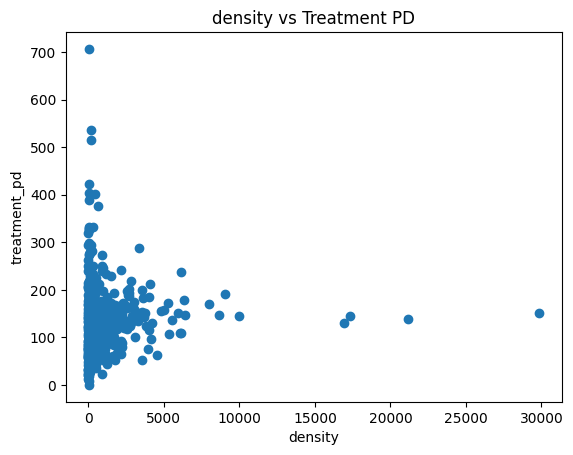

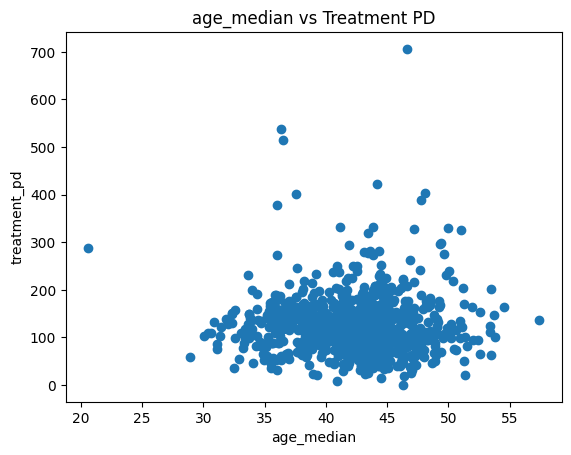

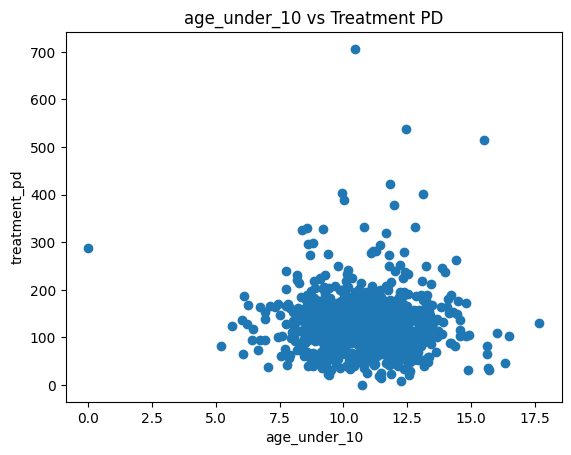

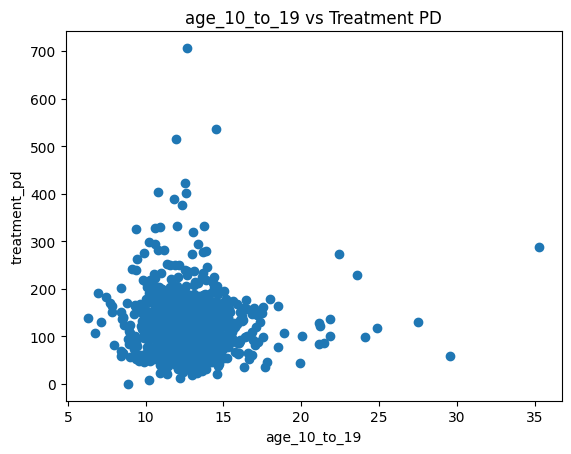

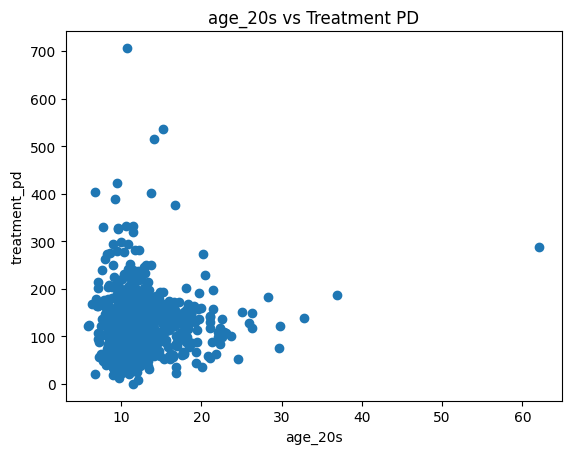

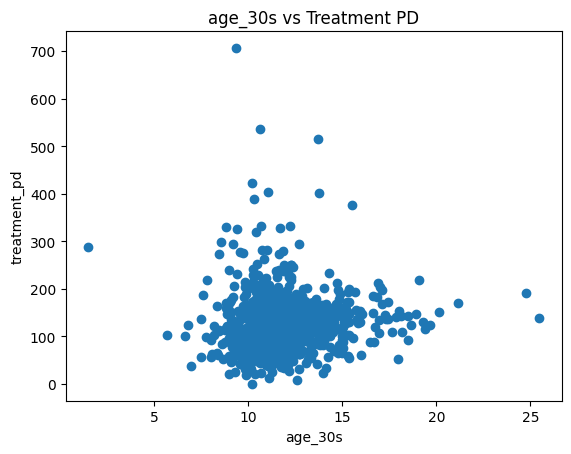

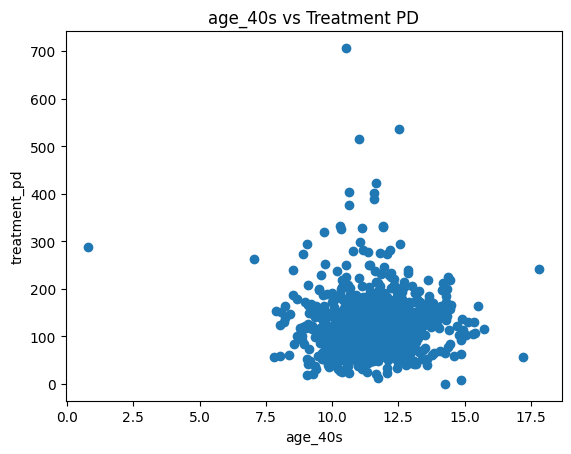

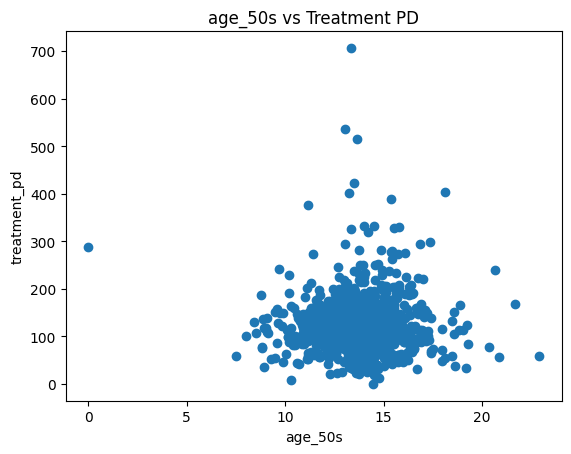

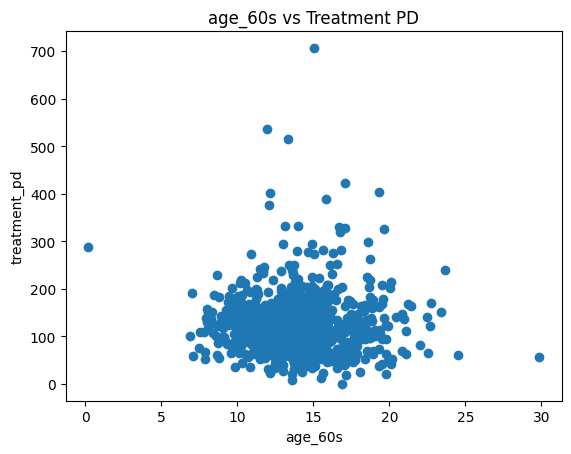

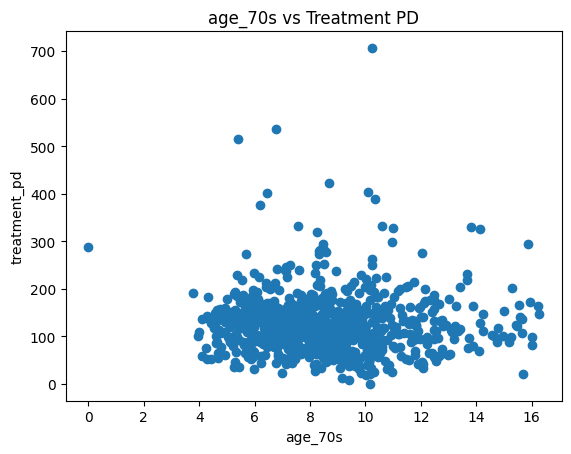

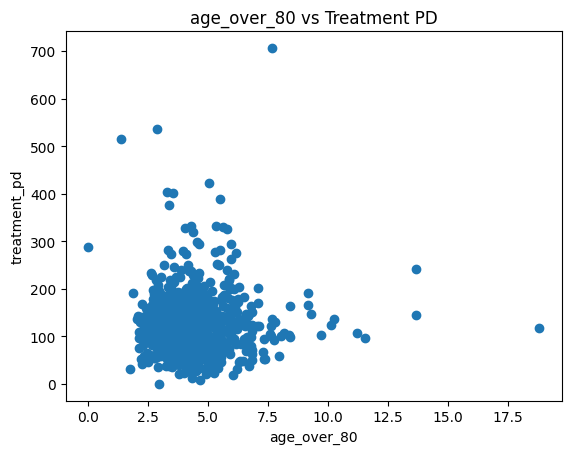

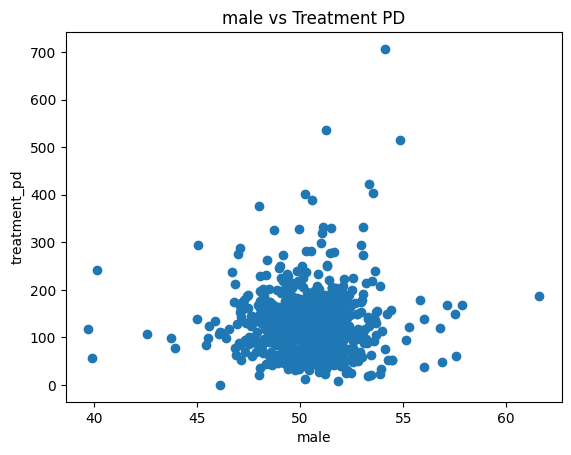

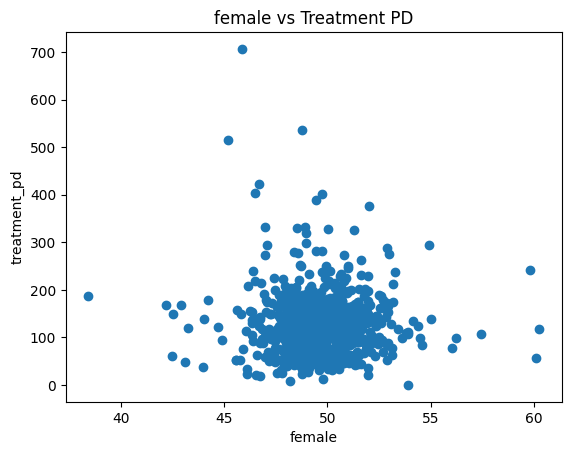

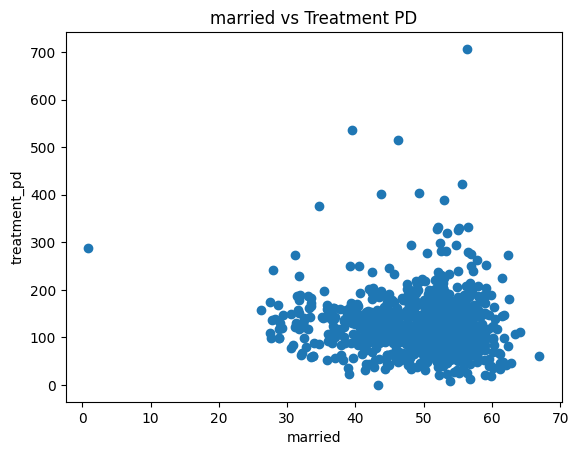

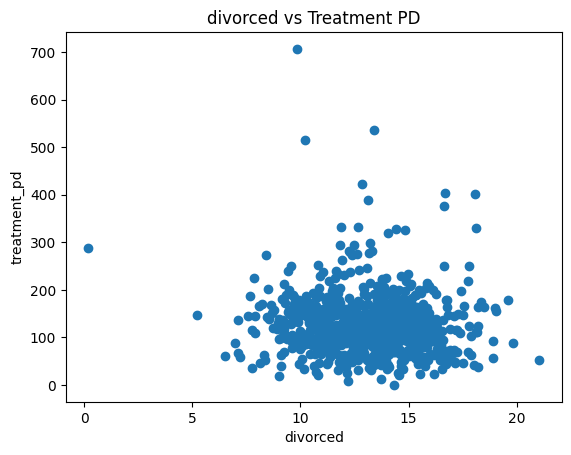

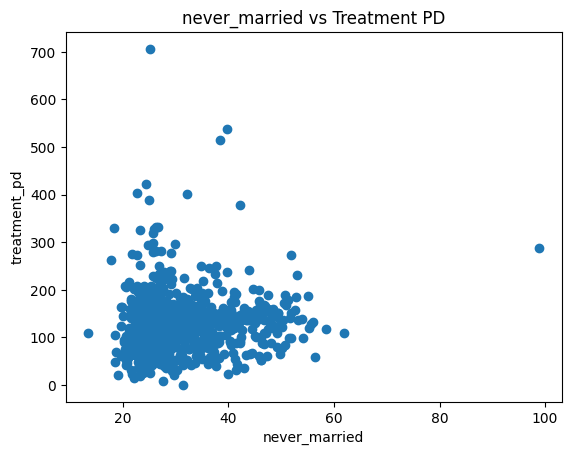

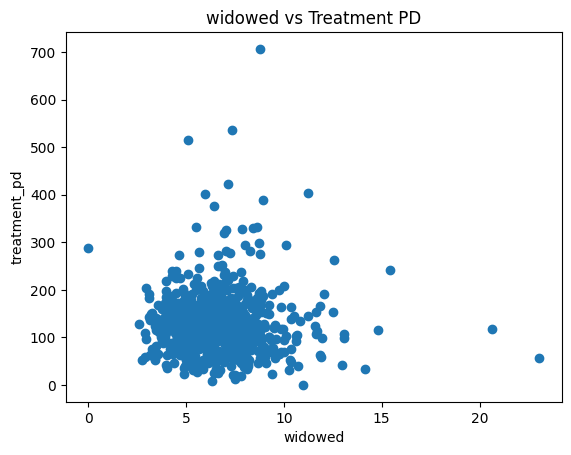

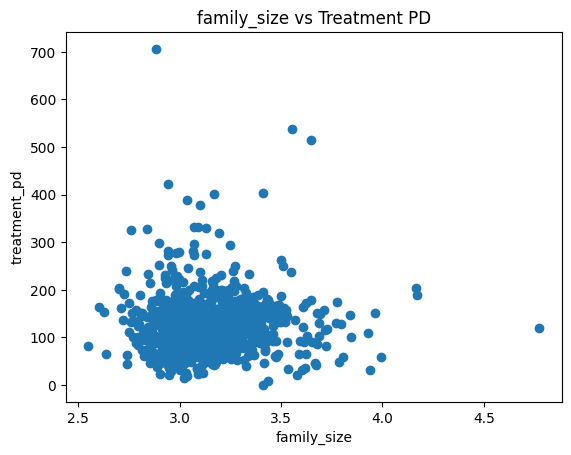

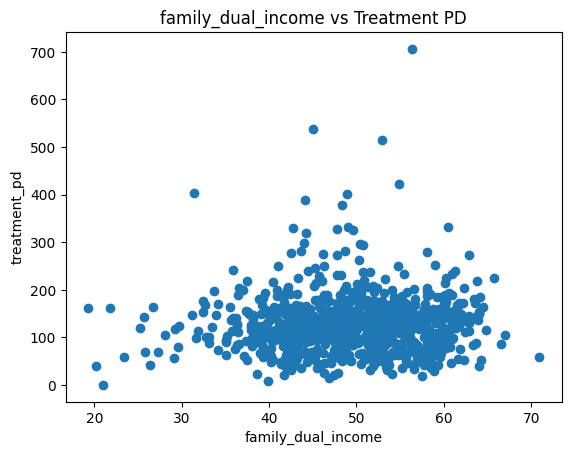

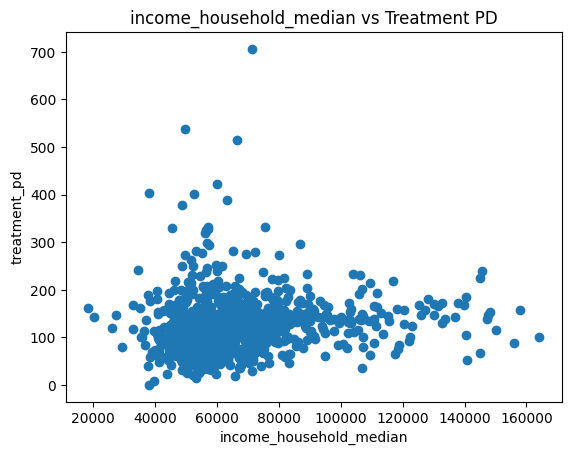

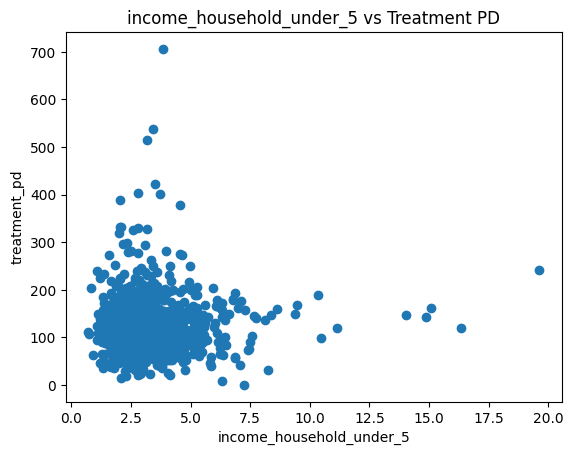

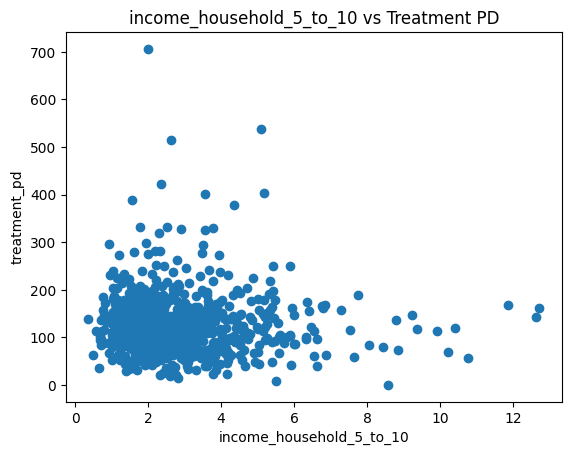

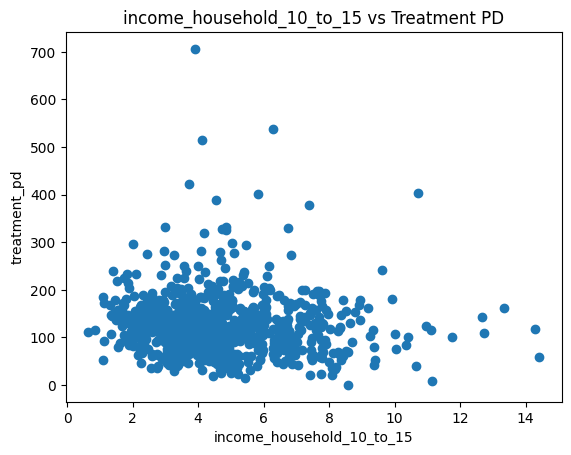

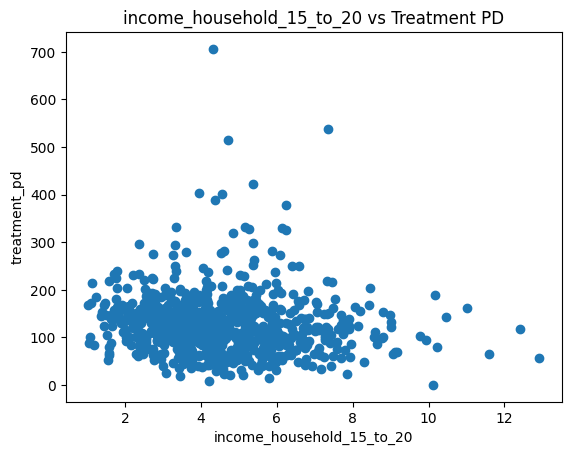

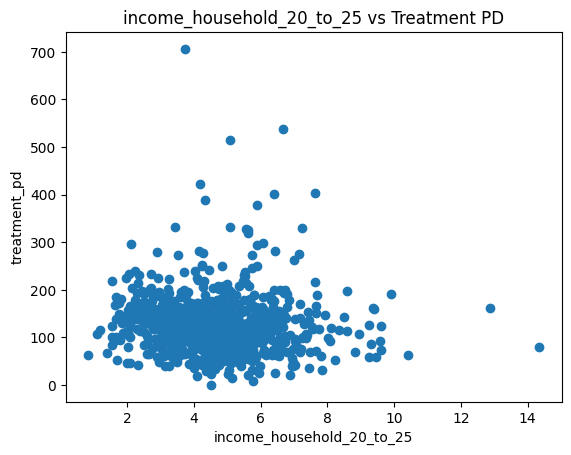

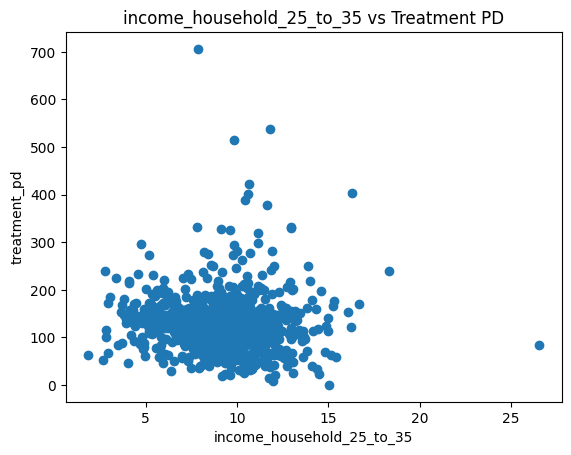

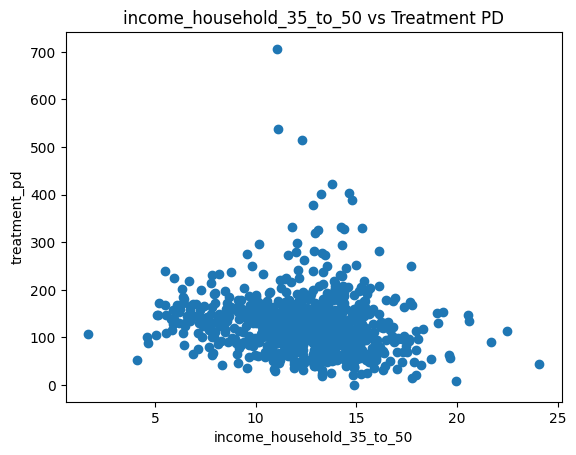

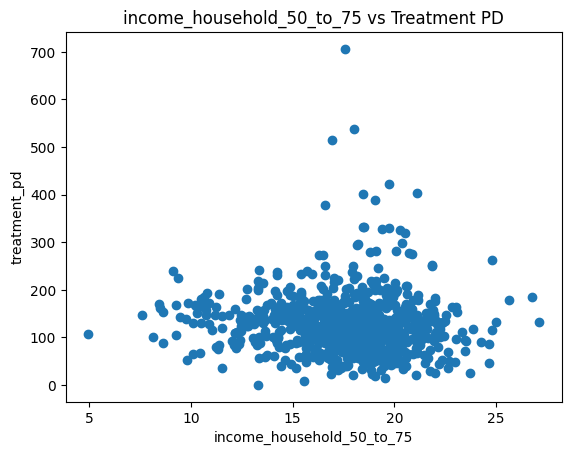

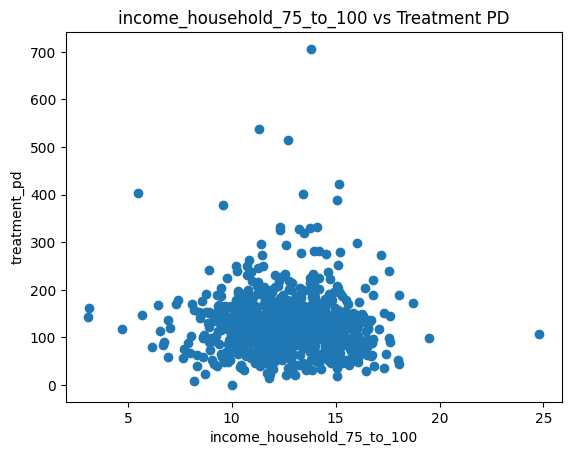

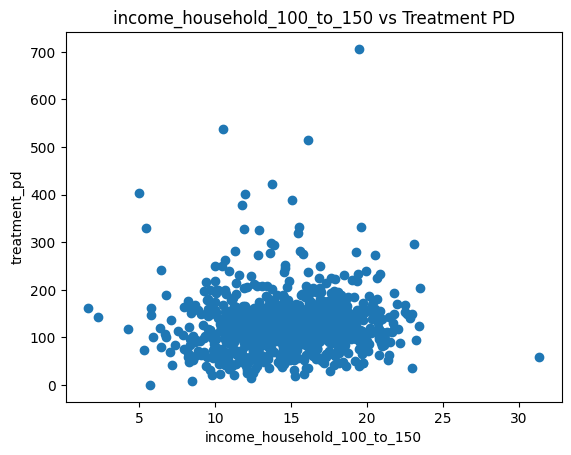

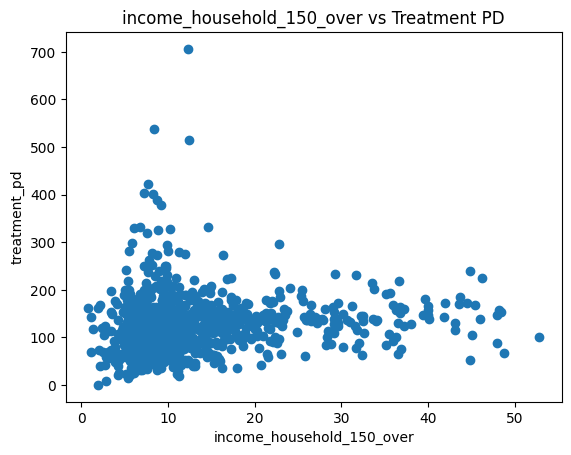

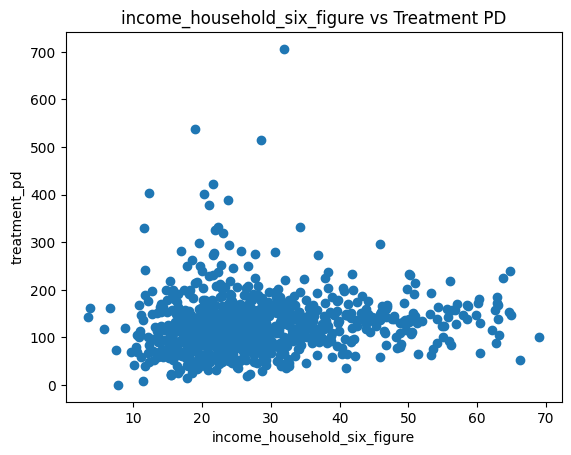

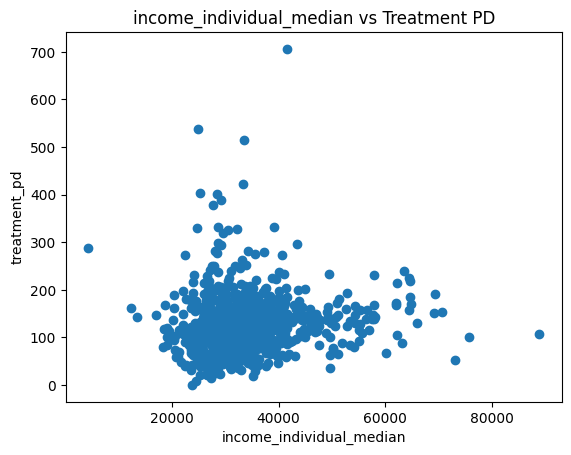

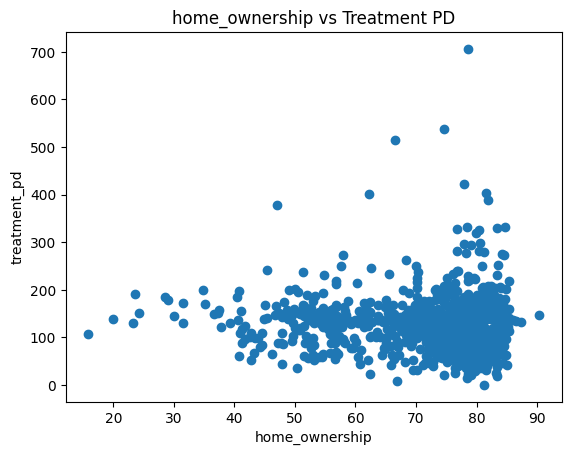

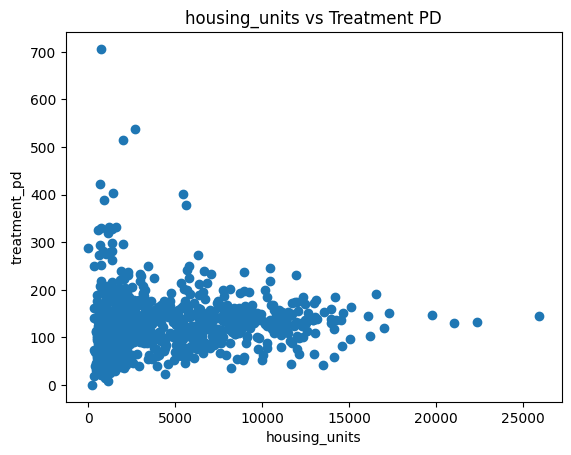

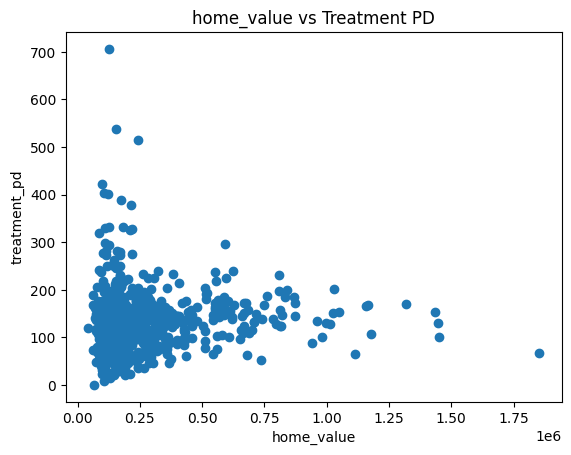

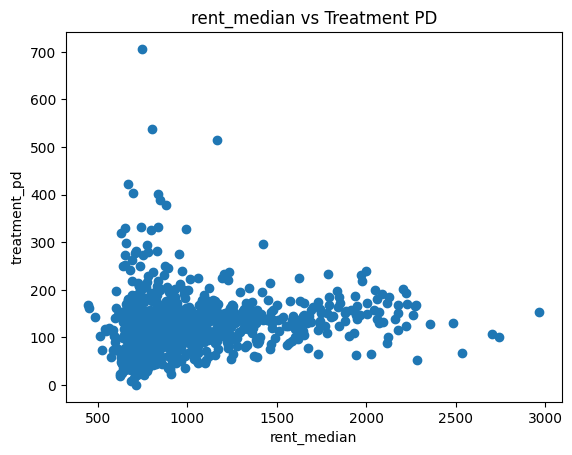

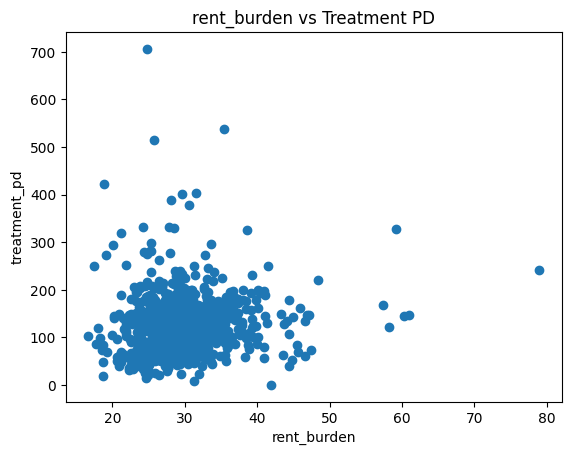

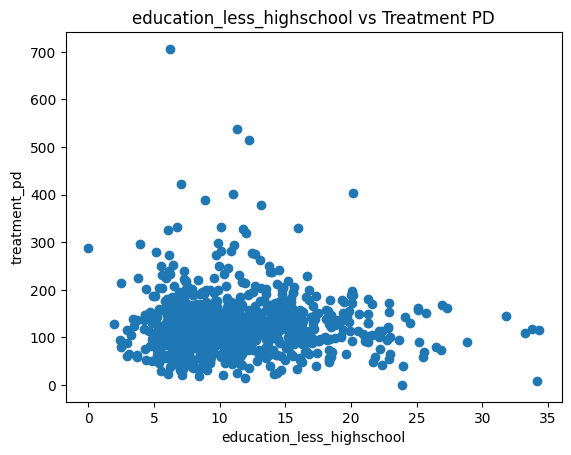

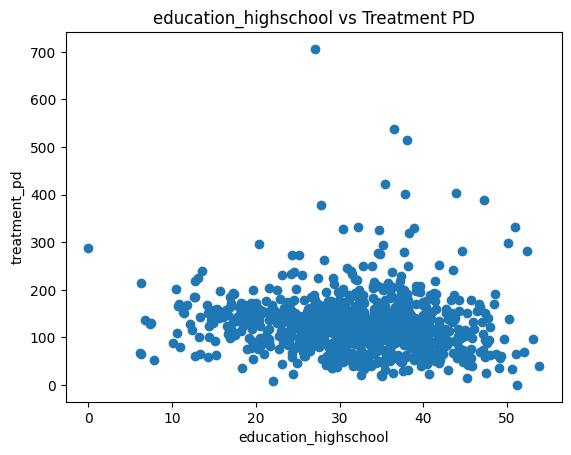

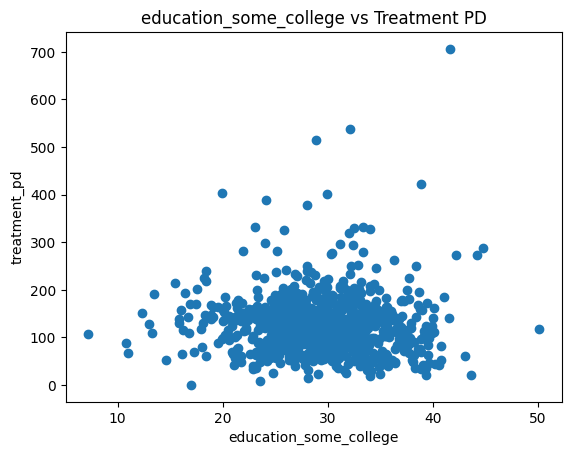

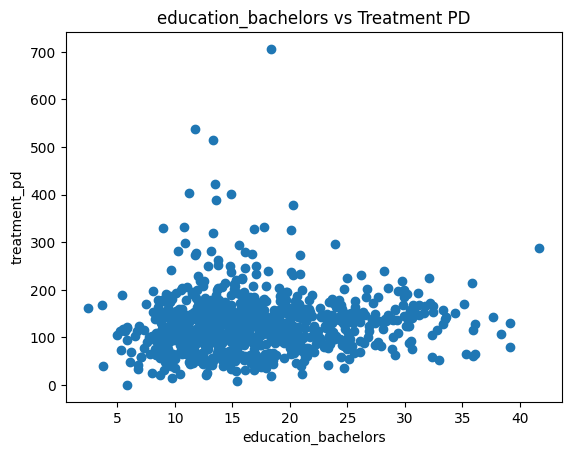

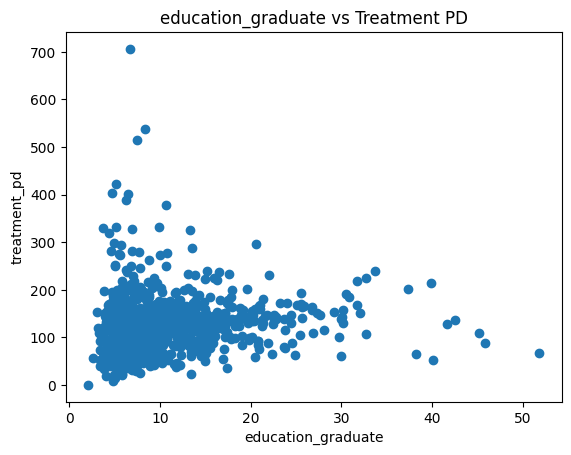

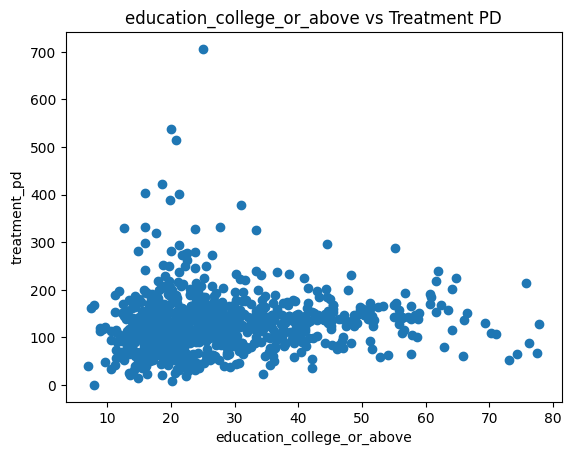

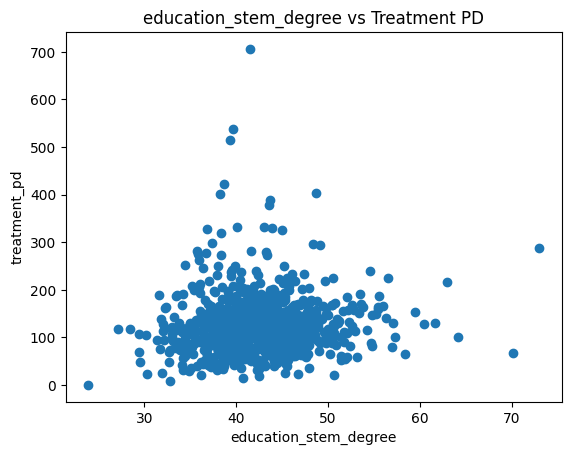

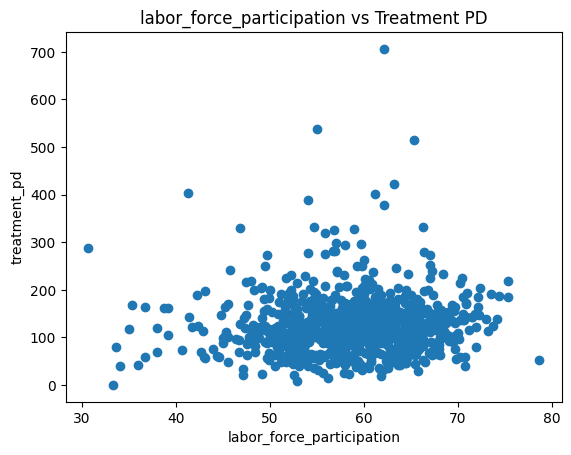

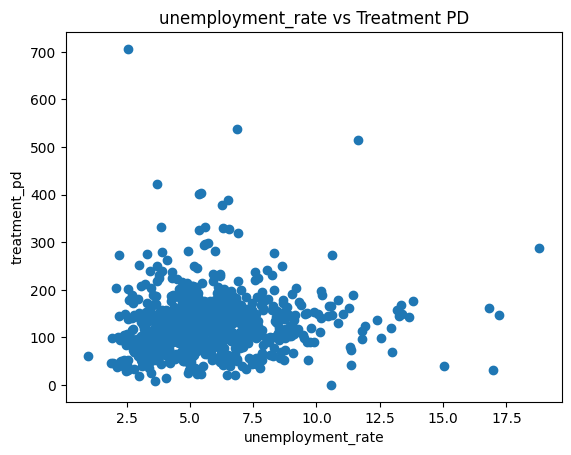

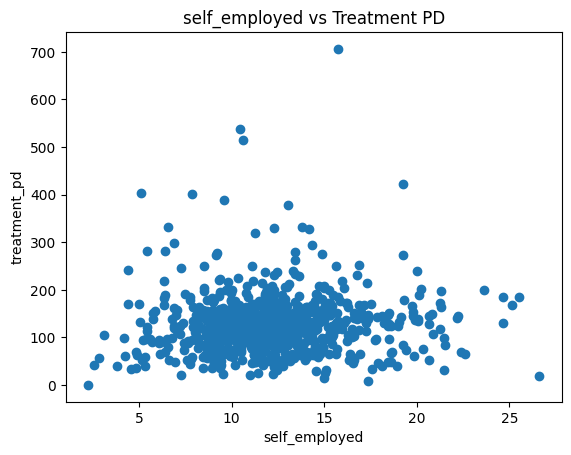

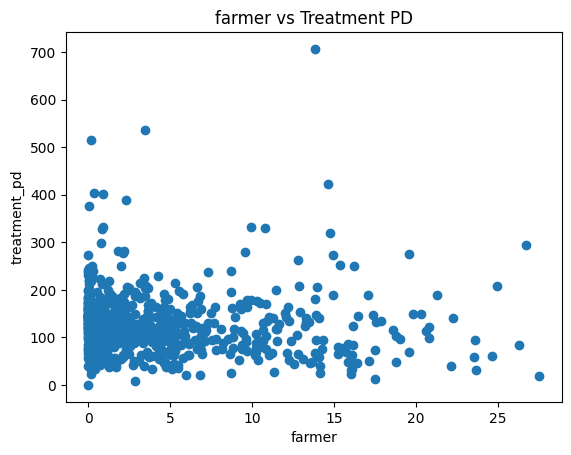

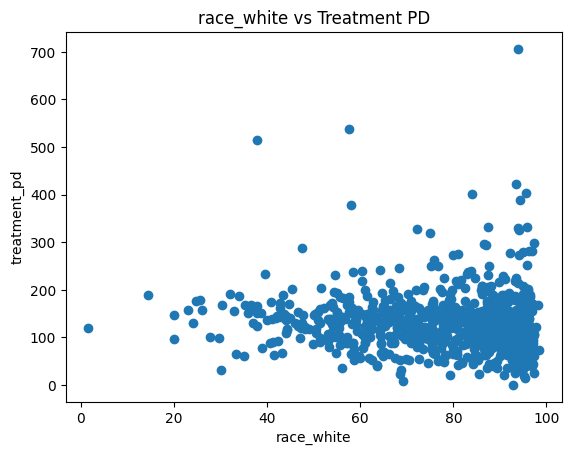

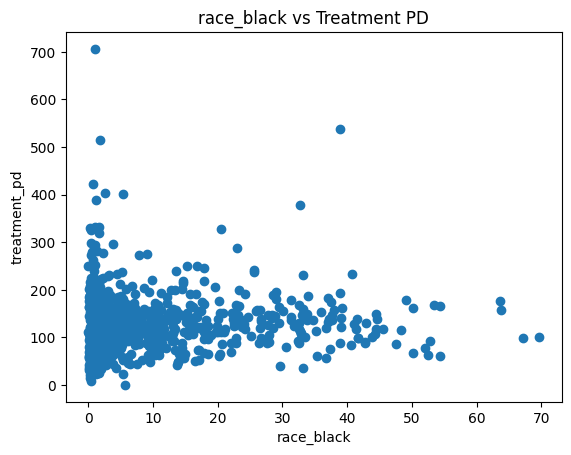

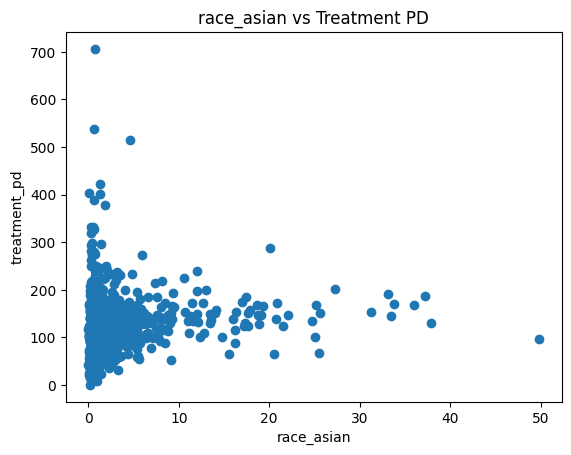

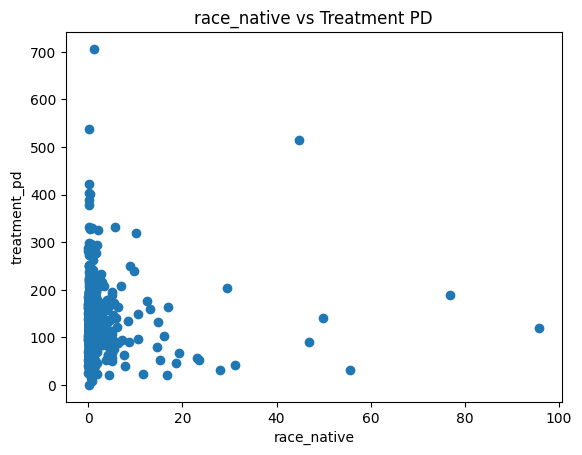

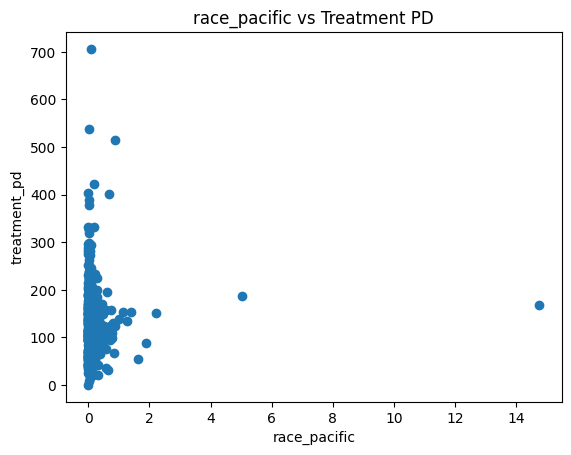

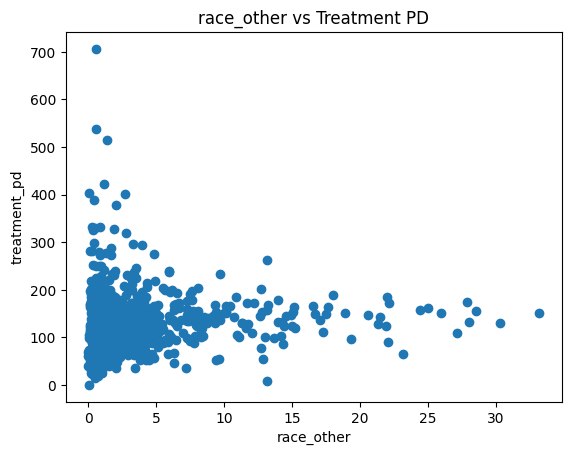

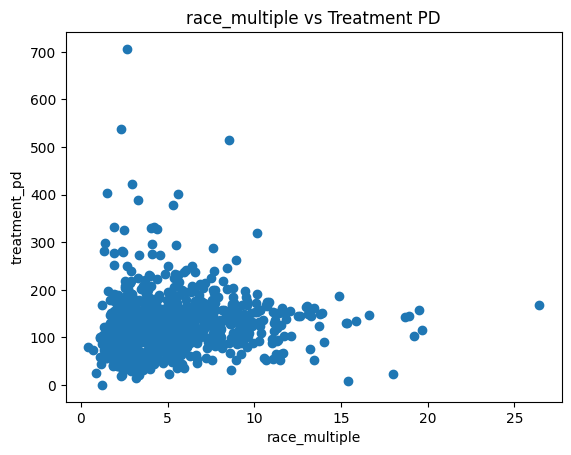

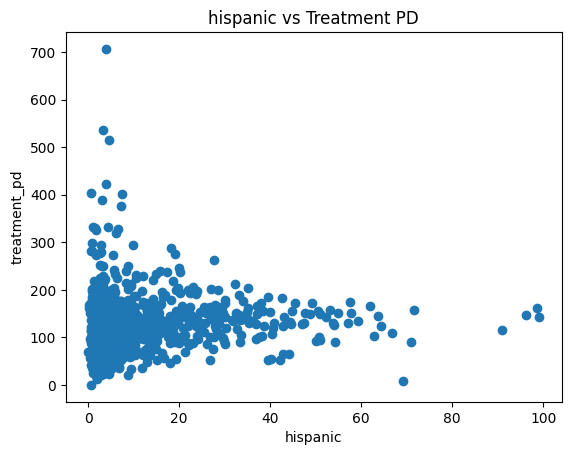

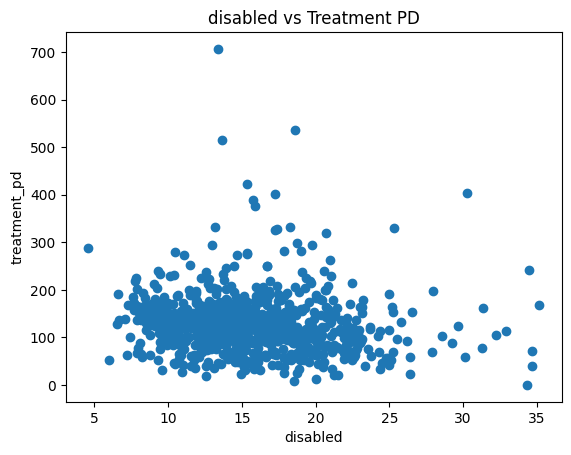

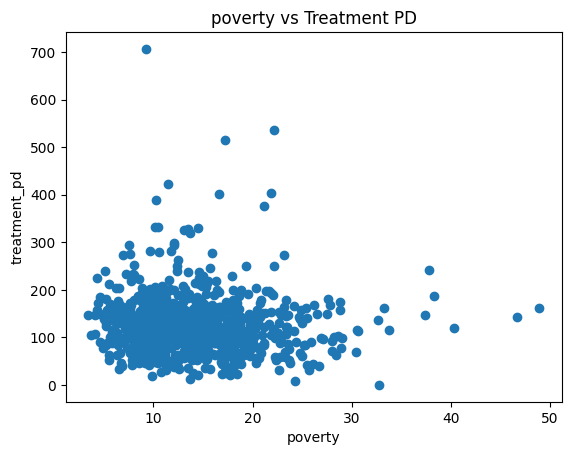

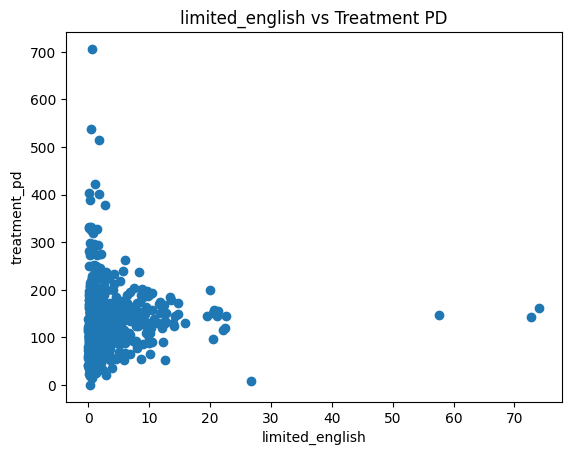

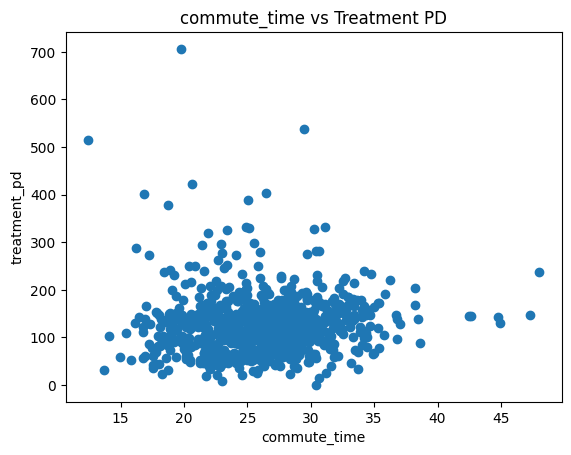

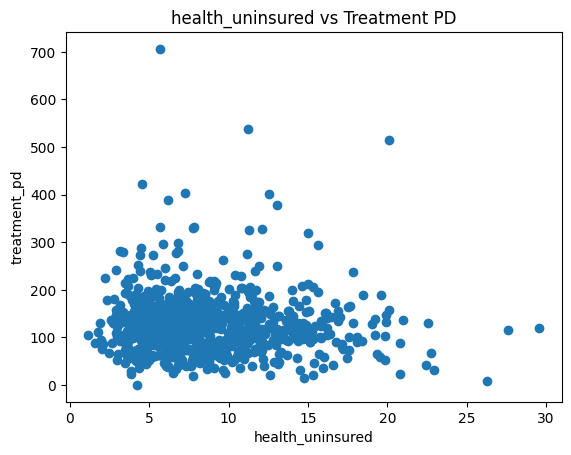

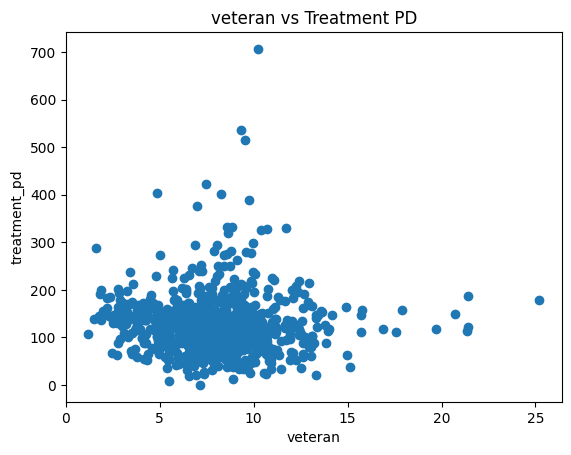

In [98]:
for variable in population_level_features_df_float.columns[:-2]:
    scatter_plot_variable_vs_target(population_level_features_df_float_mean, variable, 'treatment_pd', variable + ' vs Treatment PD')

## Heatmap for correlation visualization between continous population features and treatment_pd

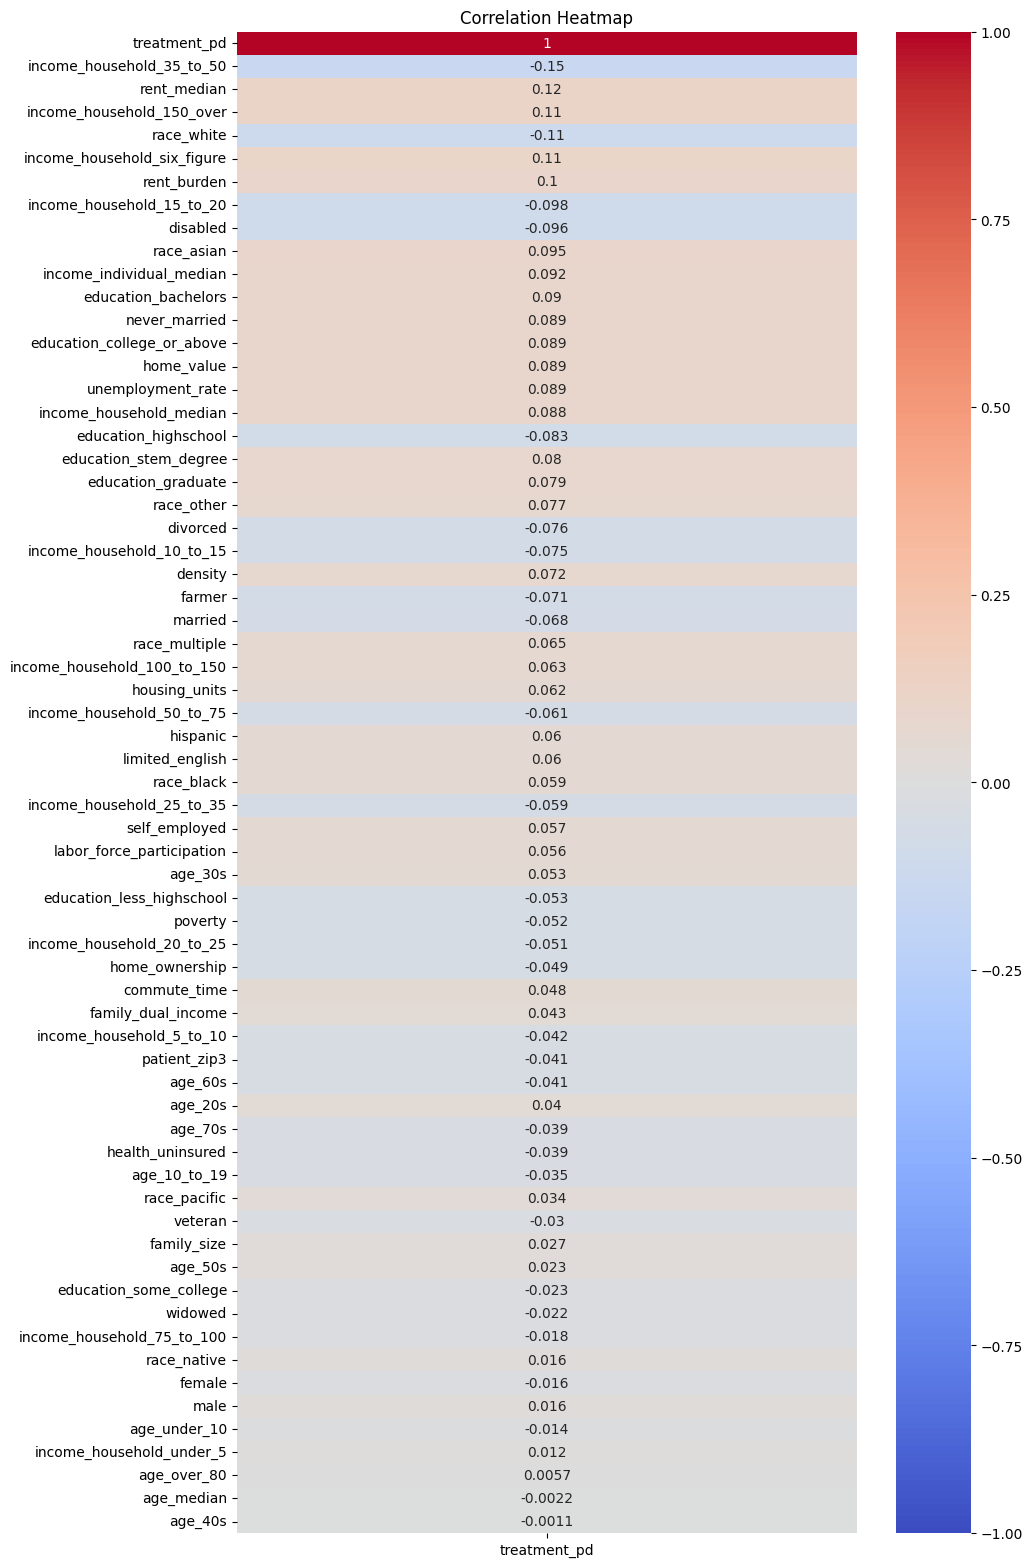

In [99]:
# Create a heatmap
correlations = population_level_features_df_float_mean.corr()['treatment_pd']
sorted_correlations = correlations.abs().sort_values(ascending=False)
sorted_correlations = correlations.loc[sorted_correlations.index]
plt.figure(figsize=(10, len(sorted_correlations) * 0.3))
sns.heatmap(sorted_correlations.to_frame(), annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

## Do ANOVA test for categorical population features

In [100]:
population_level_features_df_object

region            division  patient_zip3  treatment_pd
0           West             Pacific           917            35
1        Midwest  East North Central           451            33
2          South  West South Central           773            24
3           West             Pacific           928           455
4      Northeast     Middle Atlantic           112           162
...          ...                 ...           ...           ...
27669    Midwest  West North Central           653            25
27670    Midwest  East North Central           462            22
27671      South  West South Central           769            28
27672       West            Mountain           853           169
27673       West             Pacific           923            91

[27674 rows x 4 columns]

In [101]:

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming 'df' is your DataFrame, 'categorical_var' is your categorical variable,
# and 'continuous_var' is your continuous variable.
model = ols('treatment_pd ~ C(region)', data=population_level_features_df_object).fit()
anova_table = sm.stats.anova_lm(model, typ=2)  # Type 2 ANOVA DataFrame

print(anova_table)


                 sum_sq       df         F    PR(>F)
C(region)  8.279059e+05      3.0  7.826282  0.000032
Residual   9.678301e+08  27447.0       NaN       NaN


In [102]:

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming 'df' is your DataFrame, 'categorical_var' is your categorical variable,
# and 'continuous_var' is your continuous variable.
model = ols('treatment_pd ~ C(division)', data=population_level_features_df_object).fit()
anova_table = sm.stats.anova_lm(model, typ=2)  # Type 2 ANOVA DataFrame

print(anova_table)


                   sum_sq       df         F        PR(>F)
C(division)  1.796693e+06      8.0  6.374345  2.679338e-08
Residual     9.668613e+08  27442.0       NaN           NaN


In [9]:
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm
import pandas as pd
from statsmodels.stats.anova import anova_lm
from scipy.stats import chi2

# Assuming 'data' is your DataFrame and it includes columns 'treatment_pd', 'side', 'zip_code', and other relevant features
# Fit the linear mixed-effects model
train_df = pd.read_csv('../Data/train_test_tt.csv')
train_df = train_df[train_df["allocated_set"] == "train"]
model = mixedlm("treatment_pd ~ side", train_df, groups=train_df["patient_zip3"], re_formula="~1")


# Convert categorical variables to category dtype
train_df['side'] = train_df['side'].astype('category')
train_df['patient_zip3'] = train_df['patient_zip3'].astype('category')

# Fit the full model (with all predictors)
full_model = mixedlm("treatment_pd ~ side", train_df, groups=train_df["patient_zip3"], re_formula="~1")
full_result = full_model.fit()

# Fit the reduced model (without 'side')
reduced_model = mixedlm("treatment_pd ~ 1", train_df, groups=train_df["patient_zip3"], re_formula="~1")
reduced_result = reduced_model.fit()

# Perform likelihood ratio test
lr_stat = 2 * (full_result.llf - reduced_result.llf)
p_value = chi2.sf(lr_stat, df=full_result.df_modelwc - reduced_result.df_modelwc)
result = model.fit()

print(f'Likelihood Ratio Test Statistic: {lr_stat}')
print(f'p-value: {p_value}')

# Print the summary of the full model
print(full_result.summary())


/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsm

Likelihood Ratio Test Statistic: 5626.239896222134
p-value: 0.0
              Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   treatment_pd
No. Observations:    27674     Method:               REML        
No. Groups:          849       Scale:                28525.3339  
Min. group size:     1         Log-Likelihood:       -181325.1803
Max. group size:     385       Converged:            No          
Mean group size:     32.6                                        
-----------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
-----------------------------------------------------------------
Intercept            87.867    1.884 46.638 0.000  84.174  91.560
side[T.R]            -0.560    2.345 -0.239 0.811  -5.157   4.036
side[T.unspecified] 187.775    2.647 70.945 0.000 182.587 192.963
Group Var           331.016    1.273                             



In [48]:
imputed_path = "/Users/wenyuanchen/Desktop/Stanford/BIOMEDIN 212/Project/WIDS_DMMTS/Data/train_test_added_climate_data_imputed.csv"
path = "/Users/wenyuanchen/Desktop/Stanford/BIOMEDIN 212/Project/WIDS_DMMTS/Data/train_test_added_climate_data.csv"
data = pd.read_csv(path)
train_df = data[data['allocated_set'] == 'train'].drop(columns = ['allocated_set', 'patient_id'])

imputed_data = pd.read_csv(imputed_path)
imputed_data["patient_zip3"] = train_df["patient_zip3"]
train_imputed = imputed_data[imputed_data['allocated_set'] == 'train']
test_imputed = imputed_data[imputed_data['allocated_set'] == 'test']
outcome = 'treatment_pd'


In [27]:
train_imputed

patient_race          payer_type patient_state  patient_age  \
0            Asian          COMMERCIAL            CA           46   
1            White  MEDICARE ADVANTAGE            OH           63   
2         Hispanic          COMMERCIAL            TX           53   
3         Hispanic            MEDICAID            CA           50   
4            Other          COMMERCIAL            NY           39   
...            ...                 ...           ...          ...   
27669        Other          COMMERCIAL            MO           52   
27670        Other          COMMERCIAL            IN           39   
27671     Hispanic            MEDICAID            TX           41   
27672     Hispanic          COMMERCIAL            AZ           53   
27673        Black            MEDICAID            CA           53   

       patient_gender  patient_bmi patient_region    patient_division  \
0               False        27.00           West             Pacific   
1               False        27.82        Midwest  East North Central   
2               False        27.12          South  West South Central   
3               False        26.42           West             Pacific   
4               False        18.00      Northeast     Middle Atlantic   
...               ...          ...            ...                 ...   
27669           False        27.37        Midwest  West North Central   
27670           False        28.12        Midwest  East North Central   
27671           False        26.43          South  West South Central   
27672           False        28.88           West            Mountain   
27673           False        28.84           West             Pacific   

      patient_tumor_side patient_tumor_quadrant  ... population_poverty_perc  \
0                      R                overlap  ...               10.515217   
1                      L                     UO  ...               13.546809   
2                      L                     UI  ...               11.943396   
3            unspecified            unspecified  ...               10.109091   
4            unspecified            unspecified  ...               18.642105   
...                  ...                    ...  ...                     ...   
27669                  R            unspecified  ...               13.967742   
27670                  L                overlap  ...               14.489189   
27671                  L                overlap  ...               12.080952   
27672        unspecified            unspecified  ...               16.342647   
27673        unspecified                     UO  ...               17.627869   

      population_limited_english_perc population_commute_time  \
0                           12.745652               32.530435   
1                            0.146809               31.890909   
2                            2.549057               32.556250   
3                            8.057576               30.606061   
4                           14.173684               42.502632   
...                               ...                     ...   
27669                        1.316129               25.770968   
27670                        2.813514               23.686111   
27671                        4.050000               21.588889   
27672                        4.460294               26.421875   
27673                        3.408333               30.925000   

       population_health_uninsured_perc  population_veteran_perc  \
0                              7.263043                 3.810870   
1                              7.631915                 9.631915   
2                             16.396226                10.392453   
3                              7.018182                 4.103030   
4                              6.392105                 1.755263   
...                                 ...                      ...   
27669                          9.787097                 9.780645   
27670         

In [30]:
missingValues = train_imputed.isnull().sum()
pd.set_option('display.max_rows', 500)
display(missingValues)

patient_race                                  0
payer_type                                    0
patient_state                                 0
patient_age                                   0
patient_gender                                0
patient_bmi                                   0
patient_region                                0
patient_division                              0
patient_tumor_side                            0
patient_tumor_quadrant                        0
patient_metastatic_organ                      0
patient_metastatic_first_treatment            0
patient_metastatic_first_treatment_type       0
population_size                               0
population_density                            0
population_age_median                         0
population_female_perc                        0
population_married_perc                       0
population_divorced_perc                      0
population_never_married_perc                 0
population_widowed_perc                 

In [49]:
# List all feature columns except the outcome and the random effect
features = train_imputed.columns.difference([outcome, 'patient_zip3'])

# Create the formula for the mixed effects model
formula = f"{outcome} ~ " + " + ".join(features)
# Fit the Linear Mixed-Effects Model
model = mixedlm(formula, train_imputed, groups=train_imputed["patient_zip3"], re_formula="~1")
result = model.fit()

# Print the summary of the model
print(result.summary())

LinAlgError: Singular matrix

In [51]:
for i in features:
    print(i)

allocated_set
climate_n02
climate_ozone
climate_pm25
patient_age
patient_bmi
patient_division
patient_gender
patient_metastatic_first_treatment
patient_metastatic_first_treatment_type
patient_metastatic_organ
patient_race
patient_region
patient_state
patient_tumor_quadrant
patient_tumor_side
payer_type
population_age_median
population_commute_time
population_density
population_disabled_perc
population_divorced_perc
population_education_bachelors_perc
population_education_college_or_above_perc
population_education_graduate_perc
population_education_highschool_perc
population_education_less_highschool_perc
population_education_some_college_perc
population_education_stem_degree_perc
population_family_dual_income_perc
population_family_size
population_farmer_perc
population_female_perc
population_health_uninsured_perc
population_hispanic_perc
population_home_ownership_perc
population_home_value
population_income_household_median
population_income_individual_median
population_limited_englis

In [57]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define paths
imputed_path = "/Users/wenyuanchen/Desktop/Stanford/BIOMEDIN 212/Project/WIDS_DMMTS/Data/train_test_added_climate_data_imputed.csv"
path = "/Users/wenyuanchen/Desktop/Stanford/BIOMEDIN 212/Project/WIDS_DMMTS/Data/train_test_added_climate_data.csv"

# Load the original and imputed datasets
data = pd.read_csv(path)
imputed_data = pd.read_csv(imputed_path)

# Prepare the training set
train_df = data[data['allocated_set'] == 'train'].drop(columns=['allocated_set', 'patient_id'])
imputed_data["patient_zip3"] = train_df["patient_zip3"]
train_imputed = imputed_data[imputed_data['allocated_set'] == 'train']
test_imputed = imputed_data[imputed_data['allocated_set'] == 'test']
train_imputed.drop(columns=['population_widowed_perc', 'population_education_less_highschool_perc', 'population_race_other_perc'], inplace=True)

numerical_features = train_imputed.select_dtypes(include=['number']).columns.tolist() 
numerical_features = [feature for feature in numerical_features if feature not in ['patient_id', 'patient_zip3', 'treatment_pd']]

categorical_features = train_imputed.select_dtypes(include=['object']).columns.tolist() + ['patient_zip3']

# Define the outcome variable
outcome = 'treatment_pd'

# Drop the 'allocated_set' column as it's no longer needed
train_imputed = train_imputed.drop(columns=['allocated_set'])

# Ensure no missing values in the training set
missing_values = train_imputed.isnull().sum()
print("Missing values in each column:\n", missing_values)

# # Encode categorical variables using dummy encoding
# train_imputed = pd.get_dummies(train_imputed, drop_first=True)

# # Ensure all columns are numeric
# train_imputed = train_imputed.apply(pd.to_numeric, errors='coerce')

# Check for multicollinearity using VIF
X = train_imputed[numerical_features]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("Variance Inflation Factors (VIF):")
print(vif_data)

# # Remove features with high VIF (e.g., VIF > 10)
# high_vif_features = vif_data[vif_data["VIF"] > 10]["feature"].tolist()
# train_imputed = train_imputed.drop(columns=high_vif_features)

# # List all feature columns except the outcome and the random effect
# features = train_imputed.columns.difference([outcome, 'patient_zip3'])

# # Create the formula for the mixed effects model
# formula = f"{outcome} ~ " + " + ".join(features)

# # Fit the Linear Mixed-Effects Model
# model = mixedlm(formula, train_imputed, groups=train_imputed["patient_zip3"], re_formula="~1")
# result = model.fit()

# # Print the summary of the model
# print(result.summary())


/var/folders/r3/mc640yrn2_70d_7zvw5cc3q00000gn/T/ipykernel_1134/811561975.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_imputed.drop(columns=['population_widowed_perc', 'population_education_less_highschool_perc', 'population_race_other_perc'], inplace=True)


Missing values in each column:
 patient_race                                  0
payer_type                                    0
patient_state                                 0
patient_age                                   0
patient_gender                                0
patient_bmi                                   0
patient_region                                0
patient_division                              0
patient_tumor_side                            0
patient_tumor_quadrant                        0
patient_metastatic_organ                      0
patient_metastatic_first_treatment            0
patient_metastatic_first_treatment_type       0
population_size                               0
population_density                            0
population_age_median                         0
population_female_perc                        0
population_married_perc                       0
population_divorced_perc                      0
population_never_married_perc                 0
populati

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Variance Inflation Factors (VIF):
                                       feature          VIF
0                                  patient_age    24.893654
1                                  patient_bmi    28.486987
2                              population_size    19.163374
3                           population_density     5.610064
4                        population_age_median   600.309672
5                       population_female_perc  1740.504713
6                      population_married_perc  1411.697771
7                     population_divorced_perc   171.763530
8                population_never_married_perc   700.305772
9                       population_family_size   920.907820
10          population_family_dual_income_perc   466.422579
11         population_income_individual_median   311.872218
12          population_income_household_median   463.521726
13              population_home_ownership_perc   310.788624
14                       population_home_value    39.034213
15    

In [65]:
# Remove features with high VIF (e.g., VIF > 10)
high_vif_features = vif_data[vif_data["VIF"] > 10]["feature"].tolist()
train_imputed_copy = train_imputed.drop(columns=high_vif_features)
train_imputed_copy.drop(columns=['patient_gender'], inplace=True)

# List all feature columns except the outcome and the random effect
features = train_imputed_copy.columns.difference([outcome, 'patient_zip3'])

# Create the formula for the mixed effects model
formula = f"{outcome} ~ " + " + ".join(features)

# Fit the Linear Mixed-Effects Model
model = mixedlm(formula, train_imputed_copy, groups=train_imputed_copy["patient_zip3"], re_formula="~1")
result = model.fit()

# Print the summary of the model
print(result.summary())

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsm

                                               Mixed Linear Model Regression Results
Model:                                      MixedLM                         Dependent Variable:                         treatment_pd
No. Observations:                           27674                           Method:                                     REML        
No. Groups:                                 849                             Scale:                                      23755.5092  
Min. group size:                            1                               Log-Likelihood:                             -178112.6909
Max. group size:                            385                             Converged:                                  No          
Mean group size:                            32.6                                                                                    
---------------------------------------------------------------------------------------------------------------------

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2706: RuntimeWarning: invalid value encountered in sqrt
  sdf[0:self.k_fe, 1] = np.sqrt(np.diag(self.cov_params()[0:self.k_fe]))


In [64]:
# Remove features with high VIF (e.g., VIF > 10)
high_vif_features = vif_data[vif_data["VIF"] > 100]["feature"].tolist()
train_imputed_copy = train_imputed.drop(columns=high_vif_features)
train_imputed_copy.drop(columns=['patient_gender'], inplace=True)

# List all feature columns except the outcome and the random effect
features = train_imputed_copy.columns.difference([outcome, 'patient_zip3'])

# Create the formula for the mixed effects model
formula = f"{outcome} ~ " + " + ".join(features)

# Fit the Linear Mixed-Effects Model
model = mixedlm(formula, train_imputed_copy, groups=train_imputed_copy["patient_zip3"], re_formula="~1")
result = model.fit()

# Print the summary of the model
print(result.summary())

Index(['patient_division', 'patient_gender',
       'patient_metastatic_first_treatment',
       'patient_metastatic_first_treatment_type', 'patient_metastatic_organ',
       'patient_race', 'patient_region', 'patient_state',
       'patient_tumor_quadrant', 'patient_tumor_side', 'payer_type',
       'population_density', 'population_farmer_perc',
       'population_limited_english_perc',
       'population_race_native_american_perc',
       'population_race_pacific_islander_perc'],
      dtype='object')